<a href="https://colab.research.google.com/github/WideSu/Python-for-DS/blob/main/Time_Series_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import glob
import pandas as pd
file_paths = glob.glob("/content/drive/MyDrive/data2022/*.csv")
all_df_list = []
for each_path in file_paths:
    each_df = pd.read_csv(each_path).reset_index(drop=True)
    all_df_list.append(each_df)
all_df = pd.concat(all_df_list).reset_index(drop=True)

In [21]:
all_df = all_df.loc[:, ~all_df.columns.str.contains('^Unnamed')]
all_df

date  participant_id  living_room_transition_num  \
0      2022-01-20            9059                           0   
1      2022-01-21            9059                           0   
2      2022-01-22            9059                           0   
3      2022-01-23            9059                           0   
4      2022-01-24            9059                           0   
...           ...             ...                         ...   
13355  2022-10-27            9006                           0   
13356  2022-10-28            9006                           0   
13357  2022-10-29            9006                           0   
13358  2022-10-30            9006                           0   
13359  2022-12-02            9006                           0   

       kitchen_transition_num  bedroom_transition_num  daily_outing_times  \
0                           0                       1                 NaN   
1                           0                       0                 2.0   
2                           0                       0                 1.0   
3                           0                       0                 3.0   
4                           0                       0                 6.0   
...                       ...                     ...                 ...   
13355                      27                      37                 NaN   
13356                      29                      41                 NaN   
13357                      34                      50                 NaN   
13358                       0                       0                 NaN   
13359                       0                       0                 NaN   

      total_outing_duration  avg_bpr  max_step  forget_wallet_times  ...  \
0                       NaN      NaN       NaN                  NaN  ...   
1                     235.0      NaN       NaN                  NaN  ...   
2                      10.0      NaN       NaN                  NaN  ...   
3                      75.0      NaN       NaN                  NaN  ...   
4                      45.0      NaN       NaN                  NaN  ...   
...                     ...      ...       ...                  ...  ...   
13355                   NaN      NaN       NaN                  NaN  ...   
13356                   NaN      NaN       NaN                  NaN  ...   
13357                   NaN      NaN       NaN                  NaN  ...   
13358                   NaN      NaN       NaN                  NaN  ...   
13359                   NaN      NaN       NaN                  NaN  ...   

       nighttime_sleep_time  nighttime_wa_time nighttime_sleep_duration  \
0          2022-01-20 20:15   2022-01-21 06:55                    355.0   
1          2022-01-21 20:05   2022-01-22 06:30                    295.0   
2          2022-01-22 20:25   2022-01-23 07:05                    225.0   
3          2022-01-23 21:25   2022-01-24 06:20                    365.0   
4          2022-01-24 20:00   2022-01-25 05:15                    360.0   
...                     ...                ...                      ...   
13355                   NaN                NaN                      NaN   
13356                   NaN                NaN                      NaN   
13357                   NaN                NaN                      NaN   
13358                   NaN                NaN                      NaN   
13359                   NaN                NaN                      NaN   

      nighttime_sleep_interruption_times  \
0                                   19.0   
1                                   24.0   
2                                   22.0   
3                                   12.0   
4                                   21.0   
...                                  ...   
13355                                NaN   
13356                                NaN   
13357                                NaN   
13358                                NaN   
13359    

In [22]:
all_df.columns

Index(['date', 'participant_id', 'living_room_transition_num',
       'kitchen_transition_num', 'bedroom_transition_num',
       'daily_outing_times', 'total_outing_duration', 'avg_bpr', 'max_step',
       'forget_wallet_times', 'forget_key_times', 'forget_medication_times',
       'nighttime_sleep_time', 'nighttime_wa_time', 'nighttime_sleep_duration',
       'nighttime_sleep_interruption_times',
       'nighttime_sleep_interruption_duration', 'daytime_sleep_time',
       'daytime_wa_time', 'daytime_sleep_duration',
       'daytime_sleep_interruption_times',
       'daytime_sleep_interruption_duration'],
      dtype='object')

In [23]:
all_df['nighttime_sleep_time_str'] = all_df["nighttime_sleep_time"].copy()
all_df['nighttime_wa_time_str'] = all_df["nighttime_wa_time"].copy()
all_df['daytime_sleep_time_str'] = all_df["daytime_sleep_time"].copy()
all_df['daytime_wa_time_str'] = all_df["daytime_wa_time"].copy()

Nighttime sleep time

In [24]:
import datetime
relative_time_list = []
for each_index in all_df.index:
    each_row = all_df.iloc[each_index,:]
    each_ss_time = each_row.loc["nighttime_sleep_time"]
    each_date = datetime.datetime.strptime(each_row.loc["date"],"%Y-%m-%d")
    each_ss_time_obj = None
    try:
        each_ss_time_obj = datetime.datetime.strptime(each_ss_time,"%Y-%m-%d %H:%M")
        relative_time = (each_ss_time_obj - each_date)/datetime.timedelta(hours=1)
        # print(type(each_date),type(each_ss_time_obj))
        # print(each_ss_time,each_ss_time_obj.time(),relative_time)

    except:
        each_ss_time_obj = None
        relative_time = None
        # print(type(each_date),type(each_ss_time_obj))
        # print(each_ss_time,each_ss_time_obj)
    relative_time_list.append(relative_time)
all_df['nighttime_sleep_time'] = relative_time_list

Nighttime wake up time

In [26]:
import datetime
relative_time_list = []
for each_index in all_df.index:
    each_row = all_df.iloc[each_index,:]
    each_ss_time = each_row.loc["nighttime_wa_time"]
    each_date = datetime.datetime.strptime(each_row.loc["date"],"%Y-%m-%d")
    each_ss_time_obj = None
    try:
        each_ss_time_obj = datetime.datetime.strptime(each_ss_time,"%Y-%m-%d %H:%M")
        relative_time = (each_ss_time_obj - each_date)/datetime.timedelta(hours=1)
        # print(type(each_date),type(each_ss_time_obj))
        # print(each_ss_time,each_ss_time_obj.time(),relative_time)

    except:
        each_ss_time_obj = None
        relative_time = None
        # print(type(each_date),type(each_ss_time_obj))
        # print(each_ss_time,each_ss_time_obj)
    relative_time_list.append(relative_time)
all_df['nighttime_wa_time'] = relative_time_list

Daytime sleep time

In [27]:
import datetime
relative_time_list = []
for each_index in all_df.index:
    each_row = all_df.iloc[each_index,:]
    each_ss_time = each_row.loc["daytime_sleep_time"]
    each_date = datetime.datetime.strptime(each_row.loc["date"],"%Y-%m-%d")
    each_ss_time_obj = None
    try:
        each_ss_time_obj = datetime.datetime.strptime(each_ss_time,"%Y-%m-%d %H:%M")
        relative_time = (each_ss_time_obj - each_date)/datetime.timedelta(hours=1)
        # print(type(each_date),type(each_ss_time_obj))
        # print(each_ss_time,each_ss_time_obj.time(),relative_time)

    except:
        each_ss_time_obj = None
        relative_time = None
        # print(type(each_date),type(each_ss_time_obj))
        # print(each_ss_time,each_ss_time_obj)
    relative_time_list.append(relative_time)
all_df['daytime_sleep_time'] = relative_time_list

Daytime wake up time

In [28]:
import datetime
relative_time_list = []
for each_index in all_df.index:
    each_row = all_df.iloc[each_index,:]
    each_ss_time = each_row.loc["daytime_wa_time"]
    each_date = datetime.datetime.strptime(each_row.loc["date"],"%Y-%m-%d")
    each_ss_time_obj = None
    try:
        each_ss_time_obj = datetime.datetime.strptime(each_ss_time,"%Y-%m-%d %H:%M")
        relative_time = (each_ss_time_obj - each_date)/datetime.timedelta(hours=1)
        # print(type(each_date),type(each_ss_time_obj))
        # print(each_ss_time,each_ss_time_obj.time(),relative_time)

    except:
        each_ss_time_obj = None
        relative_time = None
        # print(type(each_date),type(each_ss_time_obj))
        # print(each_ss_time,each_ss_time_obj)
    relative_time_list.append(relative_time)
all_df['daytime_wa_time'] = relative_time_list

In [29]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13360 entries, 0 to 13359
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   date                                   13360 non-null  object 
 1   participant_id                         13360 non-null  int64  
 2   living_room_transition_num             13360 non-null  int64  
 3   kitchen_transition_num                 13360 non-null  int64  
 4   bedroom_transition_num                 13360 non-null  int64  
 5   daily_outing_times                     7744 non-null   float64
 6   total_outing_duration                  7744 non-null   object 
 7   avg_bpr                                1704 non-null   float64
 8   max_step                               1704 non-null   float64
 9   forget_wallet_times                    6297 non-null   float64
 10  forget_key_times                       5072 non-null   float64
 11  fo

In [46]:
all_df['total_outing_duration'] = all_df['total_outing_duration'].astype('float')

ValueError: ignored

In [47]:
all_df
numeric_features = ['forget_medication_times','daily_outing_times','forget_key_times',\
                        'forget_wallet_times','avg_bpr','max_step','kitchen_transition_num',\
                        'bedroom_transition_num','living_room_transition_num',\
                        'daytime_sleep_time','daytime_wa_time','nighttime_sleep_time','nighttime_wa_time',\
                        'daytime_sleep_duration','daytime_sleep_interruption_duration','daytime_sleep_interruption_times',\
                        'nighttime_sleep_duration','nighttime_sleep_interruption_duration','nighttime_sleep_interruption_times']
all_df.loc[:,numeric_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13360 entries, 0 to 13359
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   forget_medication_times                11130 non-null  float64
 1   daily_outing_times                     7744 non-null   float64
 2   forget_key_times                       5072 non-null   float64
 3   forget_wallet_times                    6297 non-null   float64
 4   avg_bpr                                1704 non-null   float64
 5   max_step                               1704 non-null   float64
 6   kitchen_transition_num                 13360 non-null  int64  
 7   bedroom_transition_num                 13360 non-null  int64  
 8   living_room_transition_num             13360 non-null  int64  
 9   daytime_sleep_time                     1107 non-null   float64
 10  daytime_wa_time                        1102 non-null   float64
 11  ni

In [30]:
cognitive_status = pd.read_csv("cognitive_status.csv")
cognitive_status

participant_id baseline_date baseline_grouping installation_date  \
0             9001      27.11.19                 1          07.08.20   
1             9002      19.09.19     Not Installed     Not Installed   
2             9003      01.10.19                 2          28.08.20   
3             9004      03.10.19     Not Installed     Not Installed   
4             9005      24.10.19                 2          26.08.20   
..             ...           ...               ...               ...   
88            9089      02.07.21     Not Installed     Not Installed   
89            9090      03.07.21                 2          24.01.22   
90            9091      07.07.21                 2          24.01.22   
91            9092      16.07.21                 2          20.12.21   
92            9093      07.12.21                 1          05.05.22   

   period1_date period1_grouping period2_date period2_grouping  
0      27.11.20                2     30.12.21                2  
1   Not Assesed      Not Assesed  Not Assesed      Not Assesed  
2      05.10.20                2     10.02.22                2  
3   Not Assesed      Not Assesed  Not Assesed      Not Assesed  
4      26.10.20                1     04.01.22                1  
..          ...              ...          ...              ...  
88  Not Assesed      Not Assesed  Not Assesed      Not Assesed  
89     13.07.22                2  Not Assesed      Not Assesed  
90     12.07.22                2  Not Assesed      Not Assesed  
91     01.08.22                2  Not Assesed      Not Assesed  
92  Not Assesed      Not Assesed  Not Assesed      Not Assesed  

[93 rows x 8 columns]

In [31]:
from dateutil.relativedelta import relativedelta
from tqdm import tqdm
res = []
for ind in tqdm(cognitive_status.index):
    participant_id = cognitive_status.iloc[ind].loc['participant_id']
    baseline_date = cognitive_status.iloc[ind].loc['baseline_date']
    baseline_grouping = cognitive_status.iloc[ind].loc['baseline_grouping']
    period1_date = cognitive_status.iloc[ind].loc['period1_date']
    period1_grouping = cognitive_status.iloc[ind].loc['period1_grouping']
    period2_date = cognitive_status.iloc[ind].loc['period2_date']
    period2_grouping = cognitive_status.iloc[ind].loc['period2_grouping']
#     print(participant_id,baseline_date,period1_date,period2_date)
    try:
        installation_date = cognitive_status.iloc[ind].loc['installation_date']
    except:
        installation_date = None
    try:
        baseline_date = datetime.datetime.strptime(baseline_date, "%d.%m.%y").date()
    except:
        baseline_date = None
    try:
        period1_date = datetime.datetime.strptime(period1_date, "%d.%m.%y").date()
    except:
        period1_date = None
    try:
        period2_date = datetime.datetime.strptime(period2_date, "%d.%m.%y").date()
    except:
        period2_date = None
    relevant_df = all_df.query("participant_id == @participant_id").copy().reset_index(drop=True)
    unique_dates = relevant_df.date.unique()
    for each_date in unique_dates:
        date_df = relevant_df.query("date == @each_date").copy()
        cur_date = datetime.datetime.strptime(each_date,"%Y-%m-%d").date()
        which_period, group = None, None
        try:
            baseline_relative_days = abs(baseline_date - cur_date)/datetime.timedelta(days=1)
        except:
            baseline_relative_days = float('inf')
        try:
            p1_relative_days = abs(period1_date - cur_date)/datetime.timedelta(days=1)
        except:
            p1_relative_days = float('inf')
        try:
            p2_relative_days = abs(period2_date - cur_date)/datetime.timedelta(days=1)
        except:
            p2_relative_days = float('inf')
        min_relative_days = min(baseline_relative_days,p1_relative_days,p2_relative_days)
        closest_assessment_date = None
        if min_relative_days == baseline_relative_days:
            closest_assessment_date = baseline_date
            which_period = 0
            group = baseline_grouping
        elif min_relative_days == p1_relative_days:
            closest_assessment_date = period1_date
            which_period = 1
            group = period1_grouping
        else:
            if min_relative_days == p2_relative_days:
                closest_assessment_date = period2_date
                which_period = 2
                group = period2_grouping
            else:
                closest_assessment_date = None
                which_period = None
                group = None
        date_df['closest_assessment_date'] = closest_assessment_date
        date_df['closest_assessment_period'] = which_period
        date_df['relative_days_to_closest_assessment'] = min_relative_days
        date_df['group'] = group
#         print(participant_id,closest_assessment_date,cur_date,min_relative_days,which_period,group)
        res.append(date_df)

res_df = pd.concat(res)
res_df.to_csv("data_with_cognitive_labels_budhi.csv",index=False)

100%|██████████| 93/93 [00:48<00:00,  1.92it/s]


In [32]:
res_df['year'] = pd.to_datetime(res_df["date"],format="%Y-%m-%d").dt.year
res_df['month'] = pd.to_datetime(res_df["date"],format="%Y-%m-%d").dt.month
res_df

date  participant_id  living_room_transition_num  \
0    2022-01-01            9001                          22   
1    2022-01-02            9001                          16   
2    2022-01-03            9001                          35   
3    2022-01-04            9001                          43   
4    2022-01-05            9001                          17   
..          ...             ...                         ...   
107  2022-10-10            9093                           0   
108  2022-10-14            9093                           0   
109  2022-10-15            9093                           0   
110  2022-10-16            9093                           0   
111  2022-10-30            9093                           0   

     kitchen_transition_num  bedroom_transition_num  daily_outing_times  \
0                        24                      30                 1.0   
1                        14                      19                 1.0   
2                        46                      48                 NaN   
3                        42                      50                 1.0   
4                        29                      20                 NaN   
..                      ...                     ...                 ...   
107                       0                       0                 NaN   
108                       0                       0                 NaN   
109                       0                       0                 NaN   
110                       0                       0                 NaN   
111                       0                       0                 NaN   

    total_outing_duration    avg_bpr  max_step  forget_wallet_times  ...  \
0                   100.0  21.562500    1809.0                  1.0  ...   
1                     5.0  18.125000    1809.0                  1.0  ...   
2                     NaN  14.608696    1408.0                  0.0  ...   
3                    35.0  16.850000    1758.0                  0.0  ...   
4                     NaN  15.555556     809.0                  0.0  ...   
..                    ...        ...       ...                  ...  ...   
107                   NaN        NaN       NaN                  NaN  ...   
108                   NaN        NaN       NaN                  NaN  ...   
109                   NaN        NaN       NaN                  NaN  ...   
110                   NaN        NaN       NaN                  NaN  ...   
111                   NaN        NaN       NaN                  NaN  ...   

     nighttime_sleep_time_str  nighttime_wa_time_str  daytime_sleep_time_str  \
0                         NaN                    NaN                     NaN   
1                         NaN                    NaN                     NaN   
2                         NaN                    NaN                     NaN   
3                         NaN                    NaN                     NaN   
4                         NaN                    NaN                     NaN   
..                        ...                    ...                     ...   
107                       NaN                    NaN                     NaN   
108                       NaN                    NaN                     NaN   
109                       NaN                    NaN                     NaN   
110                       NaN                    NaN                     NaN   
111                       NaN                    NaN                     NaN   

     daytime_wa_time_str  closest_assessment_date  closest_assessment_period  \
0                    NaN               2021-12-30                          2   
1                    NaN               2021-12-30                          2   
2                    NaN               2021-12-30                          2   
3                    NaN               2021-12-30                          2   
4                    NaN               2021-12-30                          2   

In [112]:
res_df['daytime_sleep_time'].min()

8.083333333333334

In [113]:
res_df['daytime_sleep_time'].max()

19.916666666666668

In [33]:
participant_id_list = res_df.participant_id.unique()
participant_id_list.sort()

In [93]:
import math
monthly_general_info_columns = ['participant_id','group','year','month','closest_assessment_date','closest_assessment_period']
def get_monthly_feature(df, participant_id, year, month, method):
    df = df.query("participant_id == @participant_id and year == @year and month == @month").copy()
    numeric_features = ['forget_medication_times','daily_outing_times','forget_key_times',\
                        'forget_wallet_times','avg_bpr','max_step','kitchen_transition_num',\
                        'bedroom_transition_num','living_room_transition_num',\
                        'daytime_sleep_time','daytime_wa_time','nighttime_sleep_time','nighttime_wa_time',\
                        'daytime_sleep_duration','daytime_sleep_interruption_duration','daytime_sleep_interruption_times',\
                        'nighttime_sleep_duration','nighttime_sleep_interruption_duration','nighttime_sleep_interruption_times']
    monthly_avg_features = {}
    if method == 'mean':
        for each_num_feature in numeric_features:
            df[each_num_feature] = df[each_num_feature].astype('float')
            # print(each_num_feature,df[each_num_feature].dtypes)
            no_nan_none_lst = [i for i in df[each_num_feature] if (i is not None) and (not math.isnan(i))]

#             print(no_nan_none_lst)
            if len(no_nan_none_lst)>0:
                monthly_avg_features[each_num_feature] = np.nanmean(no_nan_none_lst)
            else:
                monthly_avg_features[each_num_feature] = None
    elif method == 'median':
        for each_num_feature in numeric_features:
            # print(each_num_feature,df[each_num_feature].dtypes)
            no_nan_none_lst = [i for i in df[each_num_feature] if (i is not None) and (not np.isnan(i))]
#             print(no_nan_none_lst)
            if len(no_nan_none_lst)>0:
                monthly_avg_features[each_num_feature] = np.median(no_nan_none_lst)
            else:
                monthly_avg_features[each_num_feature] = None
    for each_col in monthly_general_info_columns:
        monthly_avg_features[each_col] = df.query("year == @year and month == @month and participant_id == @participant_id").loc[:,each_col].mode().values[0]
    monthly_avg_features['daytime_sleep_time_str'] = str(math.floor(monthly_avg_features["daytime_sleep_time"]%24))+':'+str(math.floor(monthly_avg_features["daytime_sleep_time"]%1*60)).zfill(2) if (monthly_avg_features["daytime_sleep_time"] is not None) else None
    monthly_avg_features['daytime_wa_time_str'] = str(math.floor(monthly_avg_features["daytime_wa_time"]%24))+':'+str(math.floor(monthly_avg_features["daytime_wa_time"]%1*60)).zfill(2) if (monthly_avg_features["daytime_wa_time"] is not None) else None
    monthly_avg_features['nighttime_sleep_time_str'] = str(math.floor(monthly_avg_features["nighttime_sleep_time"]%24))+':'+str(math.floor(monthly_avg_features["nighttime_sleep_time"]%1*60)).zfill(2) if (monthly_avg_features["nighttime_sleep_time"] is not None) else None
    monthly_avg_features['nighttime_wa_time_str'] = str(math.floor(monthly_avg_features["nighttime_wa_time"]%24))+':'+str(math.floor(monthly_avg_features["nighttime_wa_time"]%1*60)).zfill(2) if (monthly_avg_features["nighttime_wa_time"] is not None) else None
    return monthly_avg_features

In [94]:
participant_id = 9007
year = 2022
month = 1
get_monthly_feature(res_df, participant_id, year, month, 'mean')
# res_df.query("participant_id == @participant_id and year == @year and month == @month")['group'].mode().values[0]

{'forget_medication_times': None,
 'daily_outing_times': 2.2083333333333335,
 'forget_key_times': None,
 'forget_wallet_times': None,
 'avg_bpr': 9.63435902526959,
 'max_step': 553.258064516129,
 'kitchen_transition_num': 21.70967741935484,
 'bedroom_transition_num': 16.70967741935484,
 'living_room_transition_num': 12.35483870967742,
 'daytime_sleep_time': 13.791666666666668,
 'daytime_wa_time': 19.552083333333332,
 'nighttime_sleep_time': 20.178571428571427,
 'nighttime_wa_time': 24.761904761904763,
 'daytime_sleep_duration': 102.5,
 'daytime_sleep_interruption_duration': 160.625,
 'daytime_sleep_interruption_times': 3.125,
 'nighttime_sleep_duration': 128.75,
 'nighttime_sleep_interruption_duration': 138.57142857142858,
 'nighttime_sleep_interruption_times': 6.857142857142857,
 'participant_id': 9007,
 'group': '1',
 'year': 2022,
 'month': 1,
 'closest_assessment_date': datetime.date(2022, 1, 11),
 'closest_assessment_period': 2,
 'daytime_sleep_time_str': '13:47',
 'daytime_wa_tim

In [95]:
participant_id = 9005
year = 2022
month = 1
get_monthly_feature(res_df, participant_id, year, month, 'mean')

{'forget_medication_times': 0.3870967741935484,
 'daily_outing_times': 2.5416666666666665,
 'forget_key_times': None,
 'forget_wallet_times': None,
 'avg_bpr': None,
 'max_step': None,
 'kitchen_transition_num': 32.83870967741935,
 'bedroom_transition_num': 37.193548387096776,
 'living_room_transition_num': 23.548387096774192,
 'daytime_sleep_time': None,
 'daytime_wa_time': None,
 'nighttime_sleep_time': None,
 'nighttime_wa_time': None,
 'daytime_sleep_duration': None,
 'daytime_sleep_interruption_duration': None,
 'daytime_sleep_interruption_times': None,
 'nighttime_sleep_duration': None,
 'nighttime_sleep_interruption_duration': None,
 'nighttime_sleep_interruption_times': None,
 'participant_id': 9005,
 'group': '1',
 'year': 2022,
 'month': 1,
 'closest_assessment_date': datetime.date(2022, 1, 4),
 'closest_assessment_period': 2,
 'daytime_sleep_time_str': None,
 'daytime_wa_time_str': None,
 'nighttime_sleep_time_str': None,
 'nighttime_wa_time_str': None}

In [96]:
participant_id = 9005
year = 2022
month = 3
get_monthly_feature(res_df, participant_id, year, month, 'mean')

{'forget_medication_times': 1.0,
 'daily_outing_times': 1.7619047619047619,
 'forget_key_times': None,
 'forget_wallet_times': None,
 'avg_bpr': None,
 'max_step': None,
 'kitchen_transition_num': 28.580645161290324,
 'bedroom_transition_num': 34.935483870967744,
 'living_room_transition_num': 18.806451612903224,
 'daytime_sleep_time': None,
 'daytime_wa_time': None,
 'nighttime_sleep_time': None,
 'nighttime_wa_time': None,
 'daytime_sleep_duration': None,
 'daytime_sleep_interruption_duration': None,
 'daytime_sleep_interruption_times': None,
 'nighttime_sleep_duration': None,
 'nighttime_sleep_interruption_duration': None,
 'nighttime_sleep_interruption_times': None,
 'participant_id': 9005,
 'group': '1',
 'year': 2022,
 'month': 3,
 'closest_assessment_date': datetime.date(2022, 1, 4),
 'closest_assessment_period': 2,
 'daytime_sleep_time_str': None,
 'daytime_wa_time_str': None,
 'nighttime_sleep_time_str': None,
 'nighttime_wa_time_str': None}

In [97]:
import numpy as np
from tqdm import tqdm
all_monthly_features = {}
for participant_id in tqdm(participant_id_list):
    year_list = res_df.query("participant_id == @participant_id").year.unique()
    year_list.sort()
    for year in year_list:
        month_list =  res_df.query("participant_id == @participant_id and year == @year").month.unique()
        month_list.sort()
        for month in month_list:
            monthly_features = get_monthly_feature(res_df, participant_id, year, month, method='mean')
            for key,value in monthly_features.items():
                if key not in all_monthly_features:
                    all_monthly_features[key] = [value]
                else:
                    all_monthly_features[key].append(value)
all_monthly_features_df = pd.DataFrame(all_monthly_features)
all_monthly_features_df

100%|██████████| 68/68 [00:21<00:00,  3.23it/s]


forget_medication_times  daily_outing_times  forget_key_times  \
0                   0.967742            1.550000          0.730769   
1                   1.000000            1.714286          1.750000   
2                   1.000000            1.500000               NaN   
3                   1.000000            1.695652               NaN   
4                   1.000000            1.650000               NaN   
..                       ...                 ...               ...   
567                 0.133333            1.375000          0.230769   
568                 0.645161            3.038462          2.500000   
569                 0.636364            1.250000          1.000000   
570                 1.000000                 NaN               NaN   
571                 0.869565            2.153846               NaN   

     forget_wallet_times   avg_bpr    max_step  kitchen_transition_num  \
0               0.806452  6.999273  448.741935               36.387097   
1               1.000000  0.000000    0.000000               39.285714   
2               0.677419       NaN         NaN               32.096774   
3               1.033333       NaN         NaN               34.633333   
4               0.645161       NaN         NaN               36.096774   
..                   ...       ...         ...                     ...   
567             0.642857       NaN         NaN               32.900000   
568             2.640000       NaN         NaN               15.870968   
569             0.454545       NaN         NaN               39.090909   
570                  NaN       NaN         NaN                0.000000   
571                  NaN       NaN         NaN                0.000000   

     bedroom_transition_num  living_room_transition_num  daytime_sleep_time  \
0                 40.774194                   33.935484                 NaN   
1                 46.857143                   38.821429                 NaN   
2                 40.322581                   32.290323                 NaN   
3                 42.300000                   33.666667                 NaN   
4                 41.387097                   32.193548                 NaN   
..                      ...                         ...                 ...   
567                0.000000                   25.266667           14.258621   
568                3.322581                   12.129032           14.166667   
569               41.363636                   33.636364           13.722222   
570                0.000000                    0.000000                 NaN   
571                0.000000                    0.000000                 NaN   

     ...  participant_id  group  year  month  closest_assessment_date  \
0    ...            9001      2  2022      1               2021-12-30   
1    ...            9001      2  2022      2               2021-12-30   
2    ...            9001      2  2022      3               2021-12-30   
3    ...            9001      2  2022      4               2021-12-30   
4    ...            9001      2  2022      5               2021-12-30   
..   ...             ...    ...   ...    ...                      ...   
567  ...            9093      1  2022      6               2021-12-07   
568  ...            9093      1  2022      7               2021-12-07   
569  ...            9093      1  2022      8               2021-12-07   
570  ...            9093      1  2022      9               2021-12-07   
571  ...            9093      1  2022     10               2021-12-07   

     closest_assessment_period  daytime_sleep_time_str  daytime_wa_time_str  \
0                            2                    None                 None   
1                            2                    None                 None   
2                            2                    None                 None   
3                            2                    None                 None   
4                            2                    None

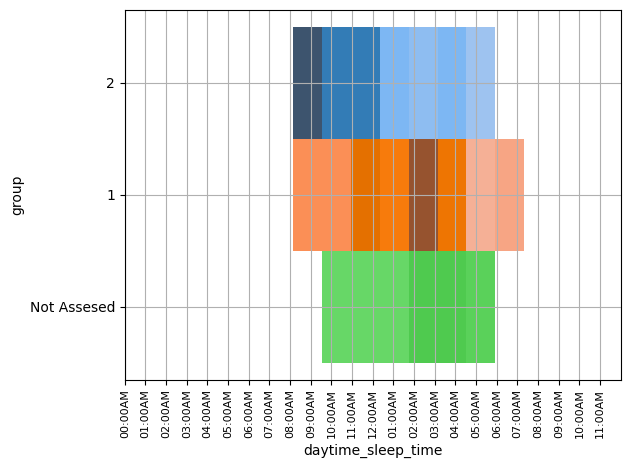

In [136]:
# xlabel = all_monthly_features_df['daytime_sleep_time']
# xlabel_txt = []

# xlabel = [i for i in range(1, 24+1)]
xlabel_txt = [str(i).zfill(2)+':00AM' for i in range(0, 12)] + ['12:00AM'] + [str(i).zfill(2)+':00AM' for i in range(1, 12)]
# g.set_xticks(all_monthly_features_df['daytime_sleep_time']) # <--- set the ticks first
# g.set_xticklabels([str(i//1).zfill(2) + ':' + str((i%1)*60//1).zfill(2) for i in all_monthly_features_df['daytime_sleep_time']])
fig, ax = plt.subplots()

# change the limits of X-axis

# g = sns.histplot(data=all_monthly_features_df, x='daytime_sleep_time', hue = 'group', kde=True)
g = sns.histplot(all_monthly_features_df,x='daytime_sleep_time',y='group',hue='group',legend=False,ax = ax)
g.tick_params(axis='x', rotation=90, labelsize=8)
xvalues = np.arange(24)
ax.set_xlim(0, 24)
plt.xticks(xvalues)
ax.set_xticklabels(xlabel_txt)
plt.grid(True)
plt.show()

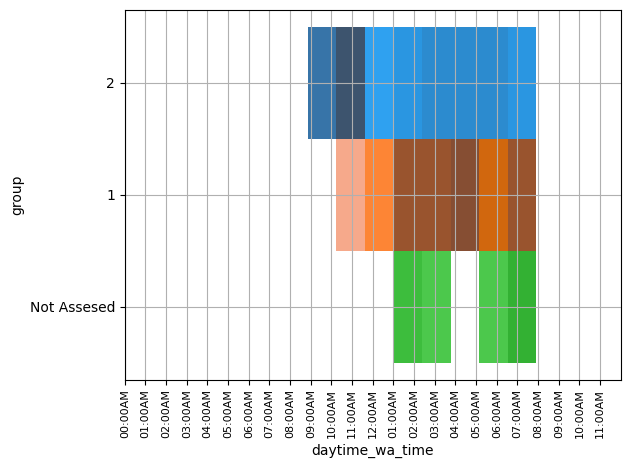

In [137]:
# xlabel = all_monthly_features_df['daytime_sleep_time']
# xlabel_txt = []

# xlabel = [i for i in range(1, 24+1)]
xlabel_txt = [str(i).zfill(2)+':00AM' for i in range(0, 12)] + ['12:00AM'] + [str(i).zfill(2)+':00AM' for i in range(1, 12)]
# g.set_xticks(all_monthly_features_df['daytime_sleep_time']) # <--- set the ticks first
# g.set_xticklabels([str(i//1).zfill(2) + ':' + str((i%1)*60//1).zfill(2) for i in all_monthly_features_df['daytime_sleep_time']])
fig, ax = plt.subplots()

# change the limits of X-axis

# g = sns.histplot(data=all_monthly_features_df, x='daytime_sleep_time', hue = 'group', kde=True)
g = sns.histplot(all_monthly_features_df,x='daytime_wa_time',y='group',hue='group',legend=False,ax = ax)
g.tick_params(axis='x', rotation=90, labelsize=8)
xvalues = np.arange(24)
ax.set_xlim(0, 24)
plt.xticks(xvalues)
ax.set_xticklabels(xlabel_txt)
plt.grid(True)
plt.show()

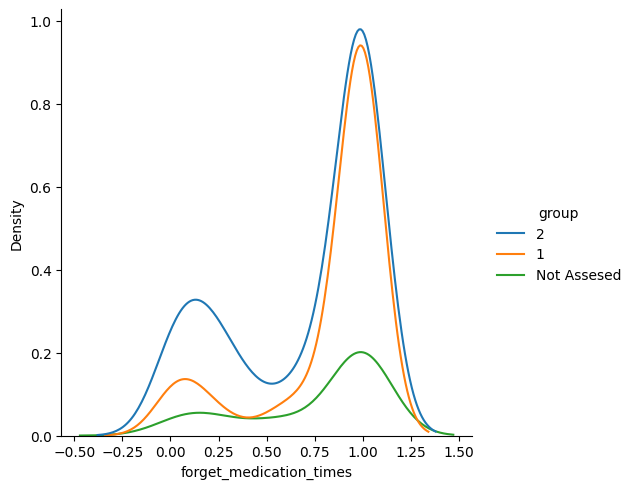

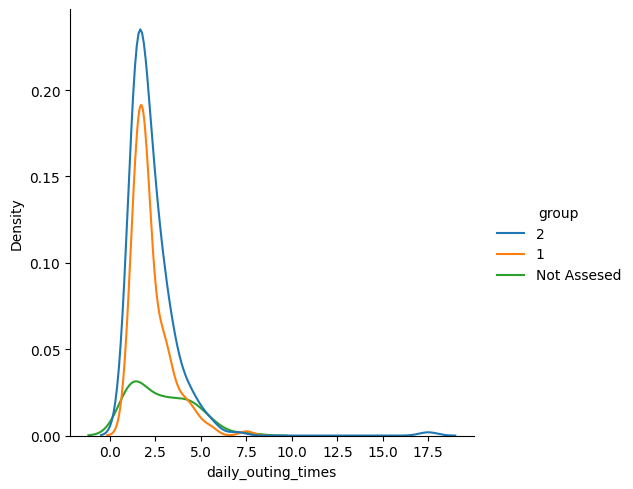

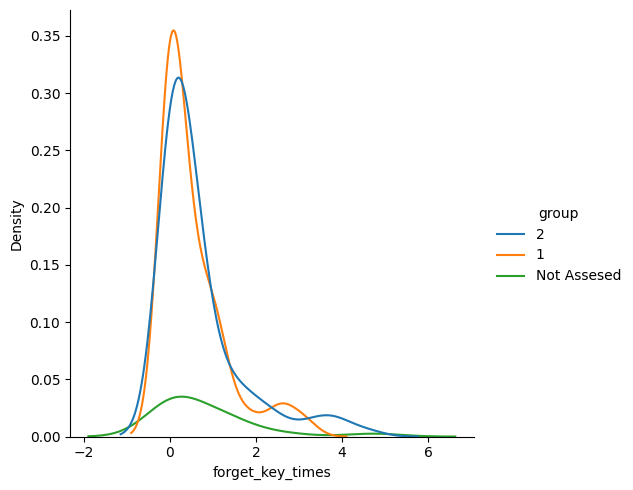

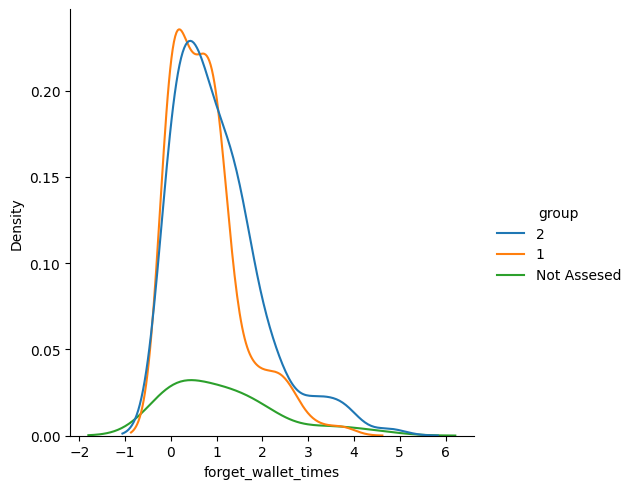

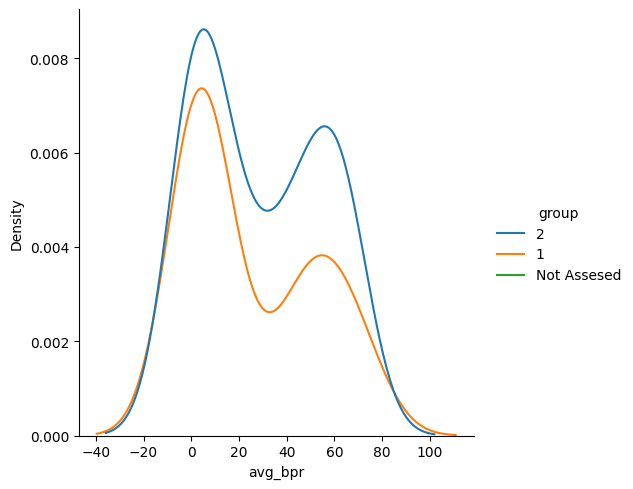

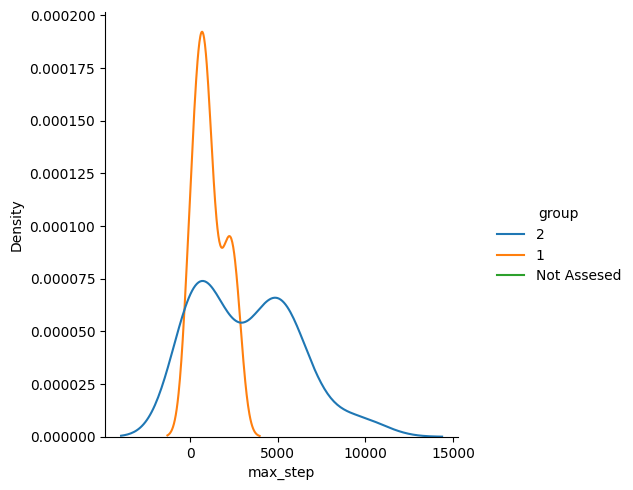

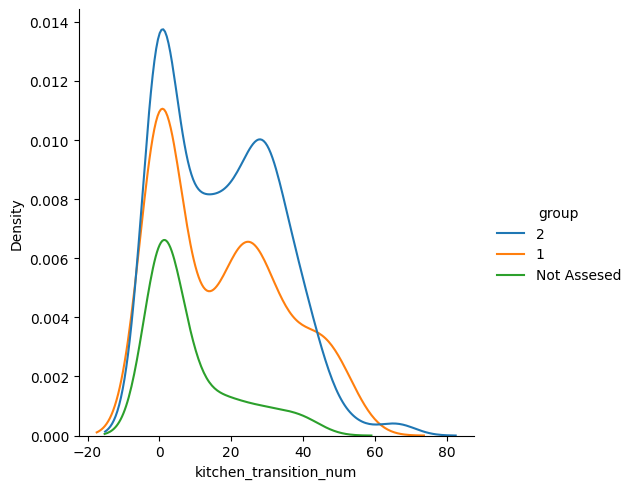

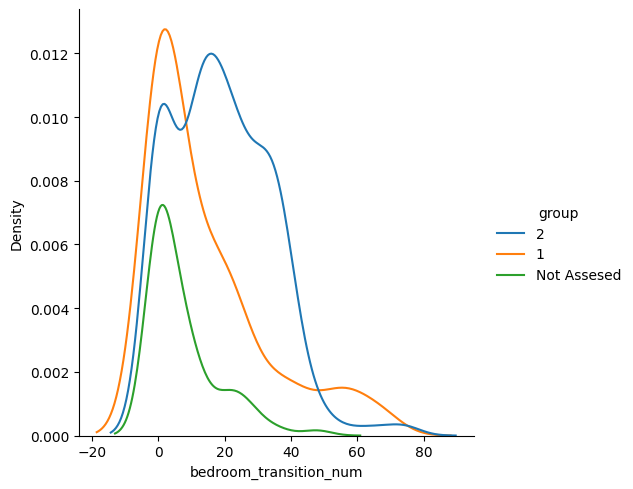

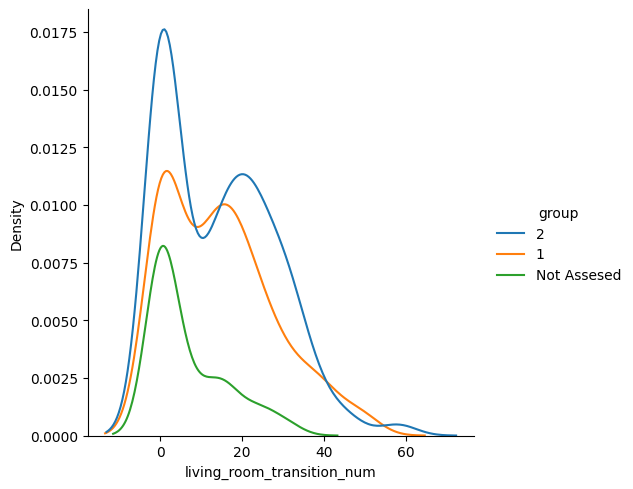

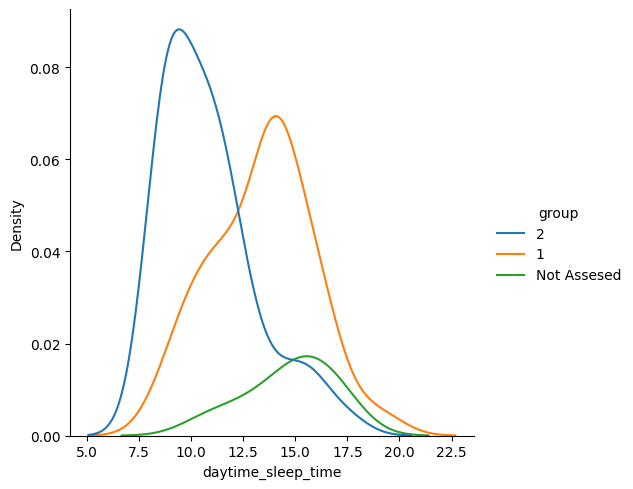

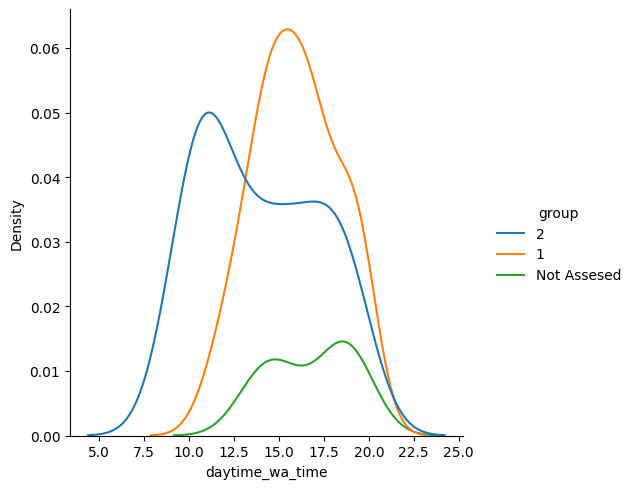

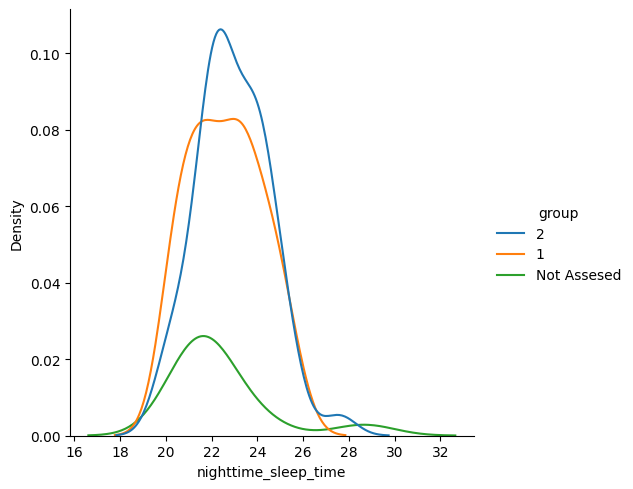

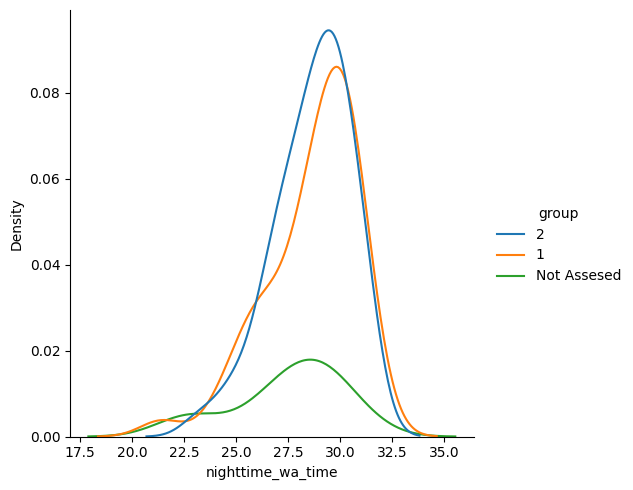

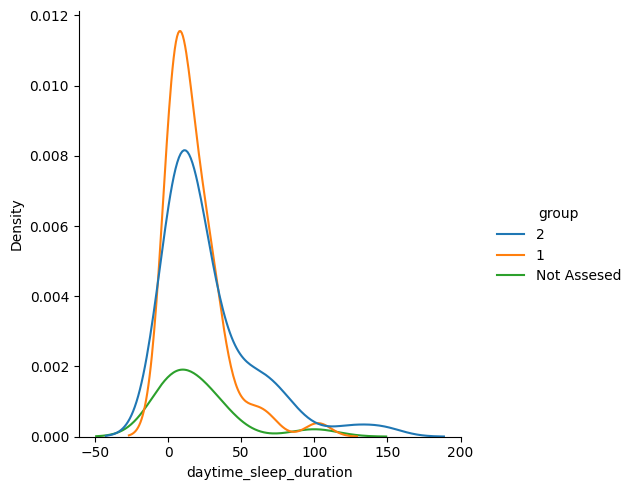

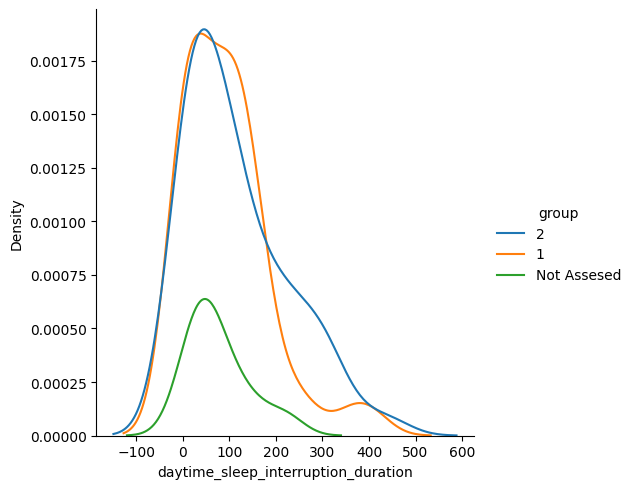

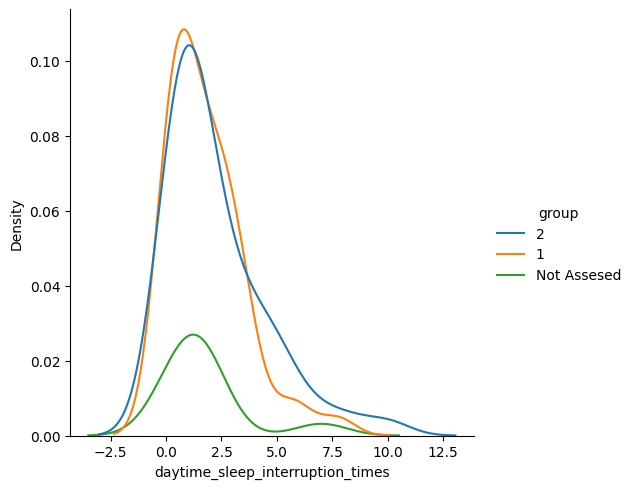

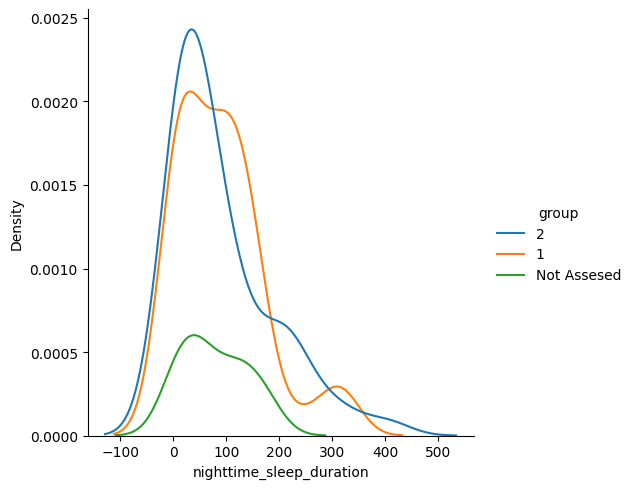

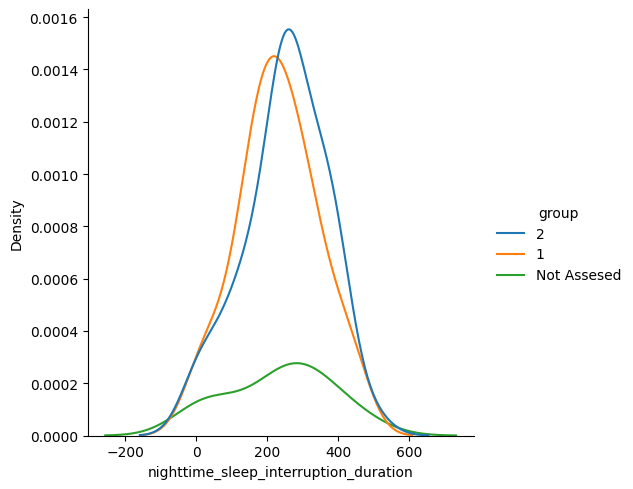

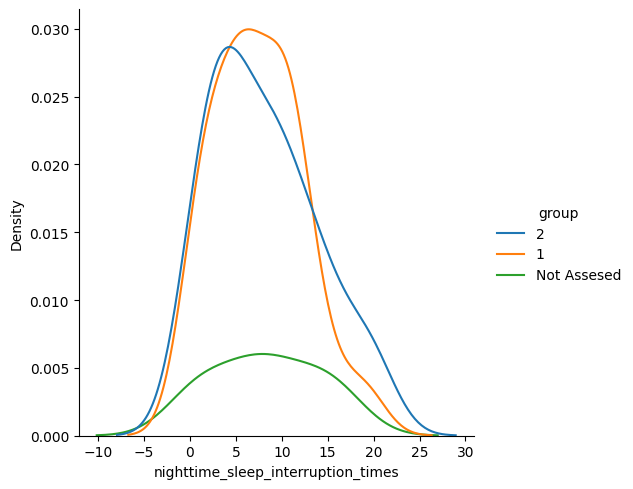

In [103]:
from matplotlib import pyplot as plt
import seaborn as sns
numeric_features = ['forget_medication_times','daily_outing_times','forget_key_times',\
                        'forget_wallet_times','avg_bpr','max_step','kitchen_transition_num',\
                        'bedroom_transition_num','living_room_transition_num',\
                        'daytime_sleep_time','daytime_wa_time','nighttime_sleep_time','nighttime_wa_time',\
                        'daytime_sleep_duration','daytime_sleep_interruption_duration','daytime_sleep_interruption_times',\
                        'nighttime_sleep_duration','nighttime_sleep_interruption_duration','nighttime_sleep_interruption_times']
for each_feature in numeric_features:
    # sns.catplot(data=all_monthly_features_df, x=each_feature, y="group")
    sns.displot(data=all_monthly_features_df, x=each_feature, hue = 'group', kind='kde')
    plt.show()

In [143]:
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


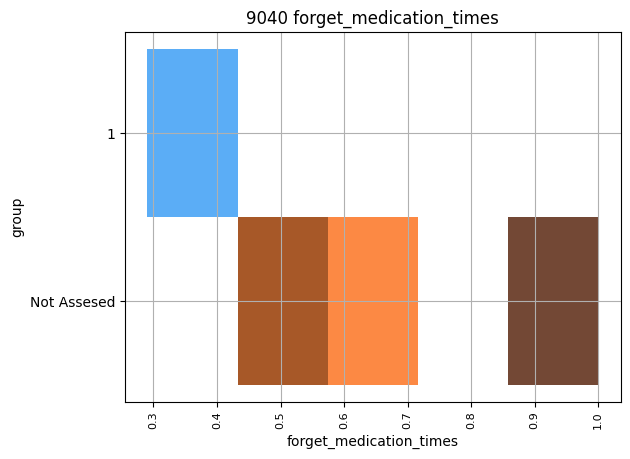

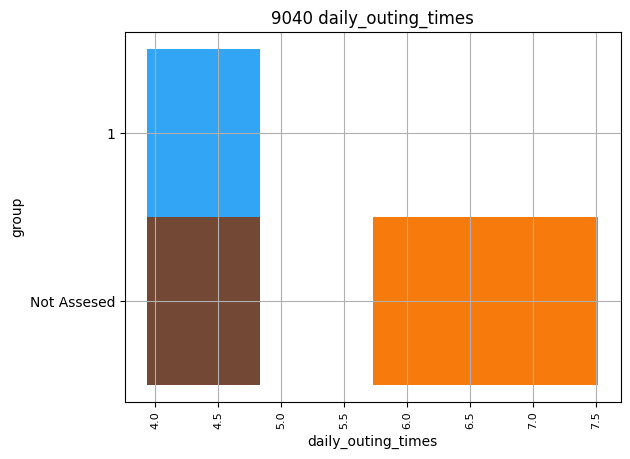

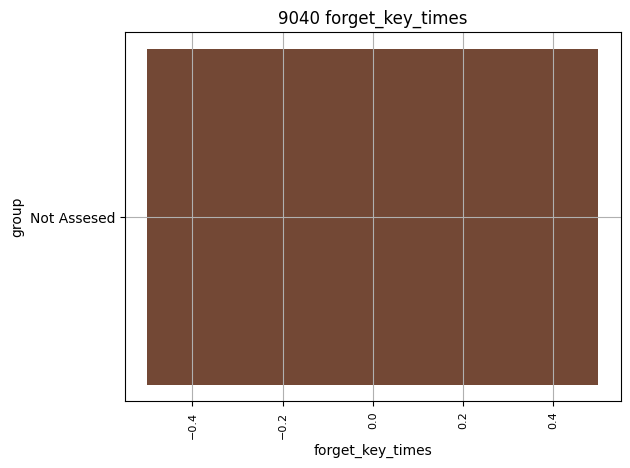

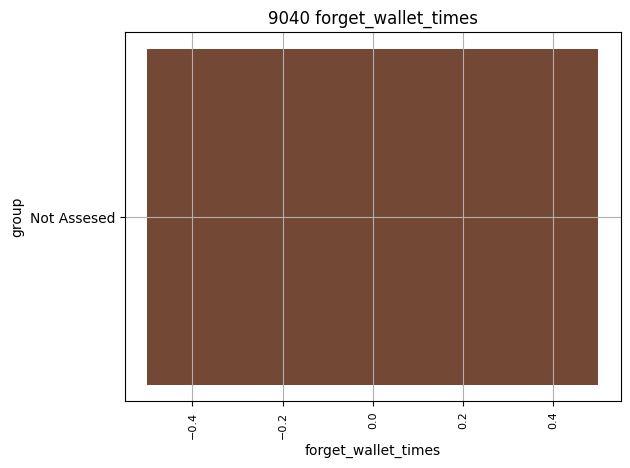

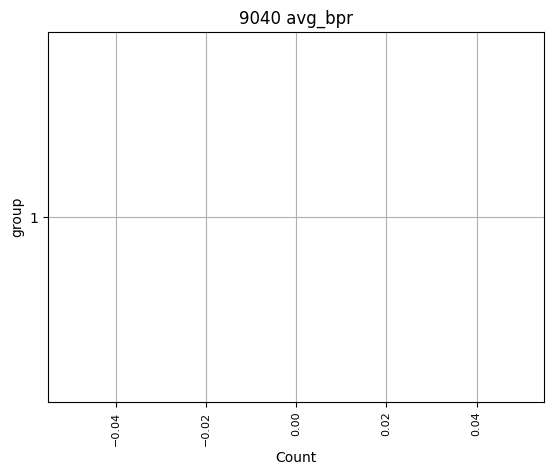

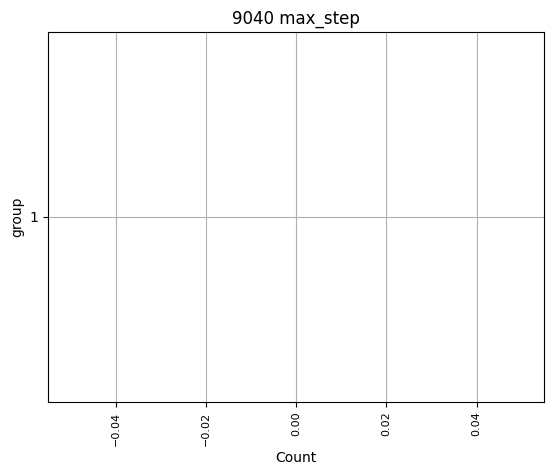

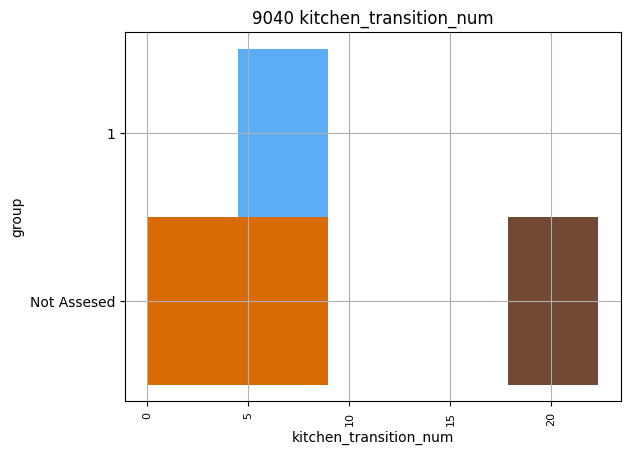

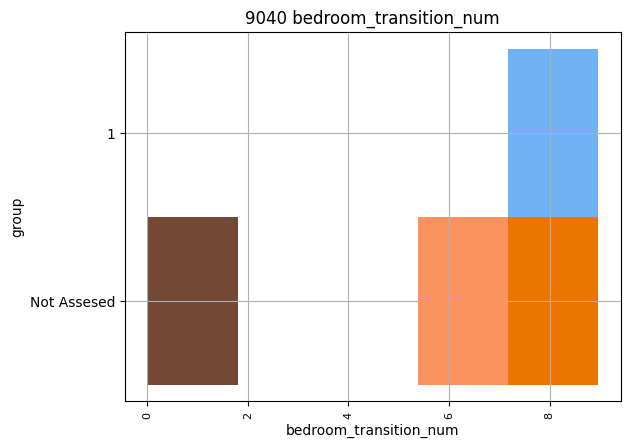

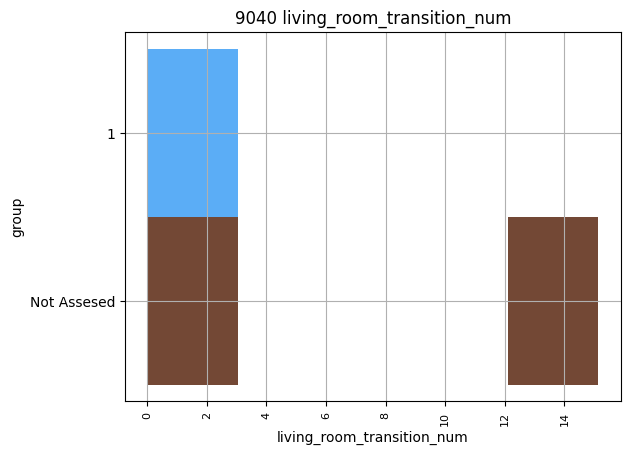

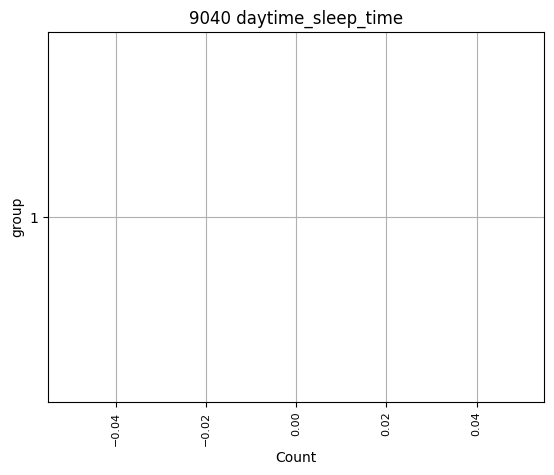

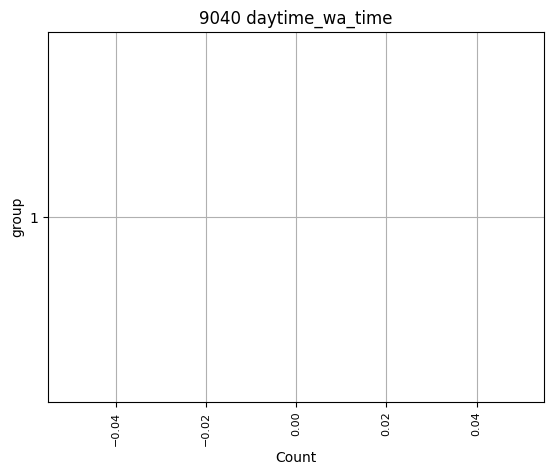

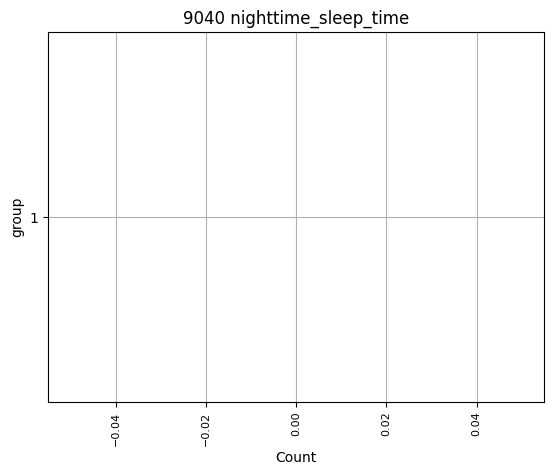

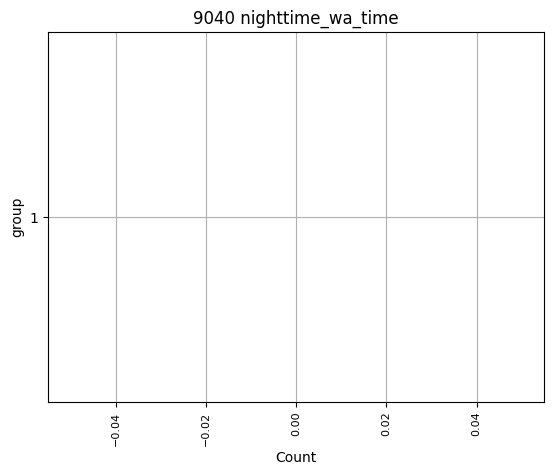

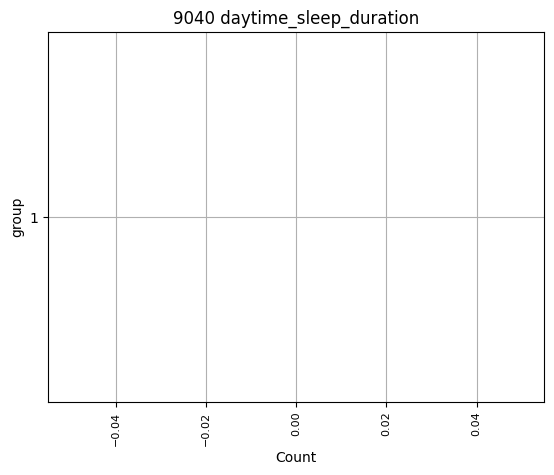

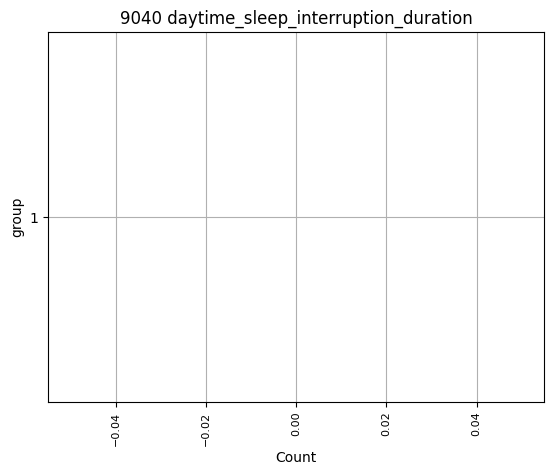

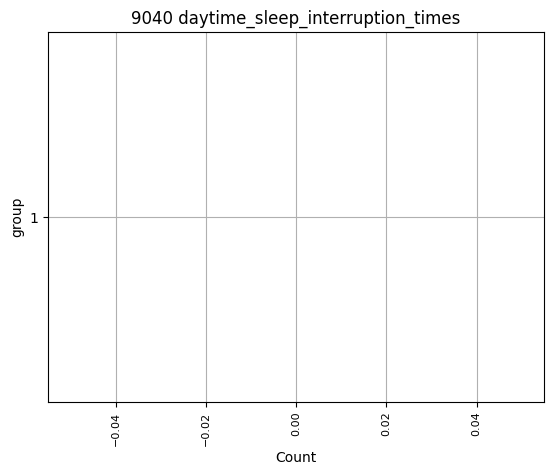

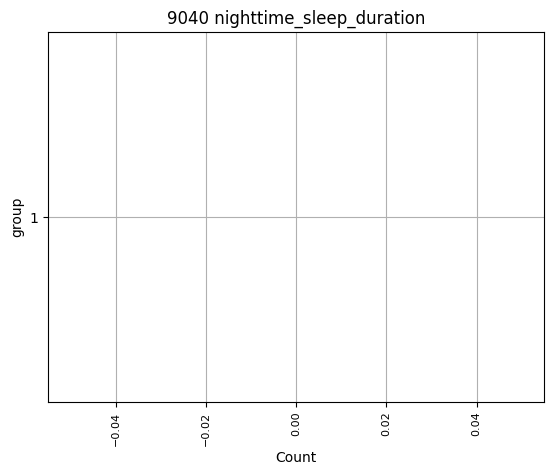

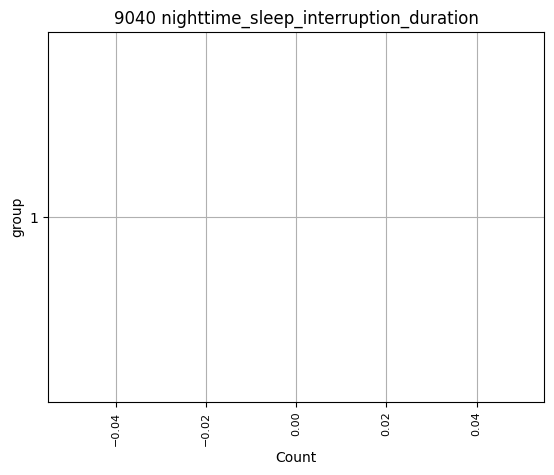

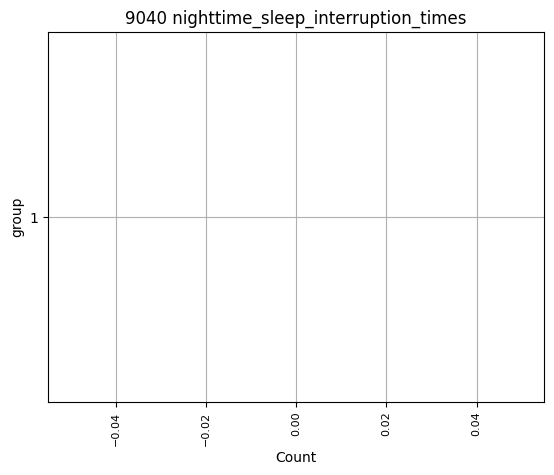

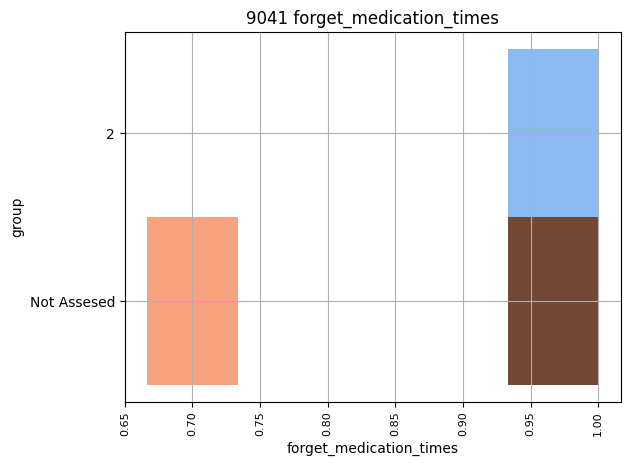

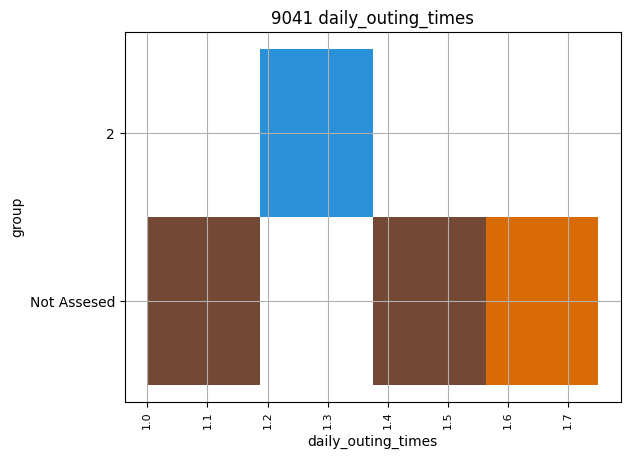

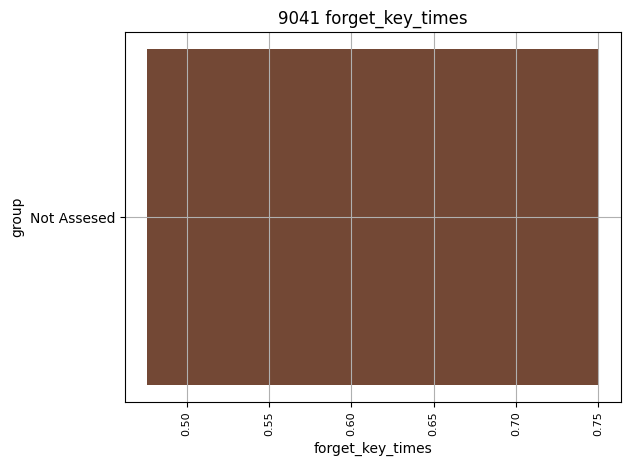

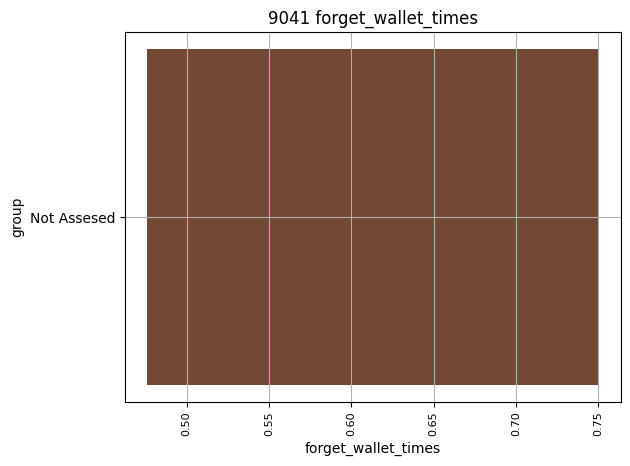

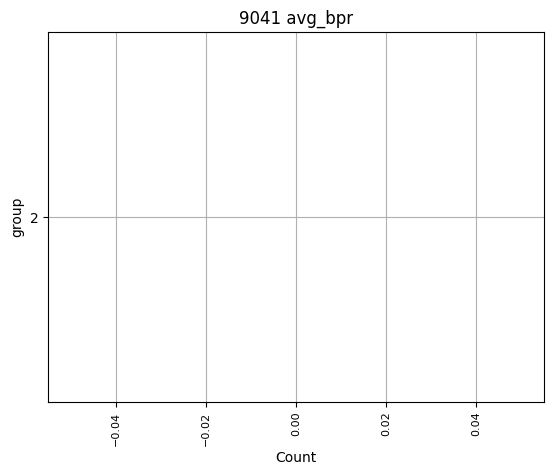

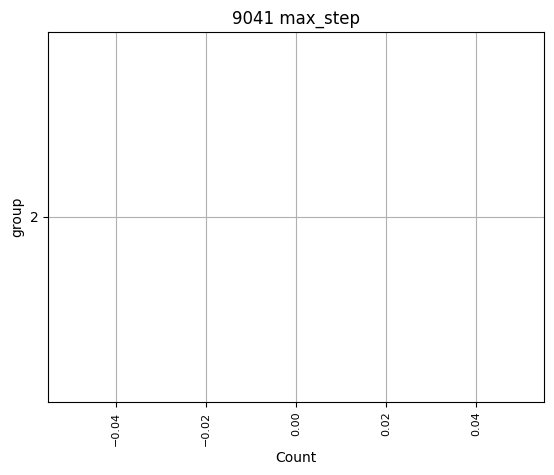

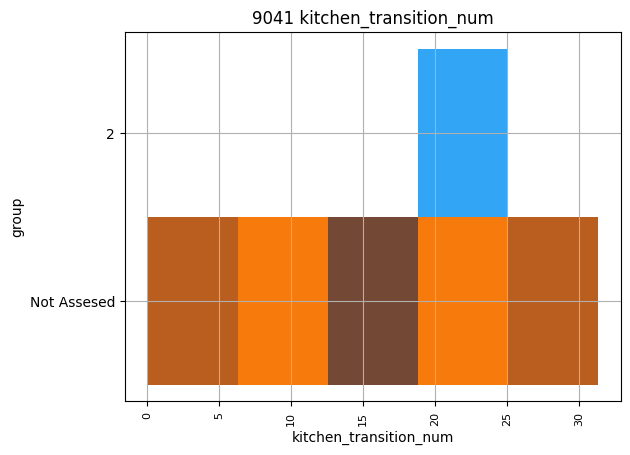

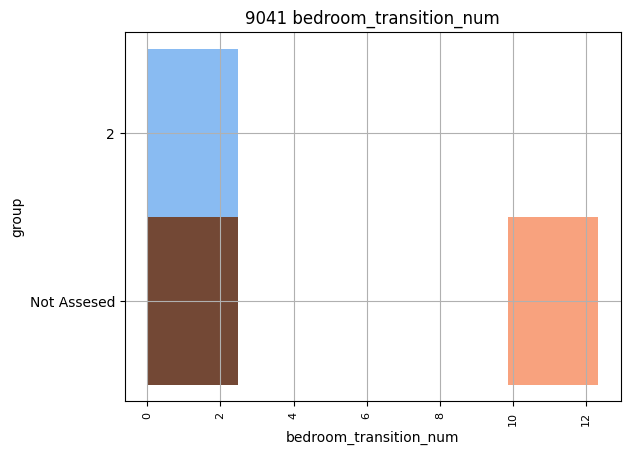

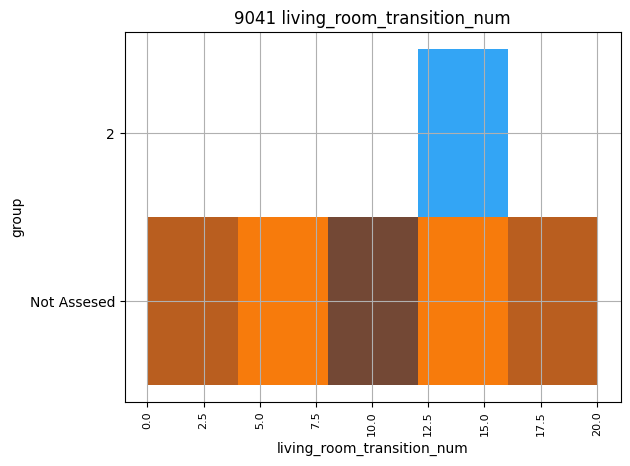

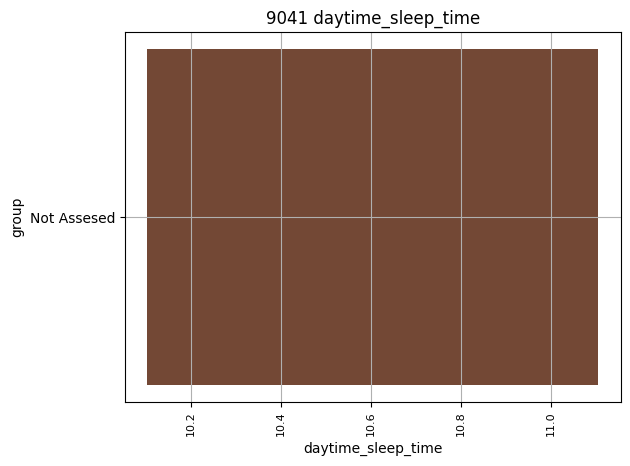

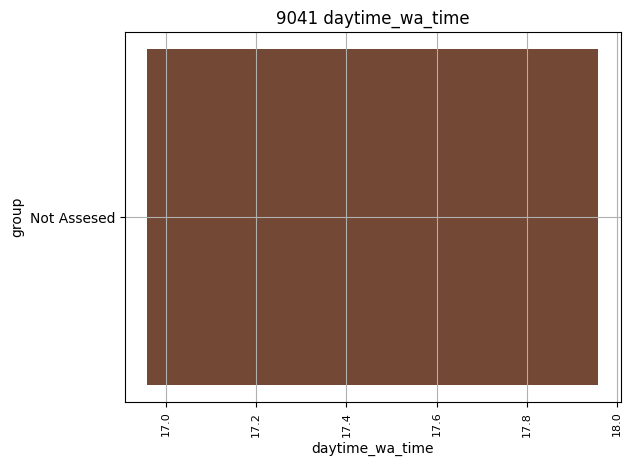

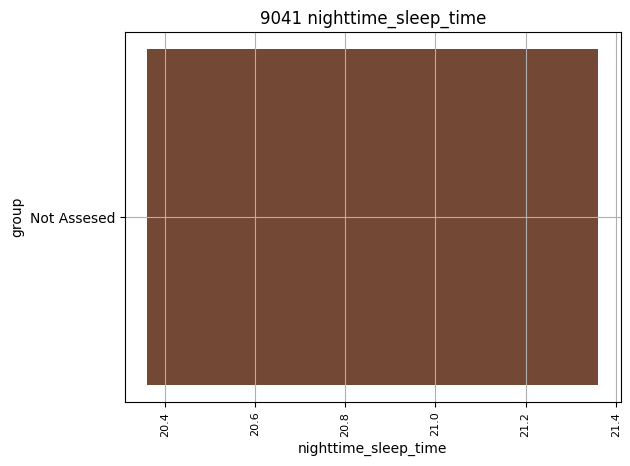

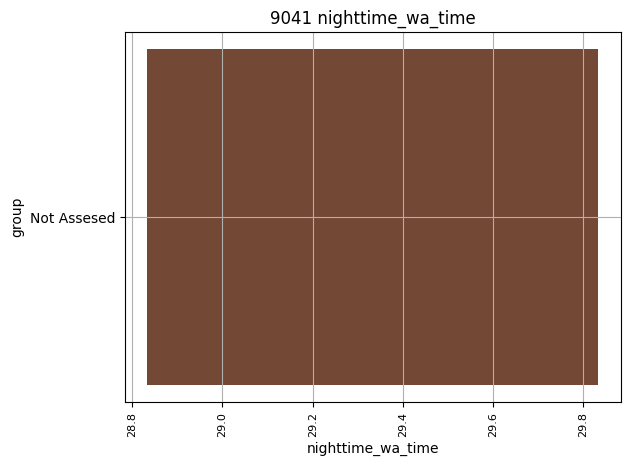

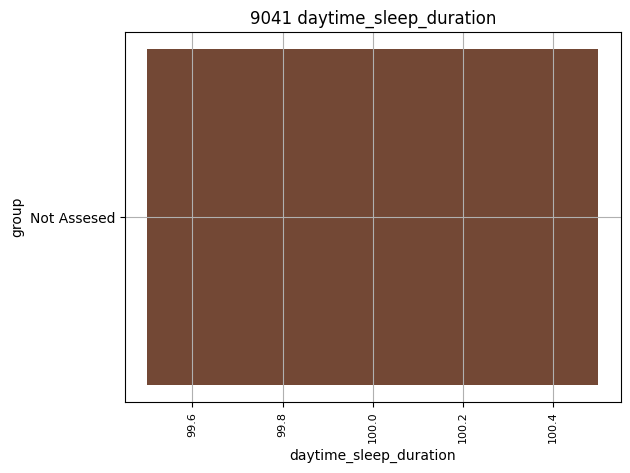

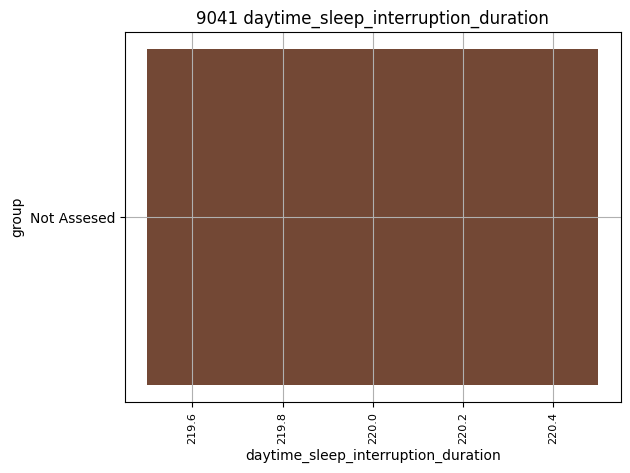

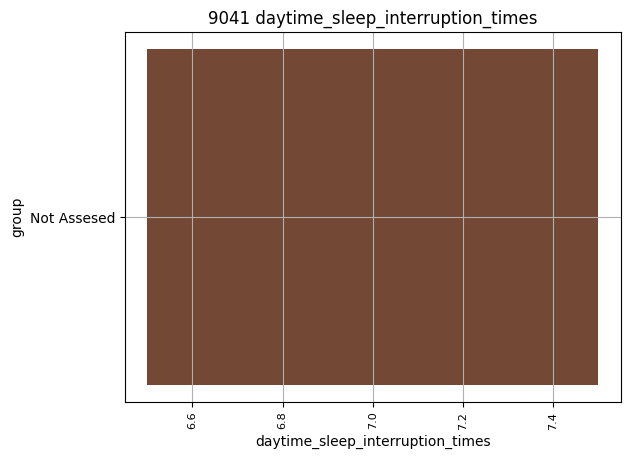

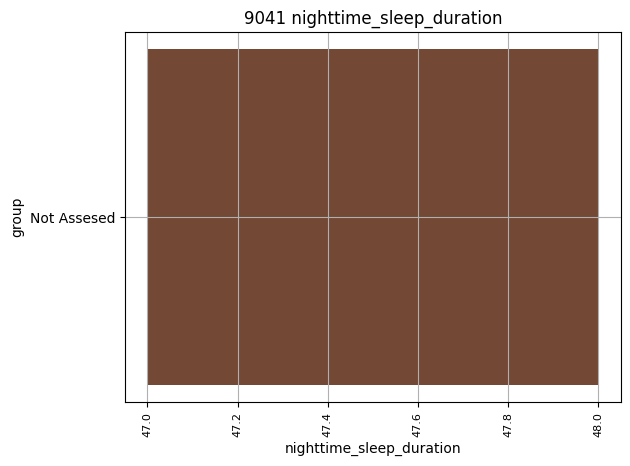

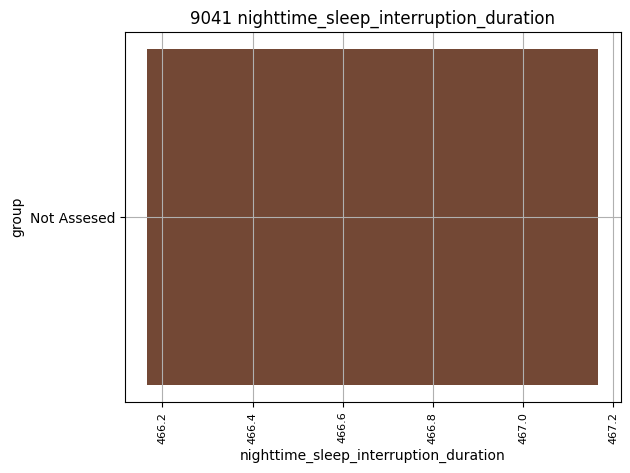

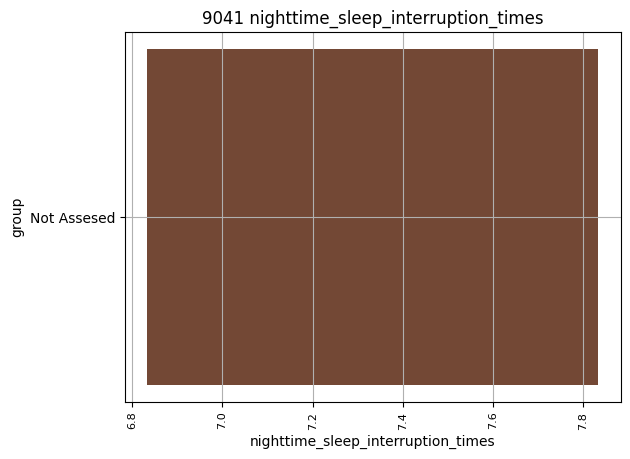

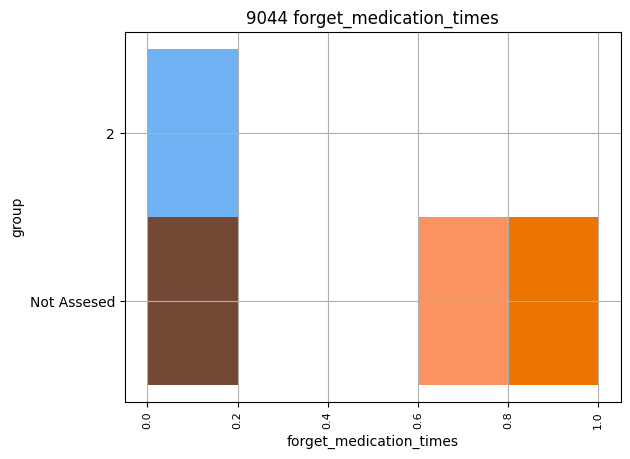

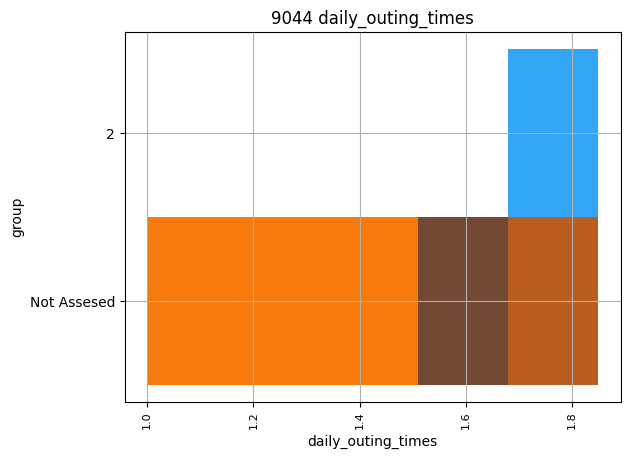

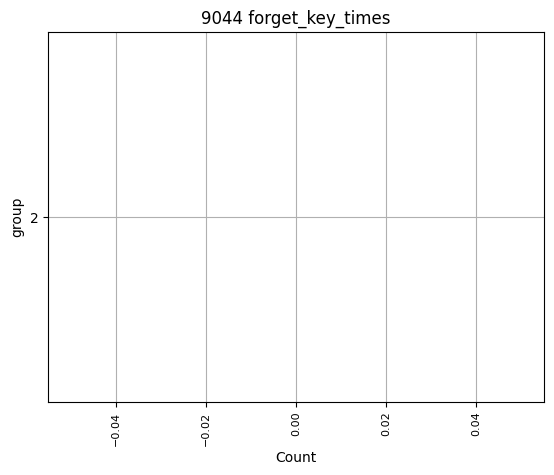

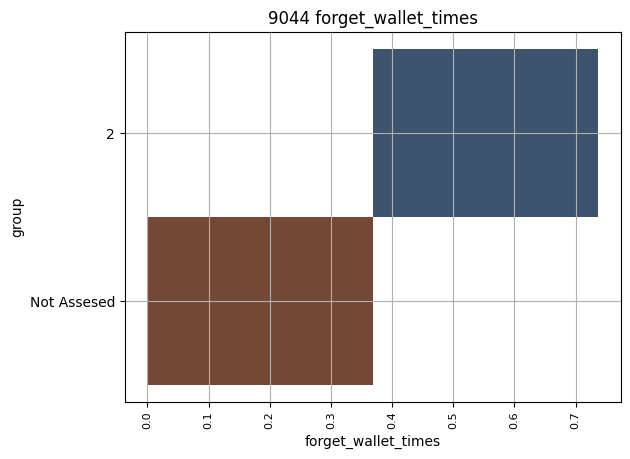

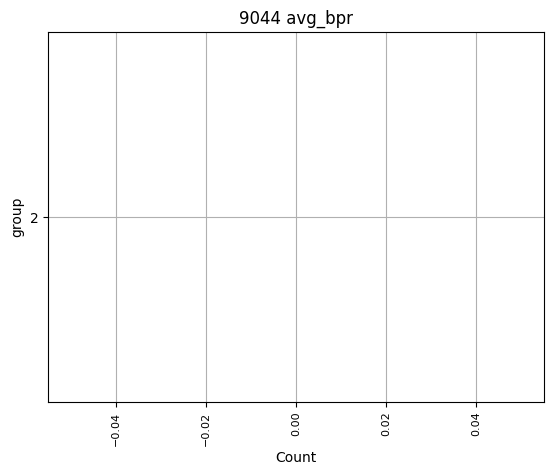

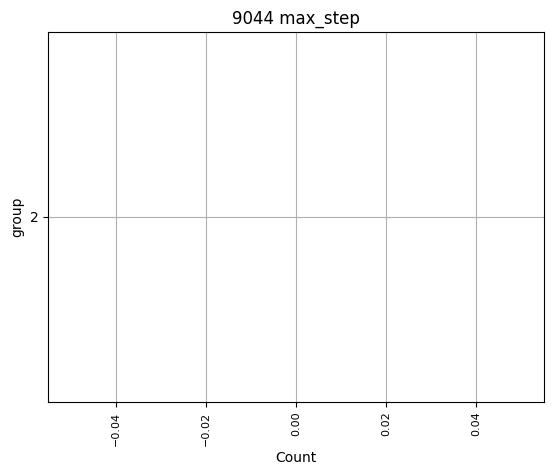

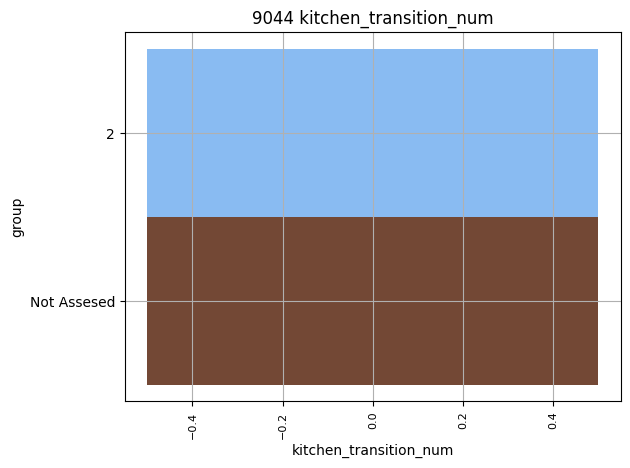

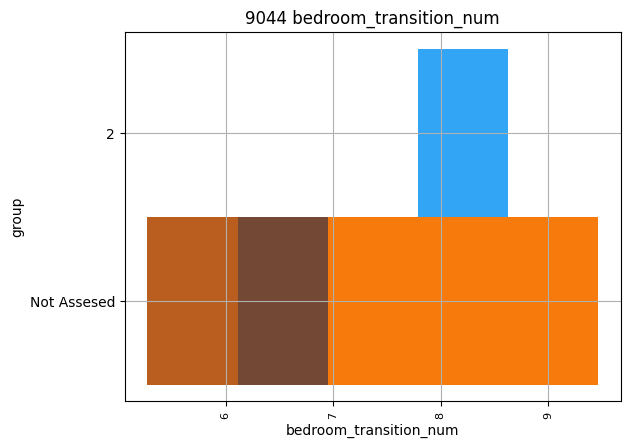

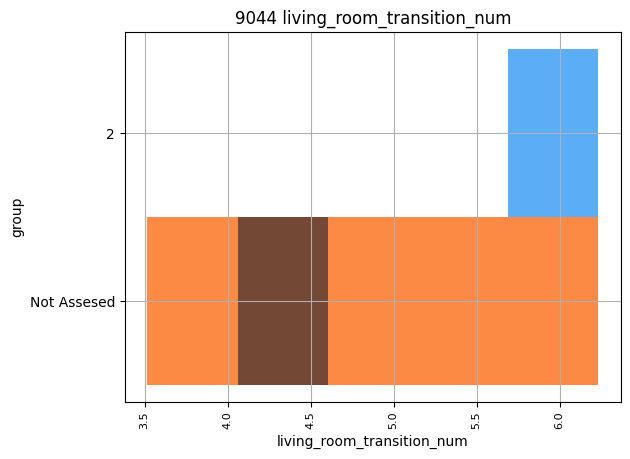

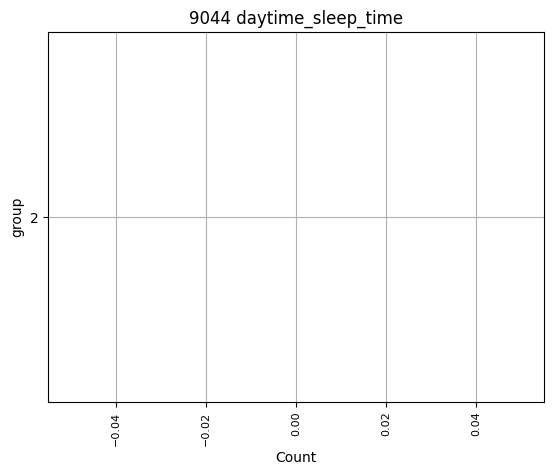

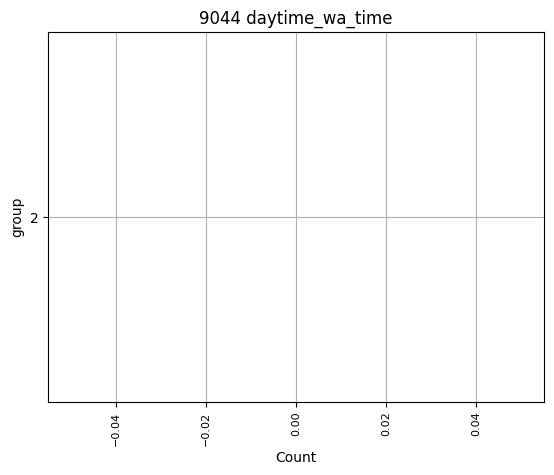

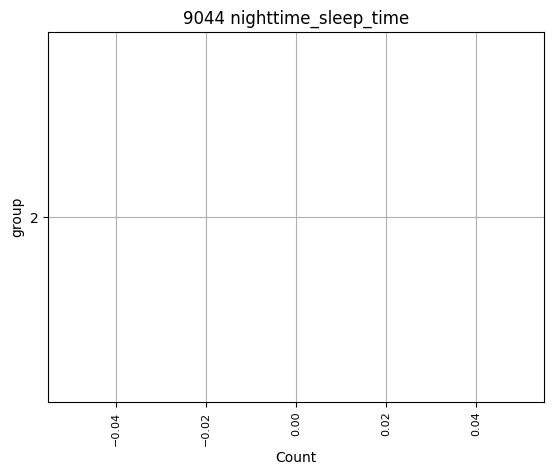

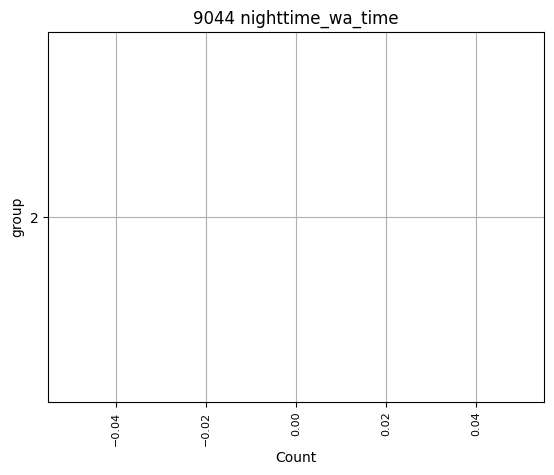

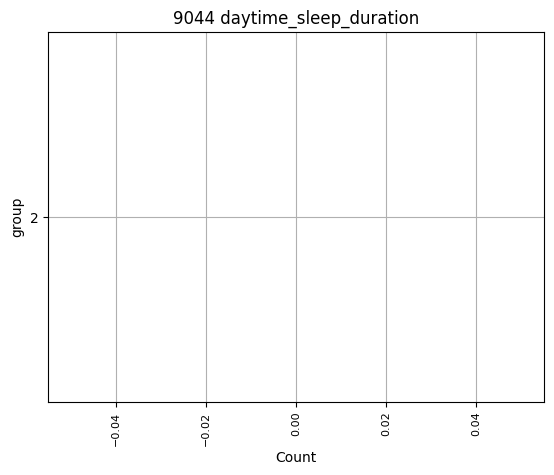

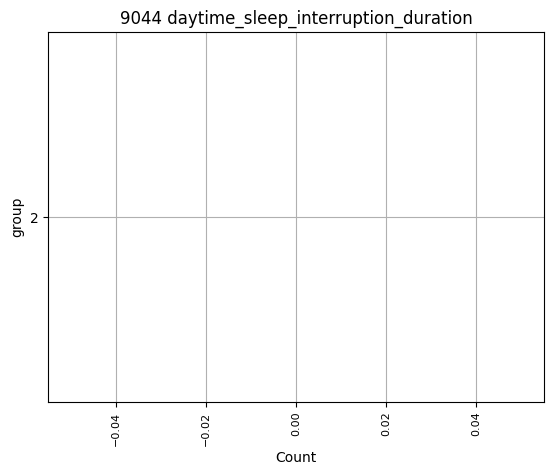

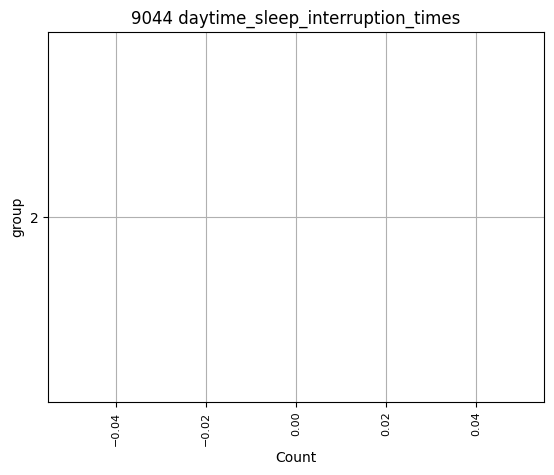

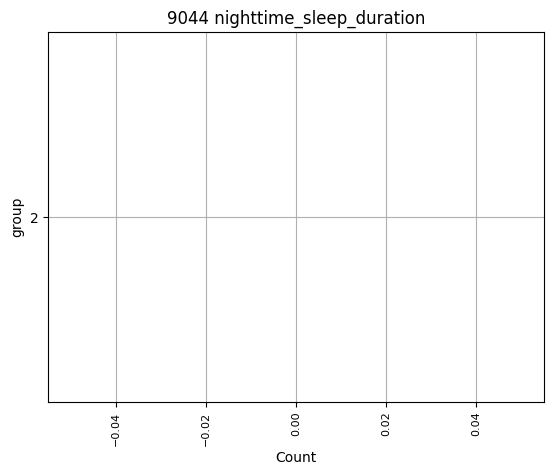

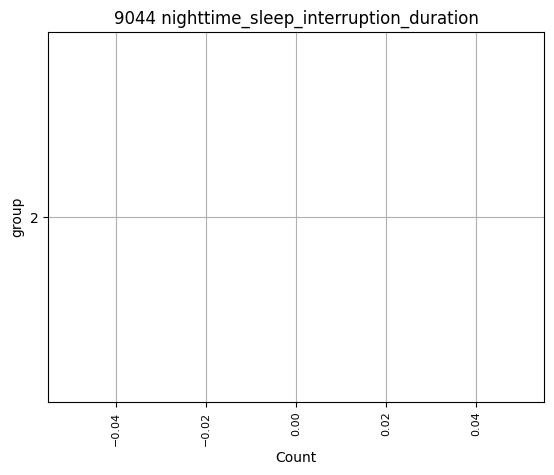

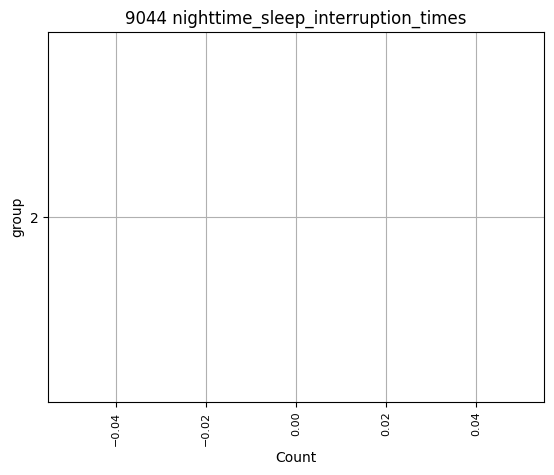

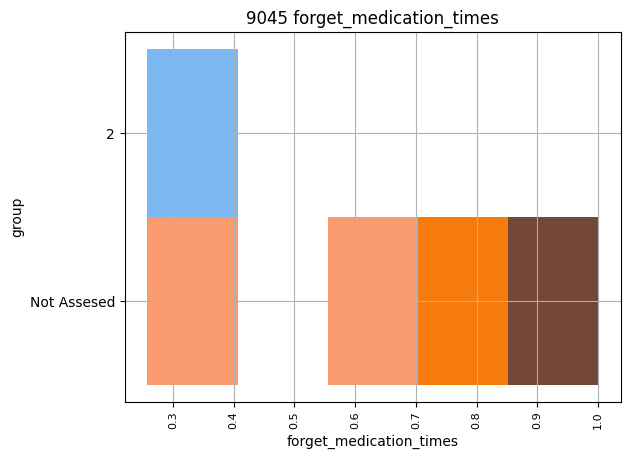

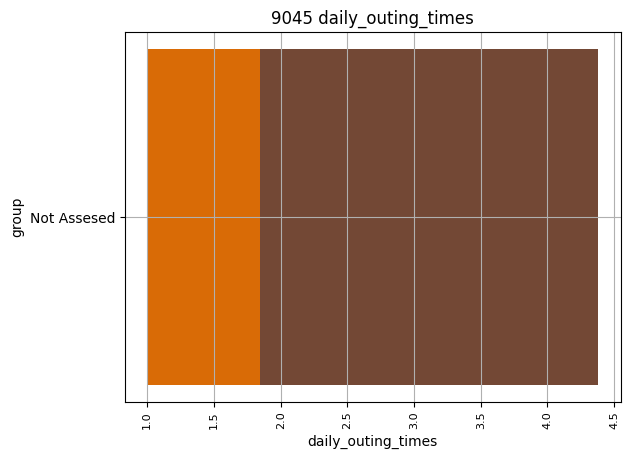

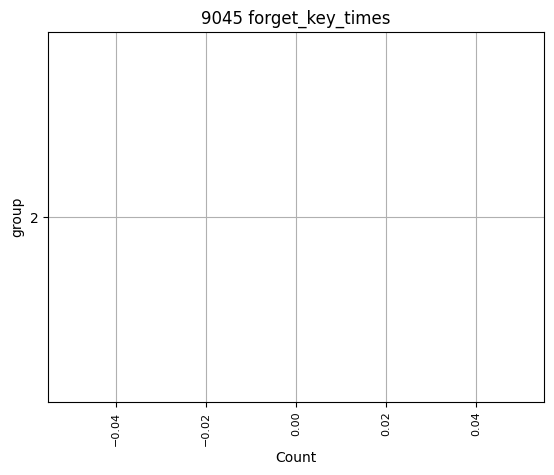

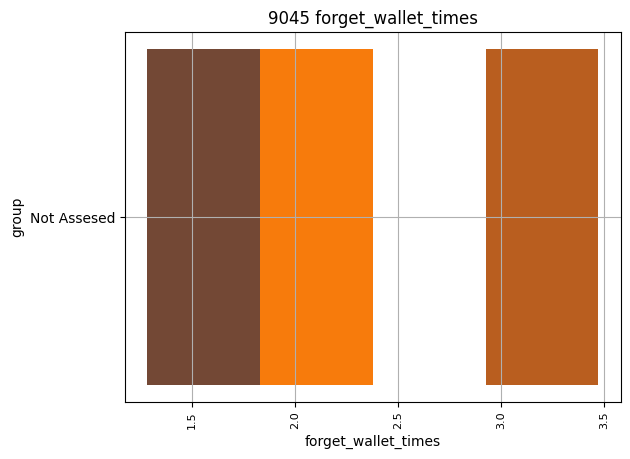

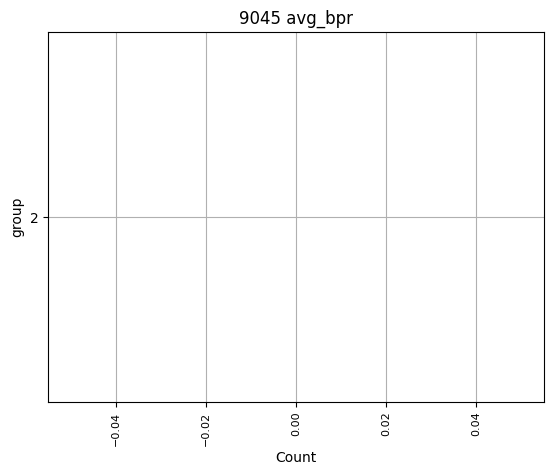

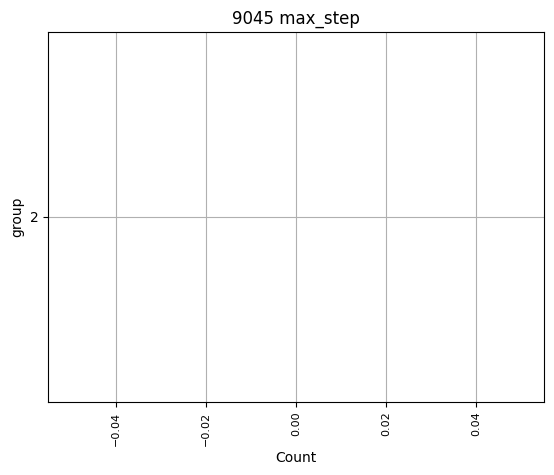

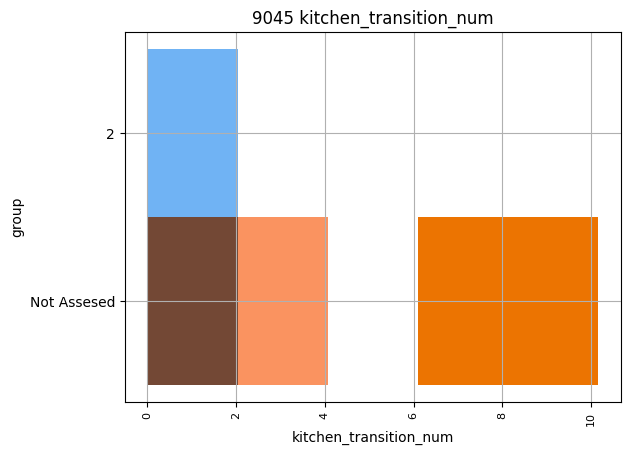

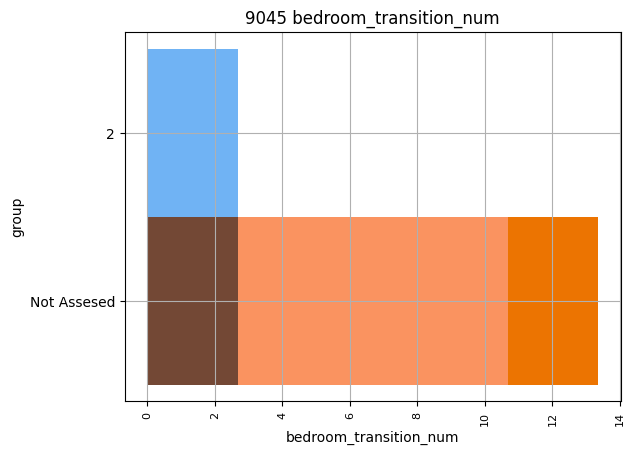

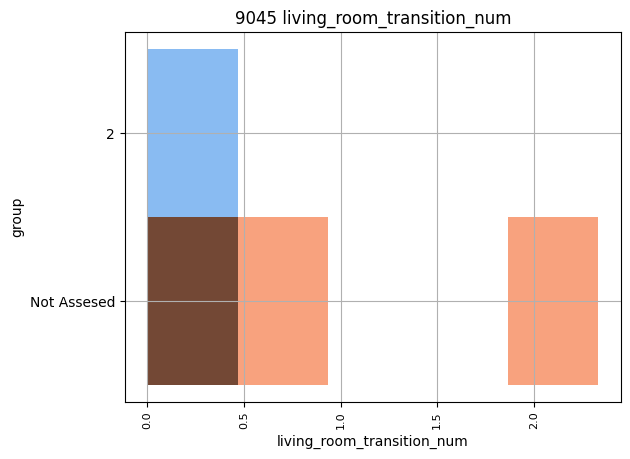

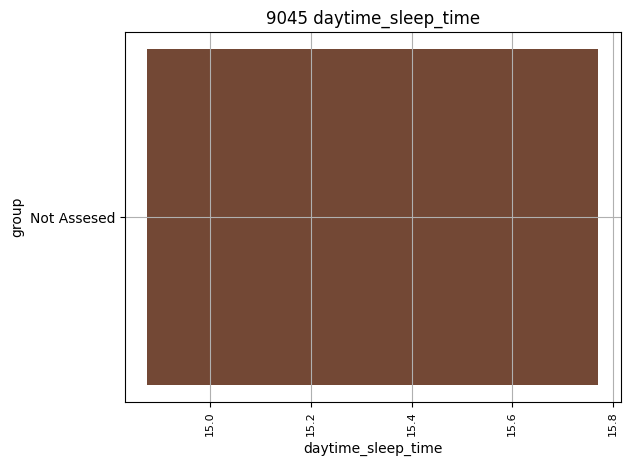

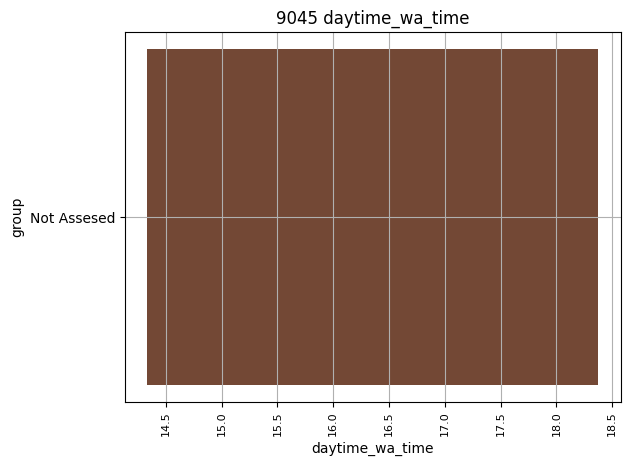

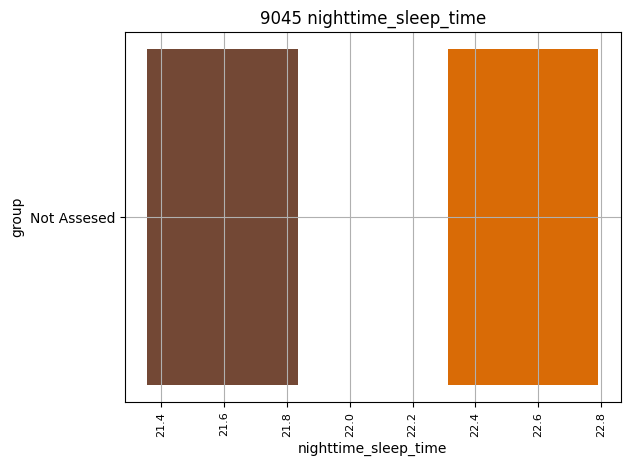

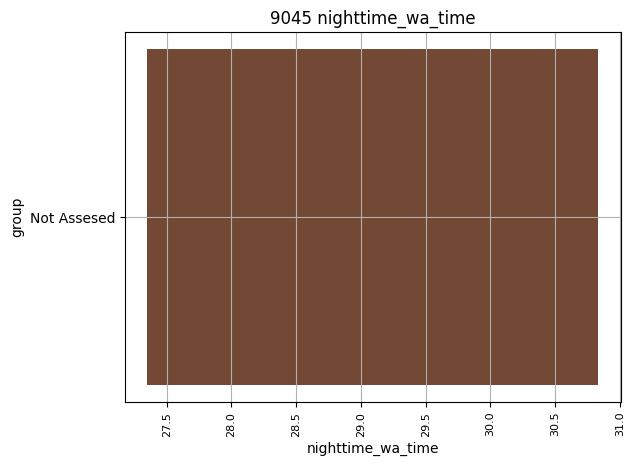

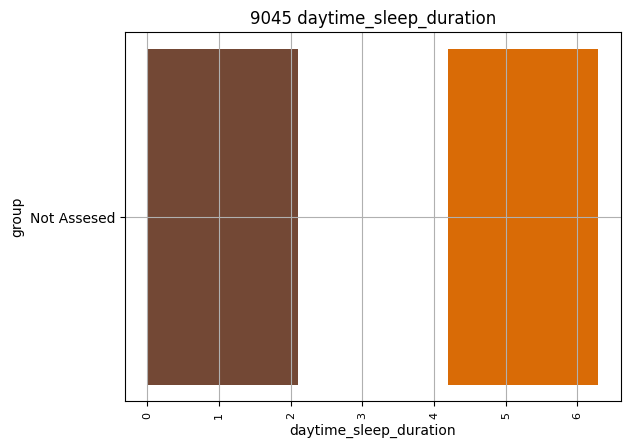

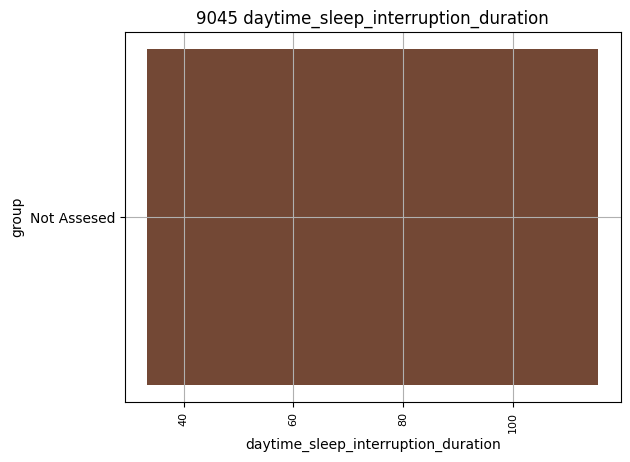

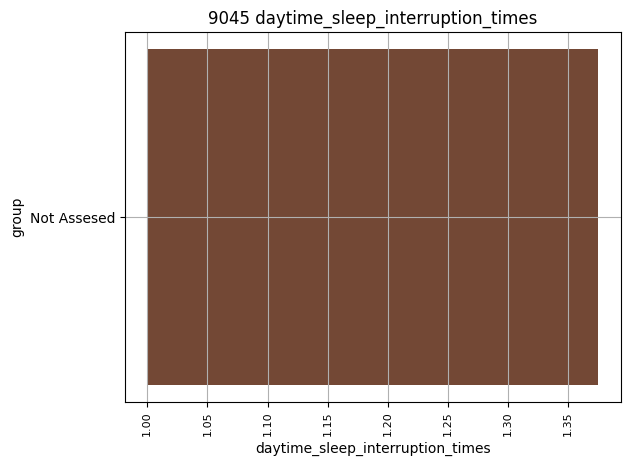

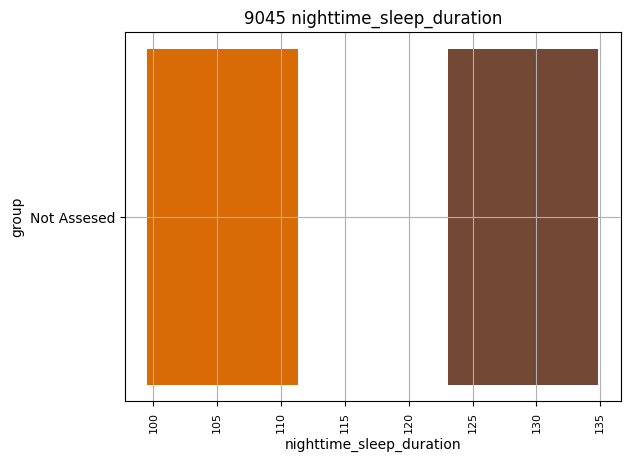

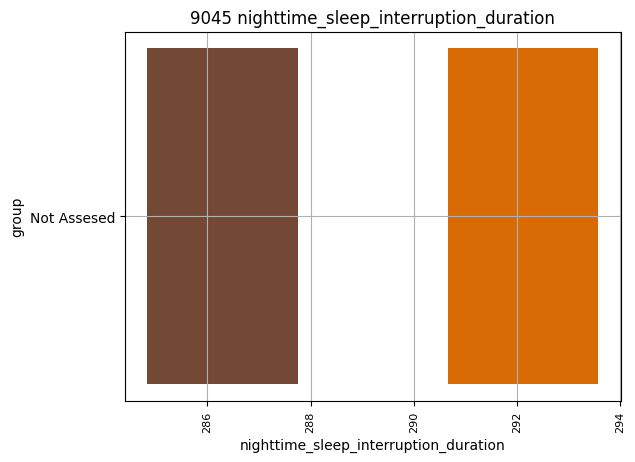

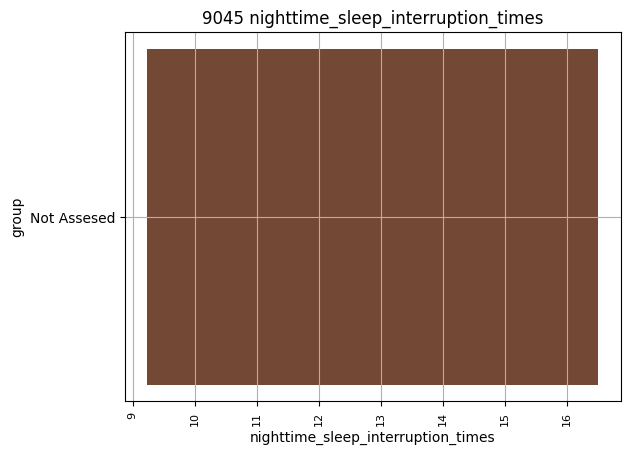

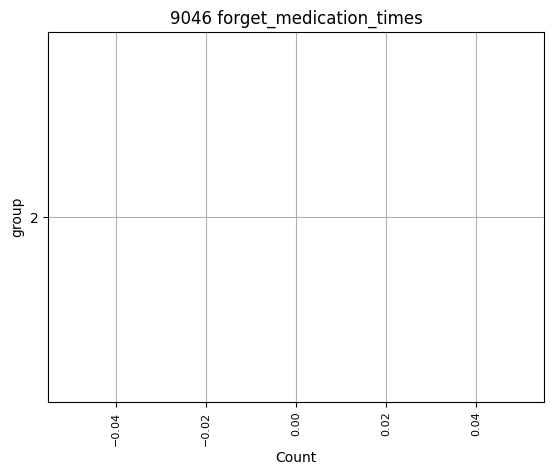

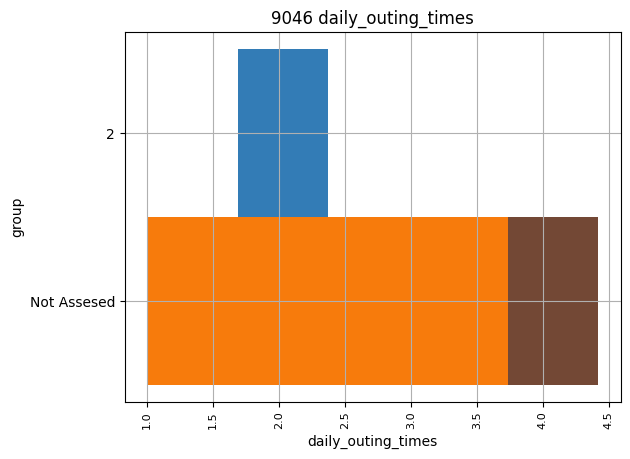

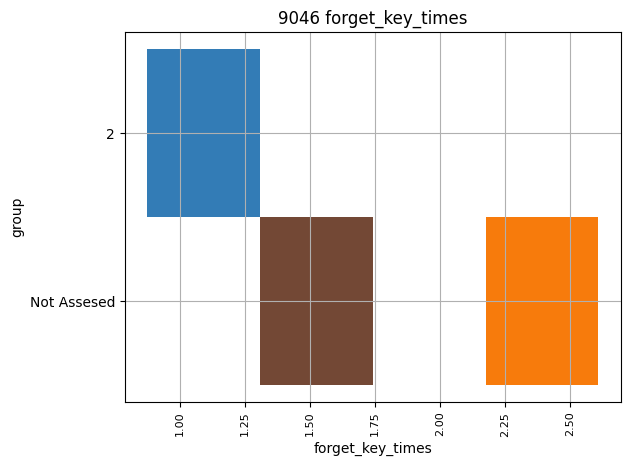

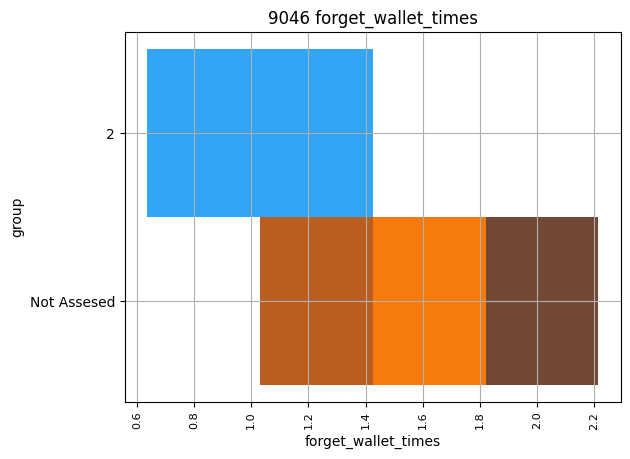

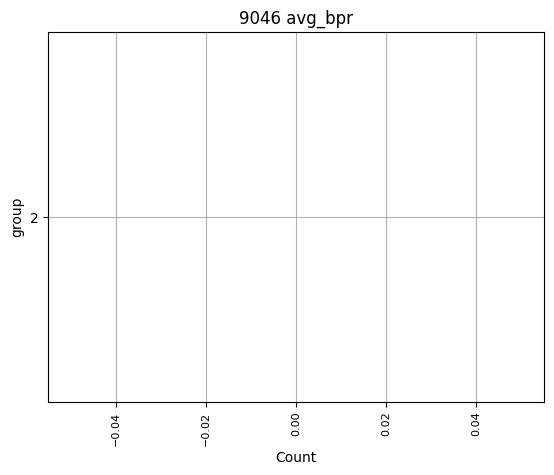

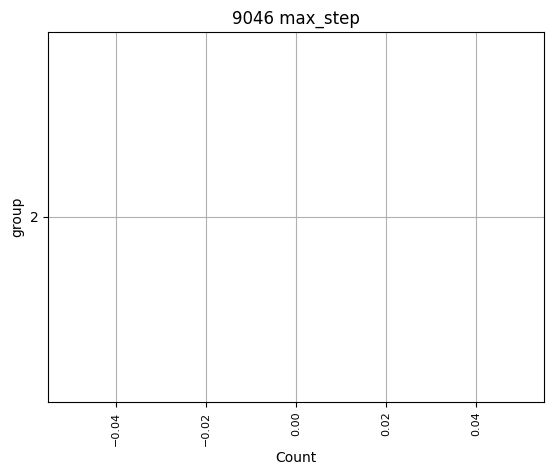

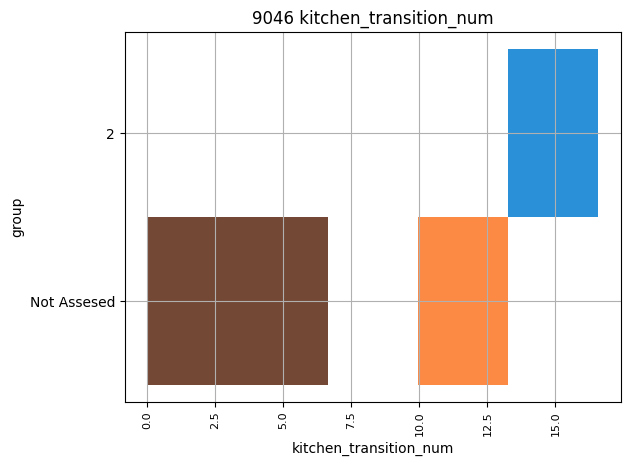

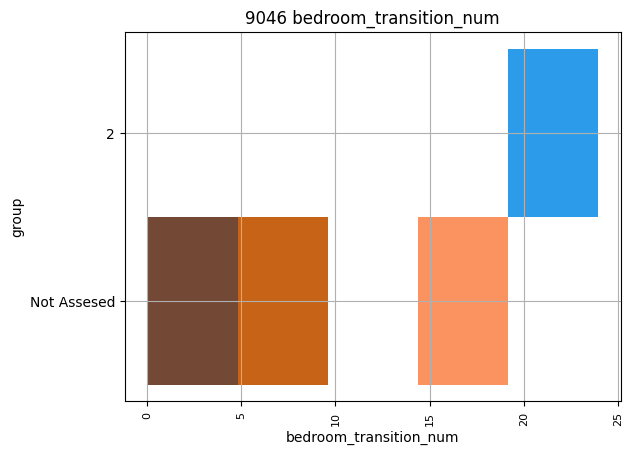

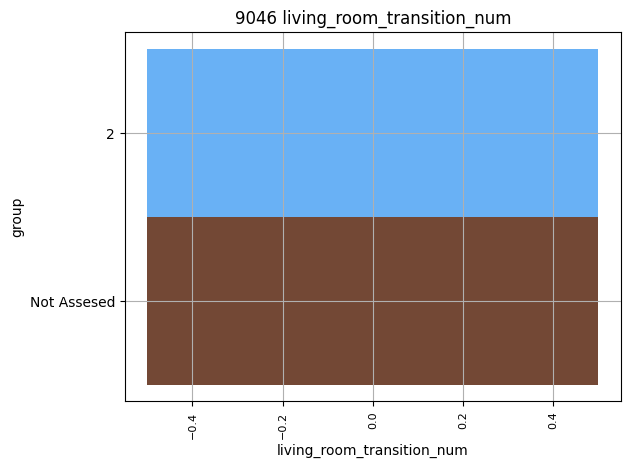

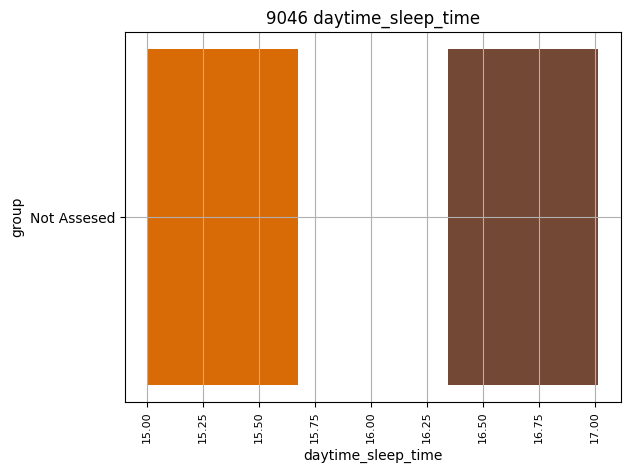

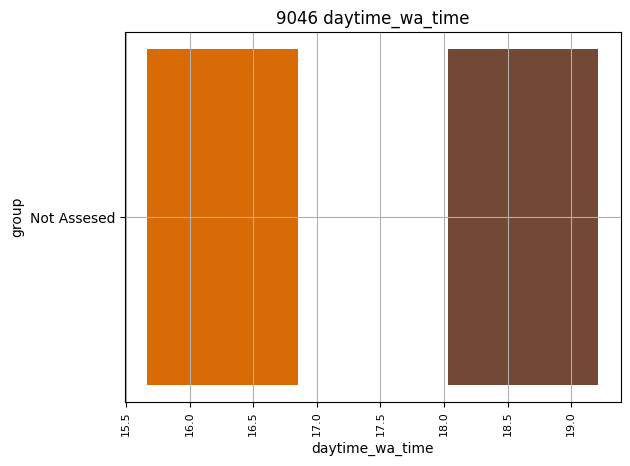

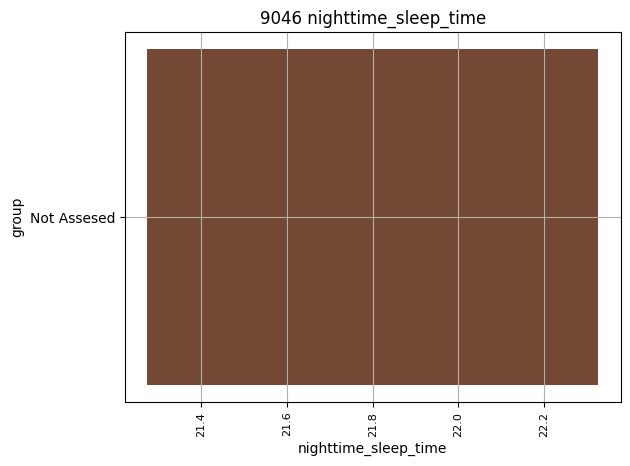

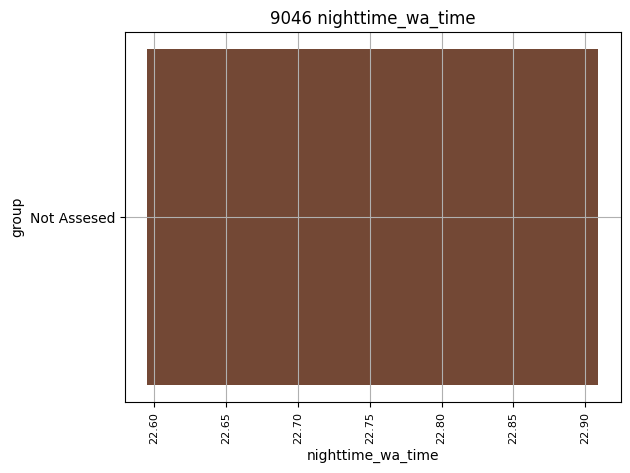

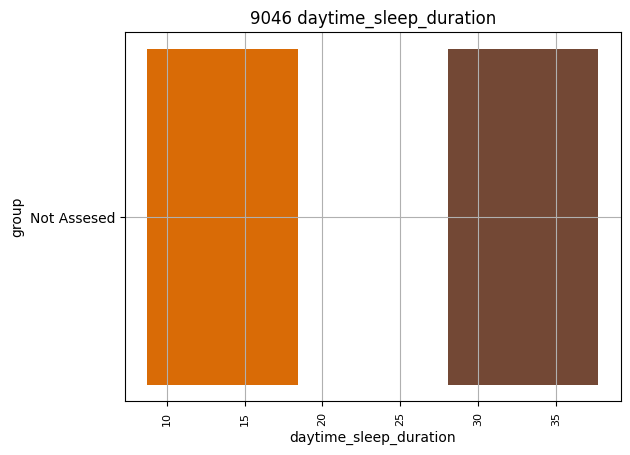

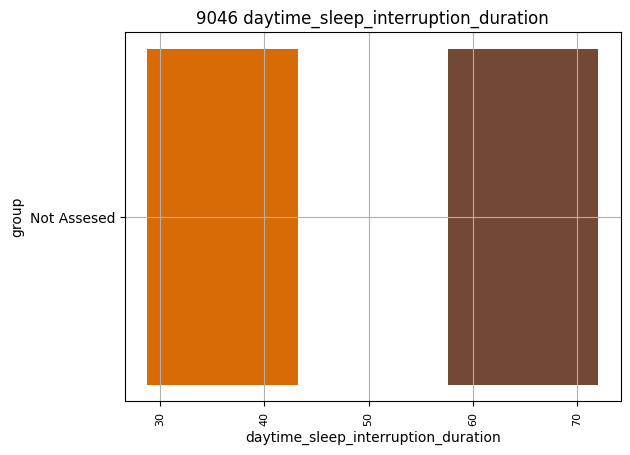

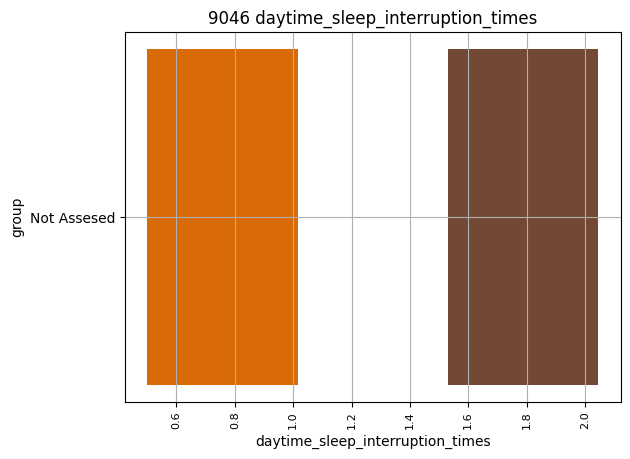

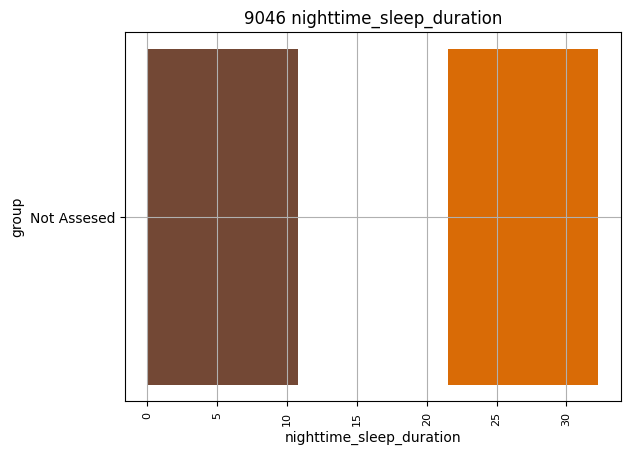

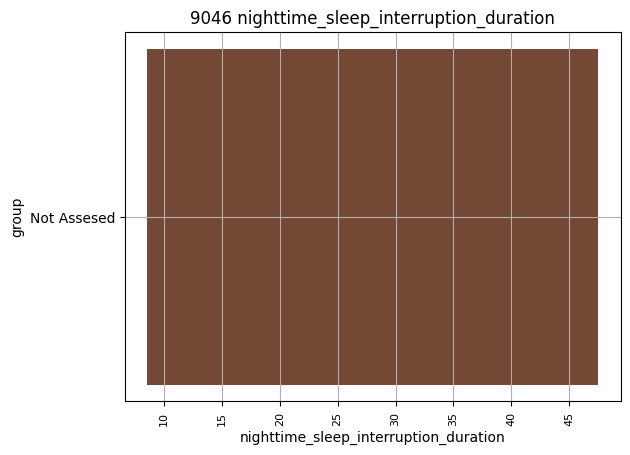

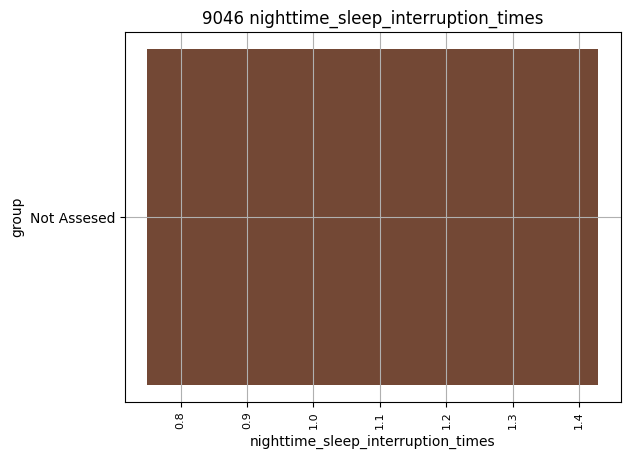

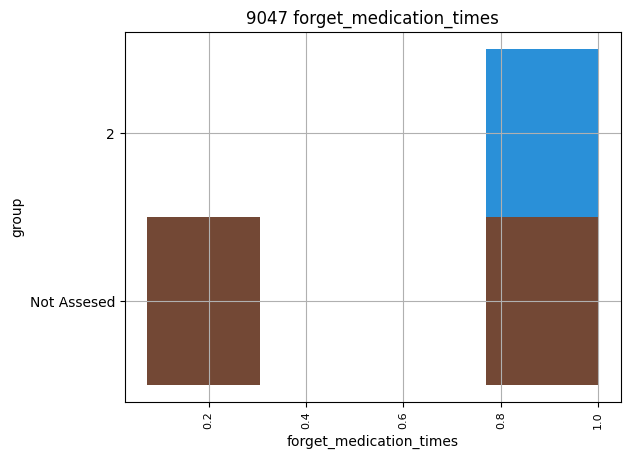

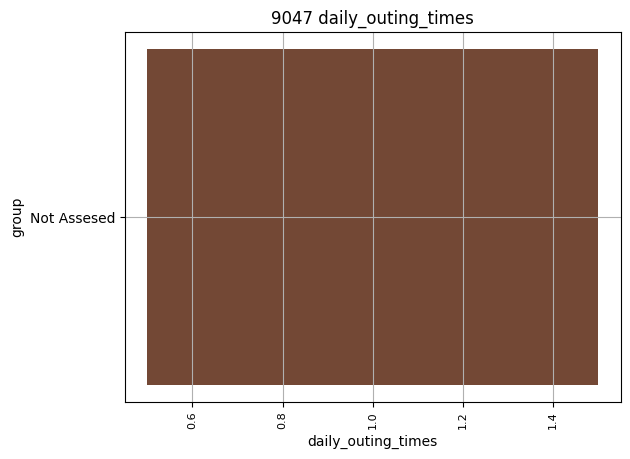

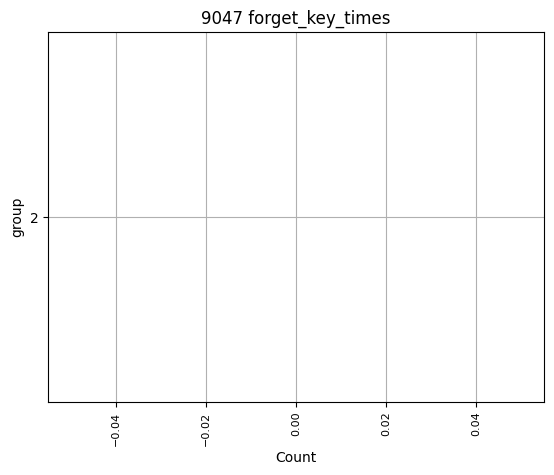

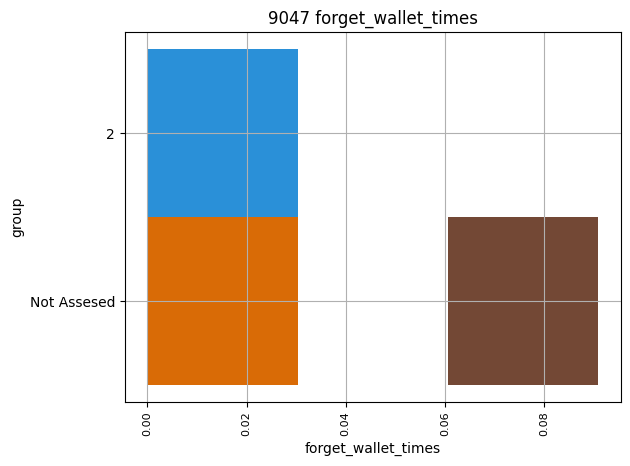

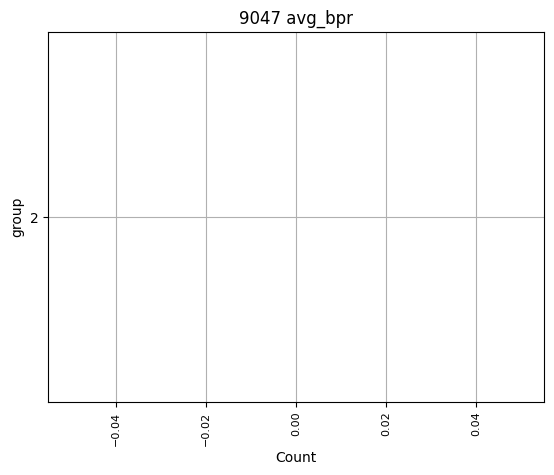

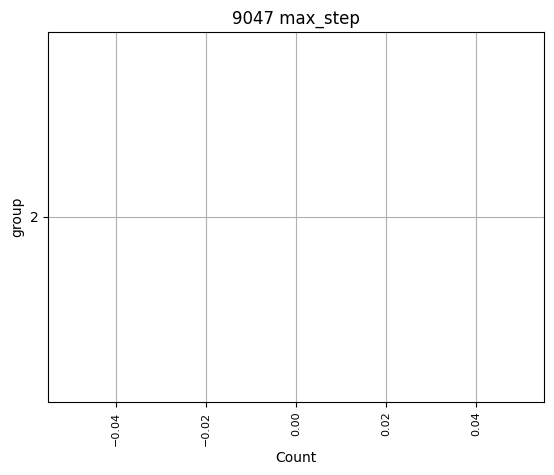

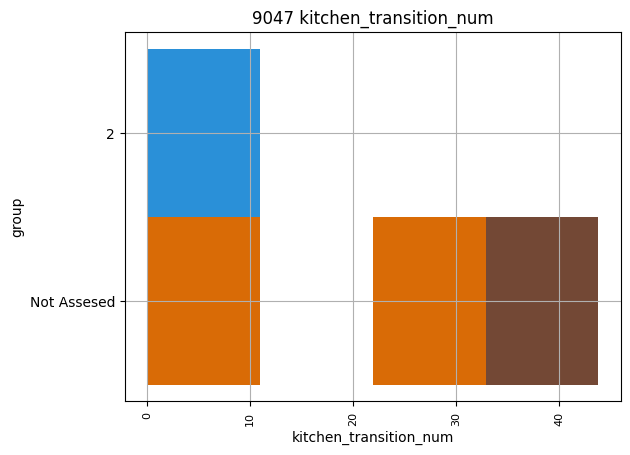

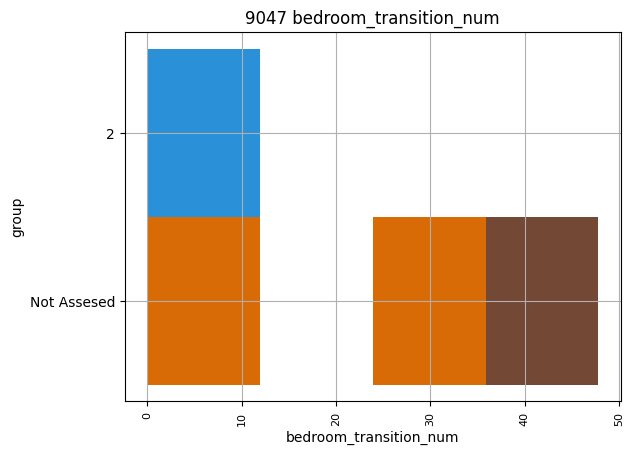

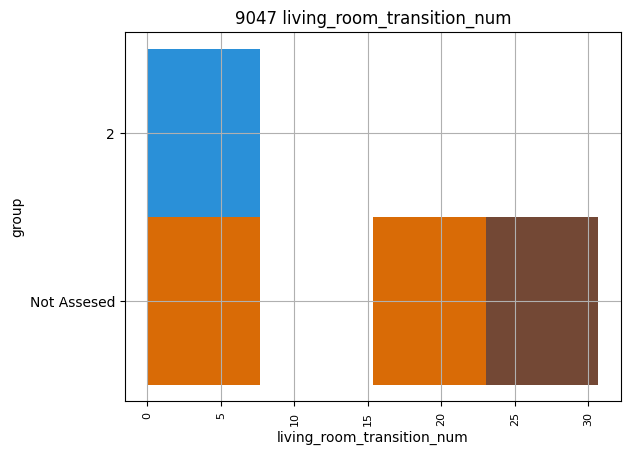

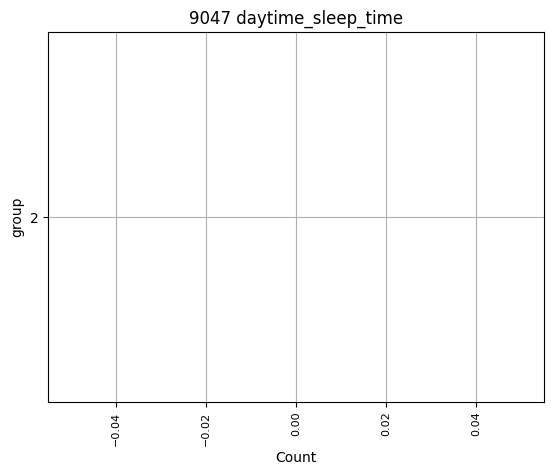

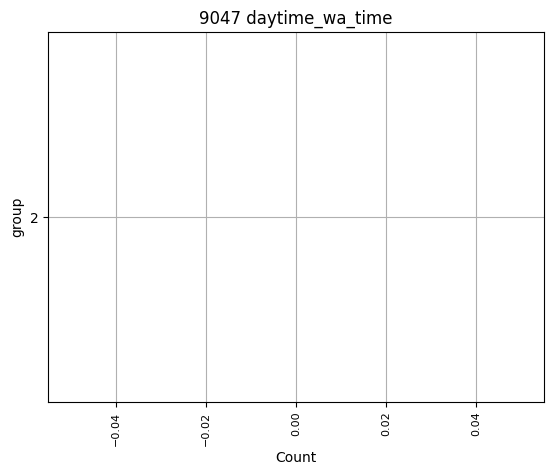

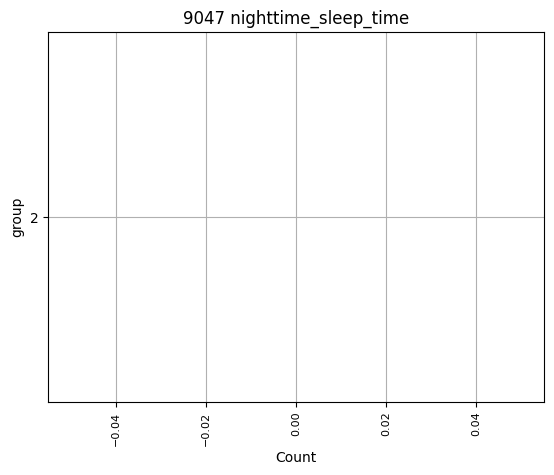

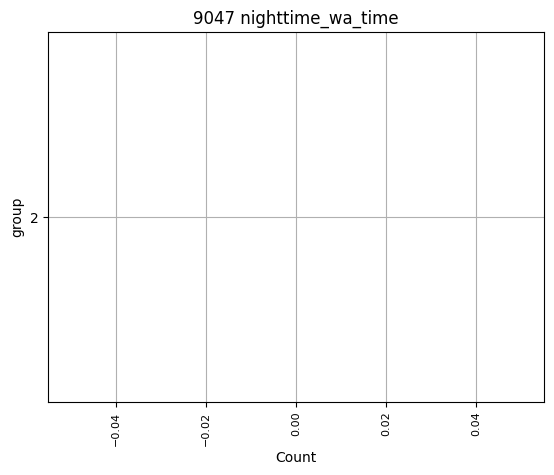

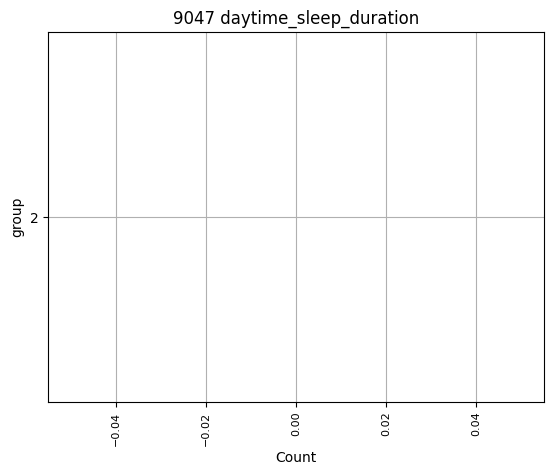

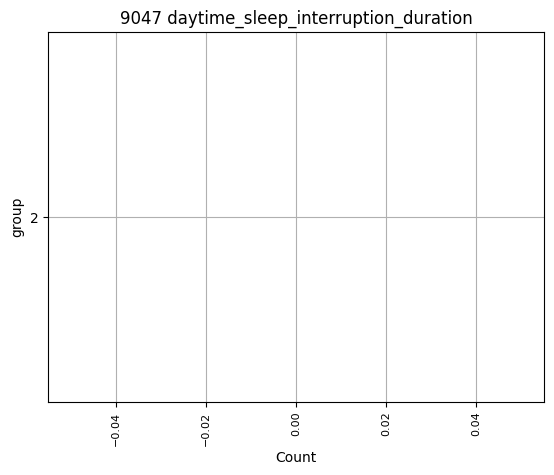

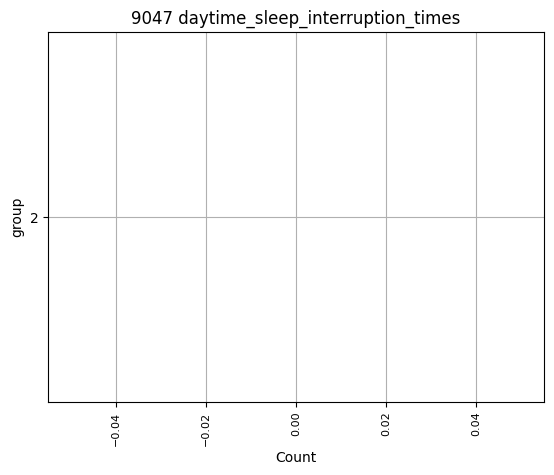

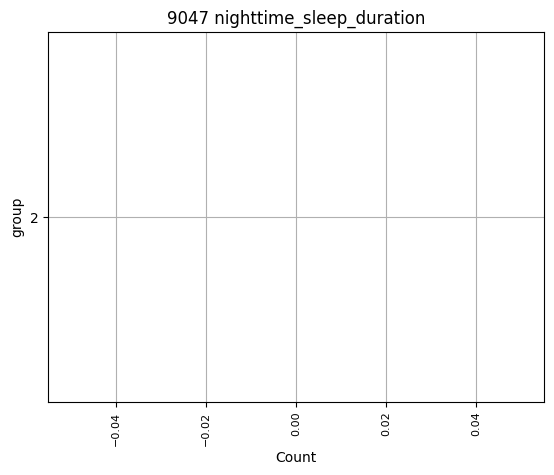

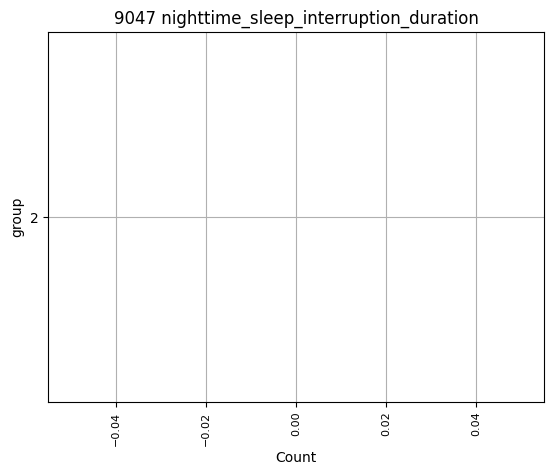

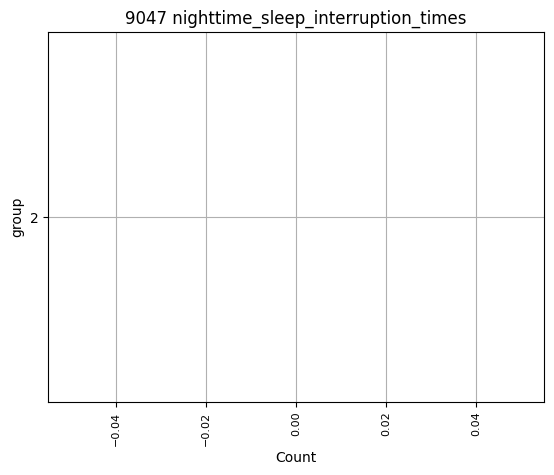

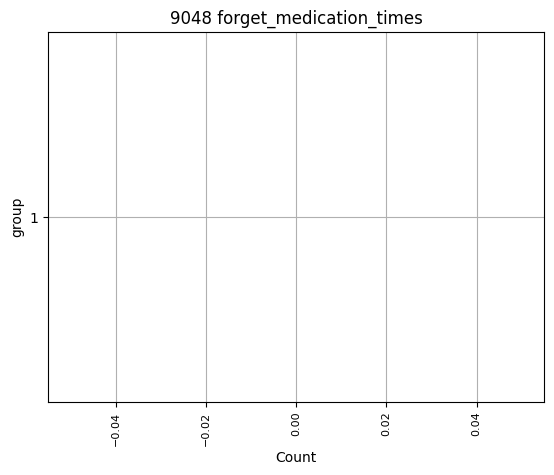

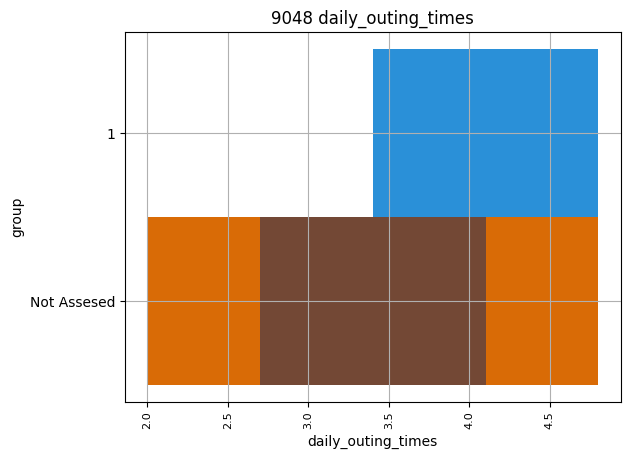

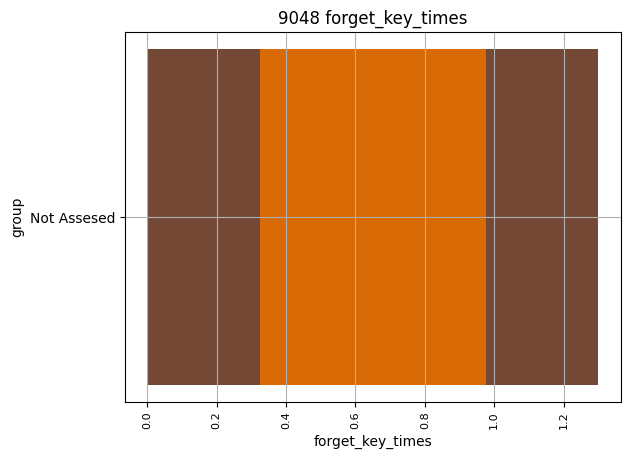

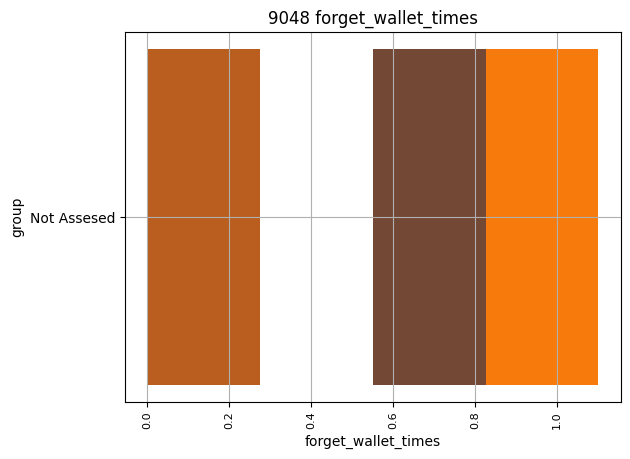

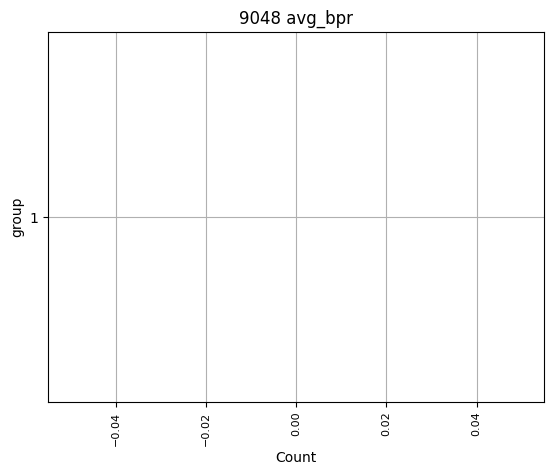

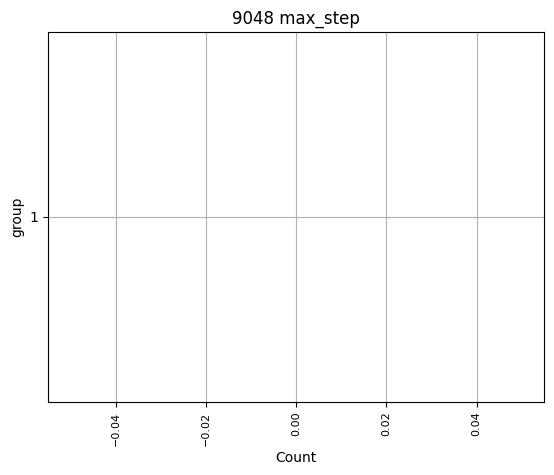

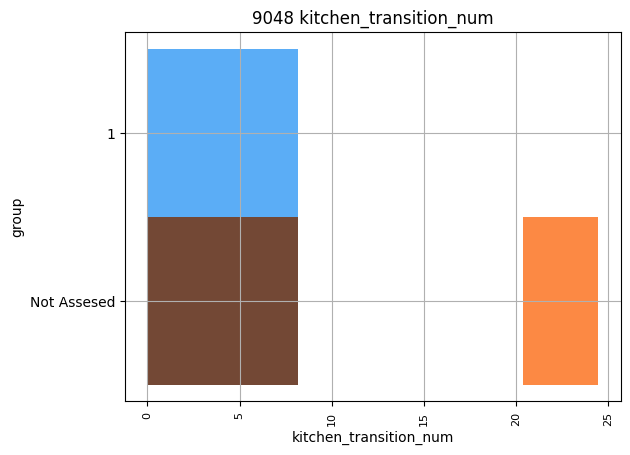

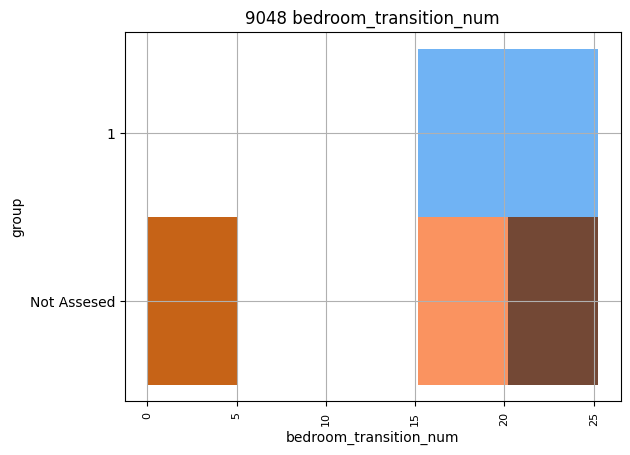

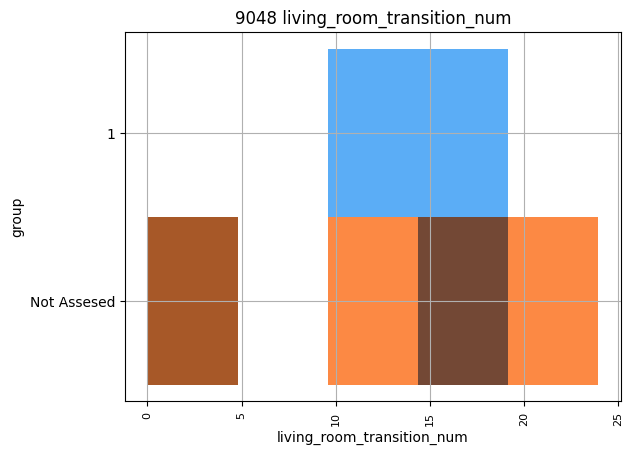

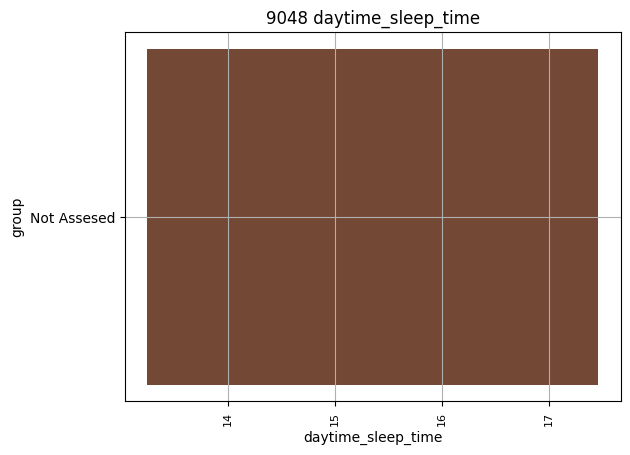

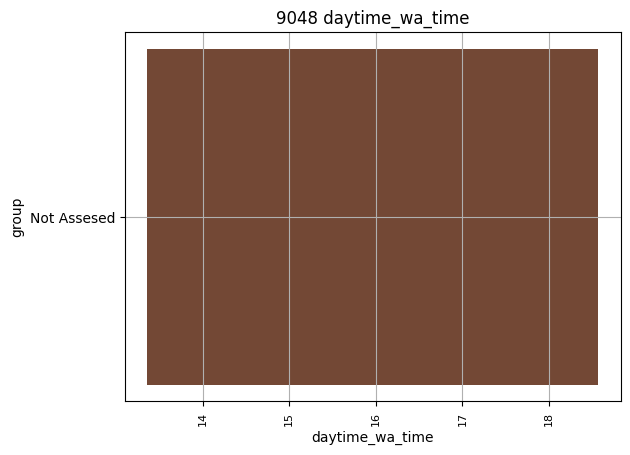

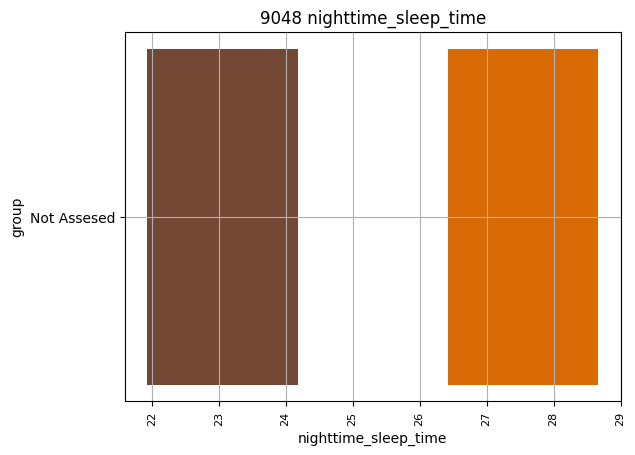

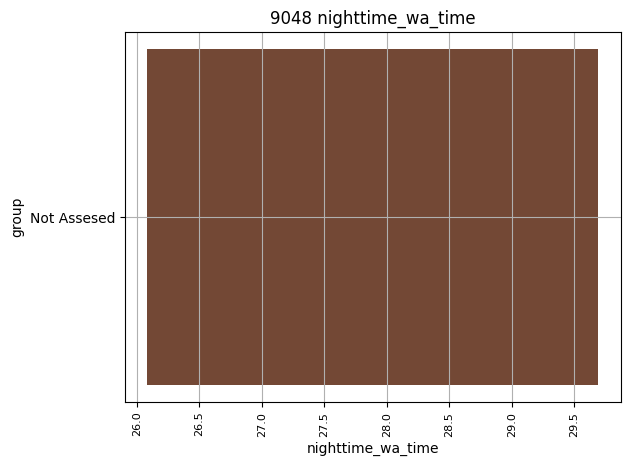

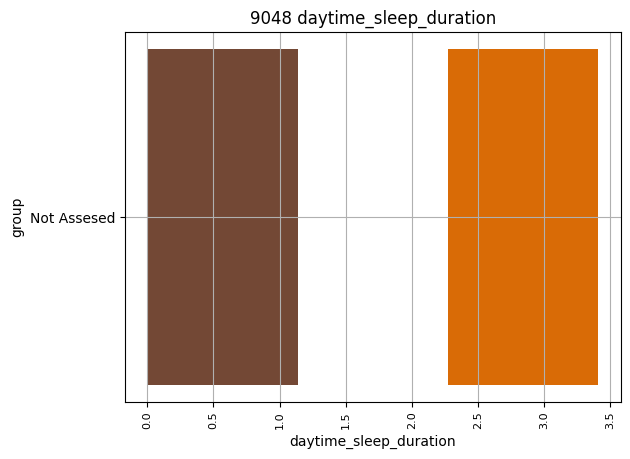

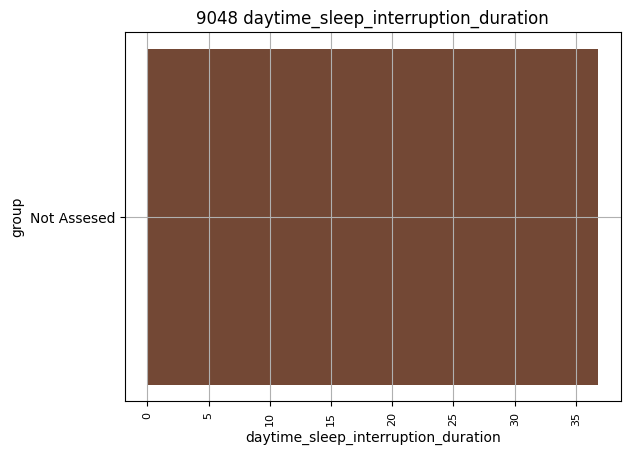

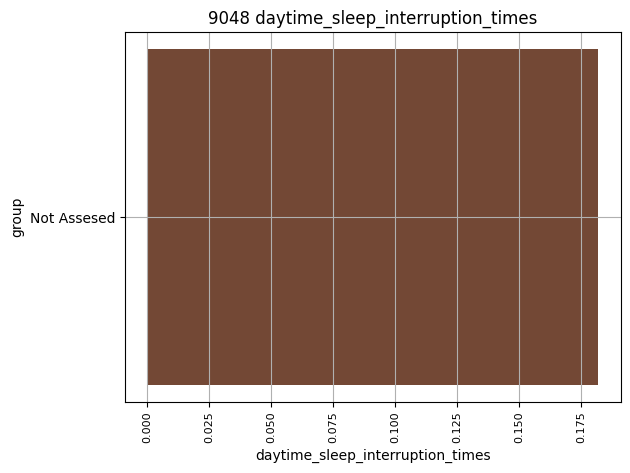

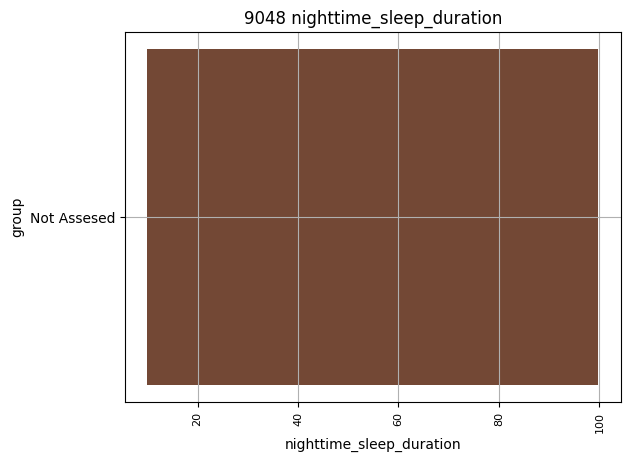

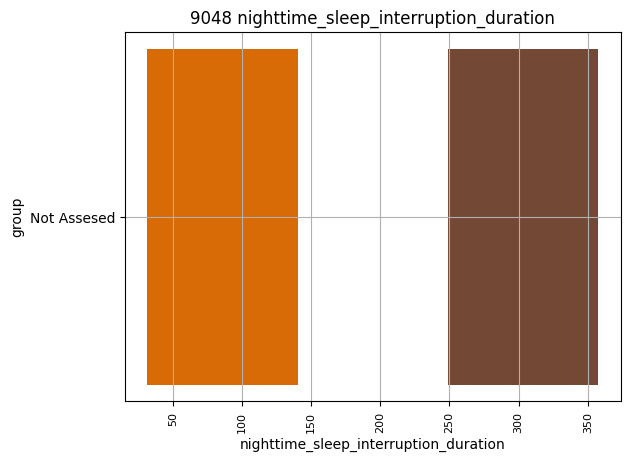

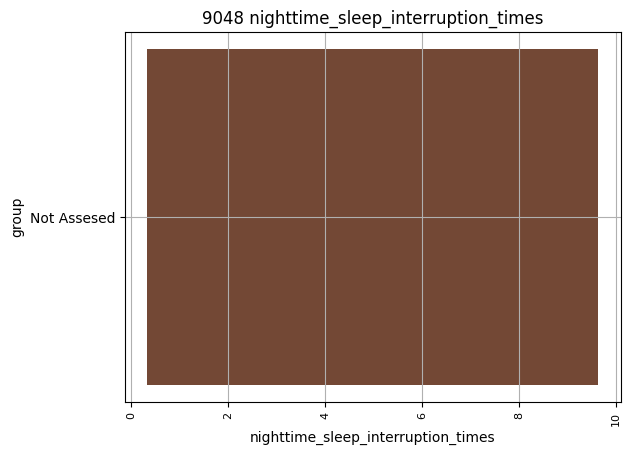

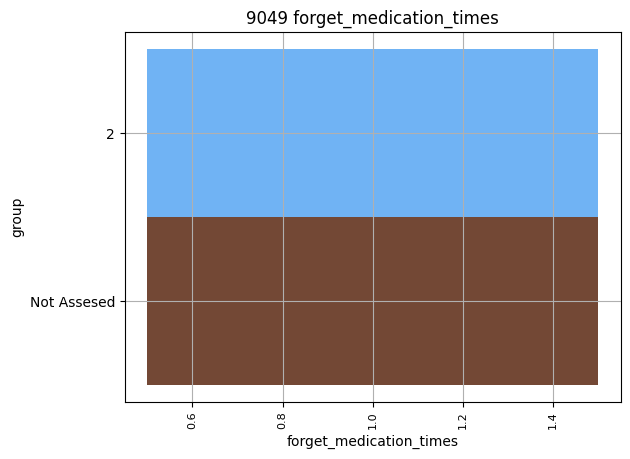

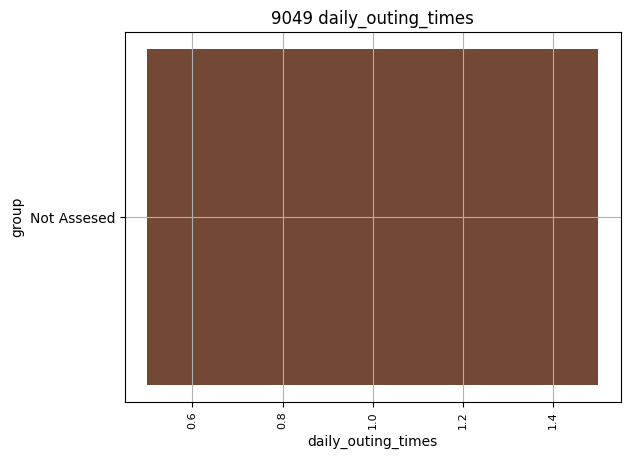

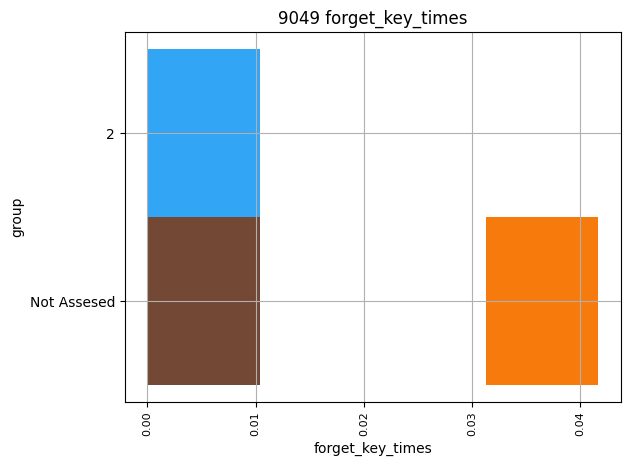

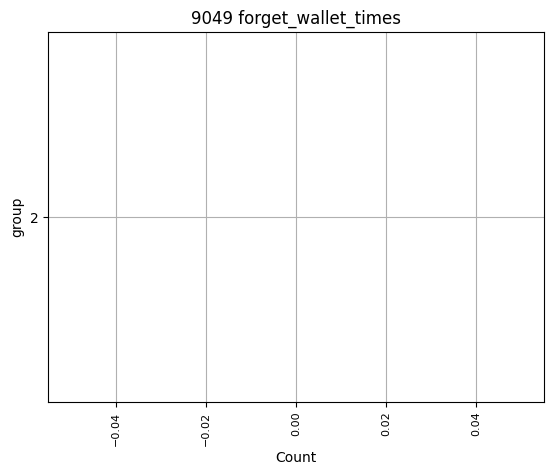

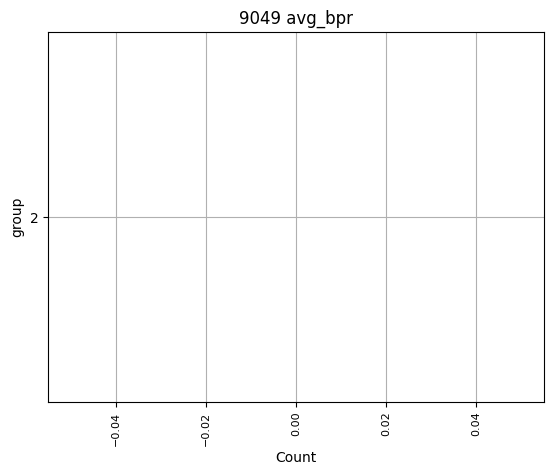

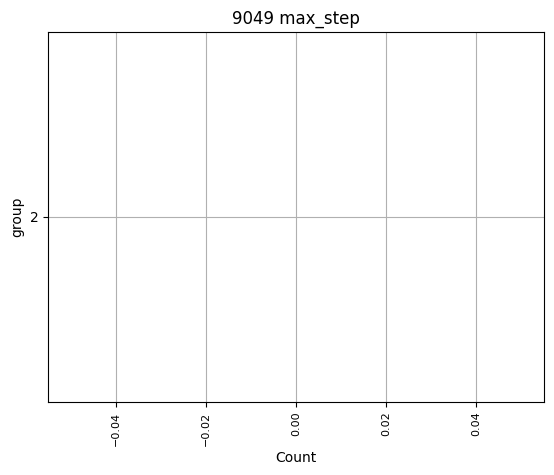

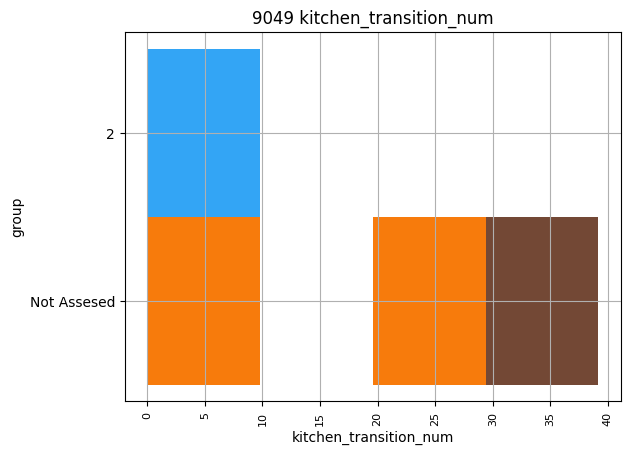

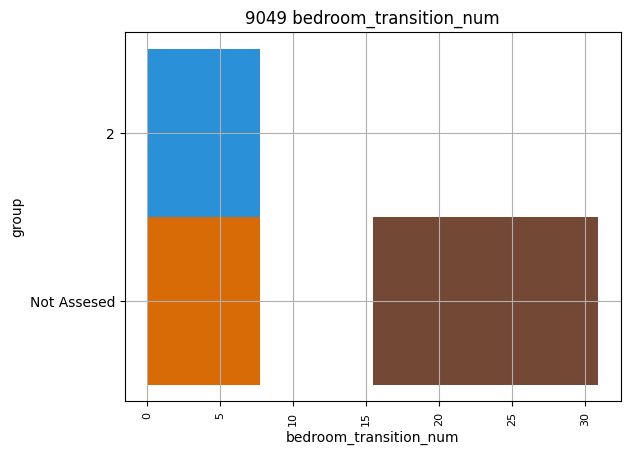

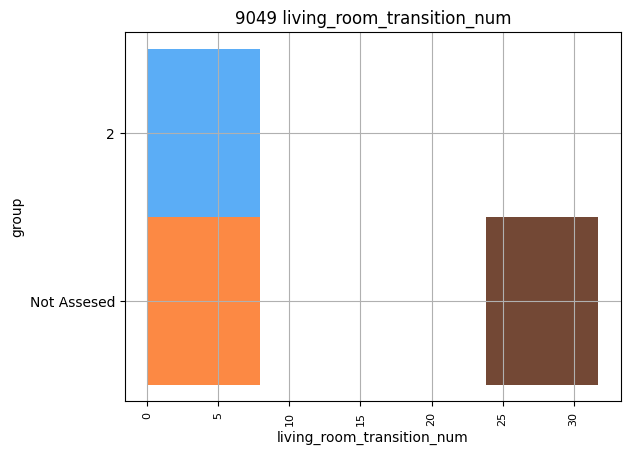

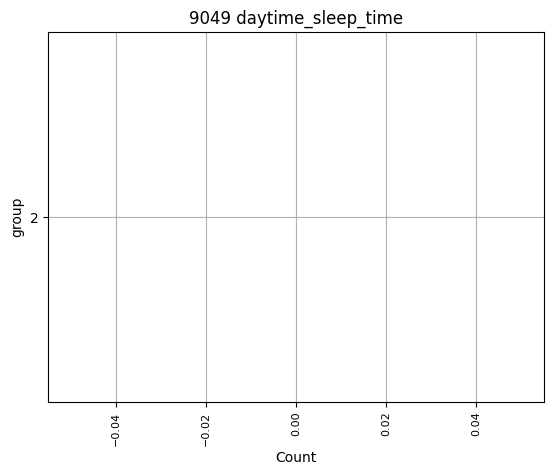

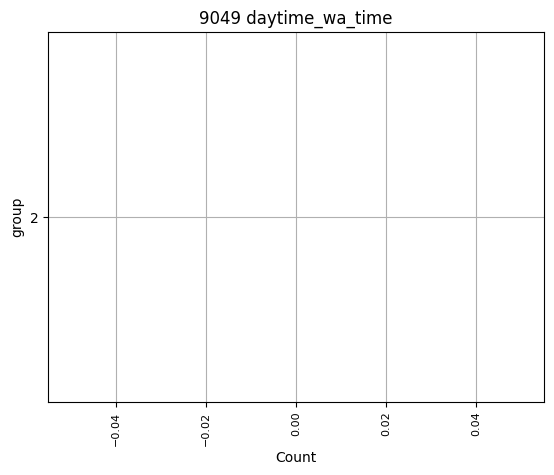

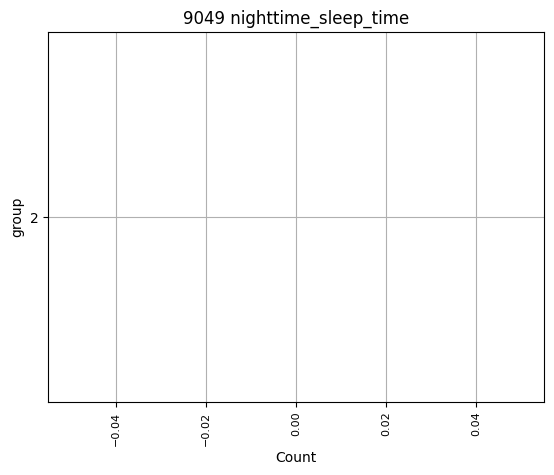

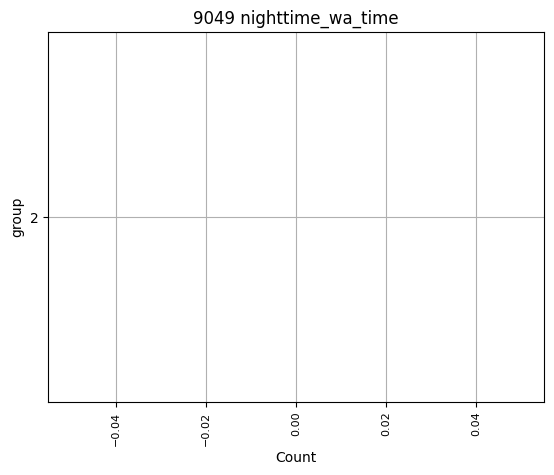

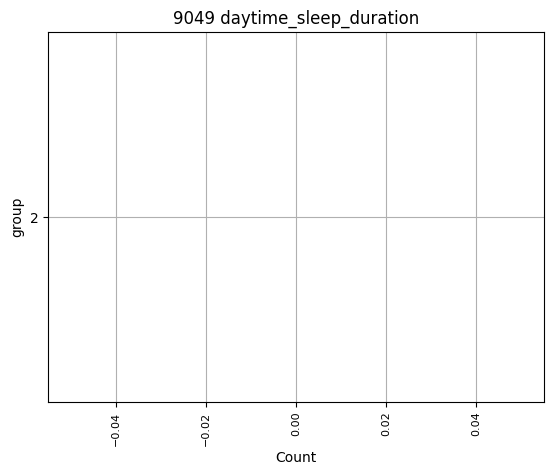

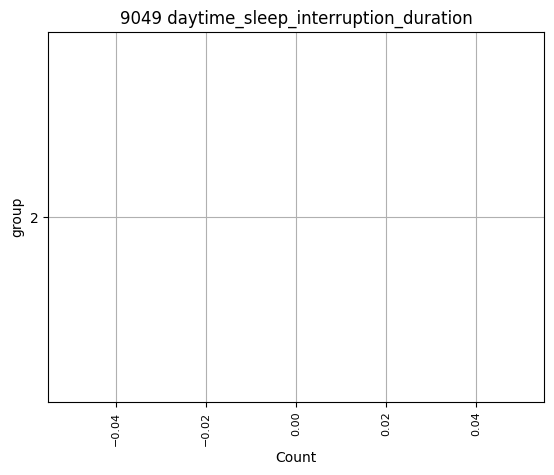

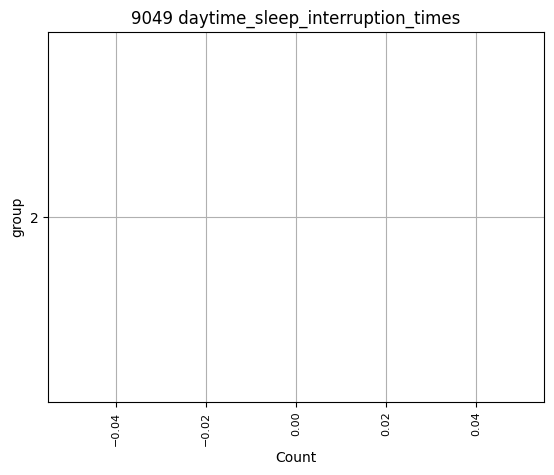

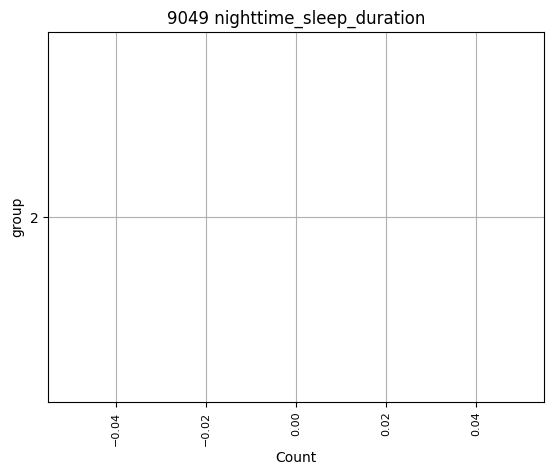

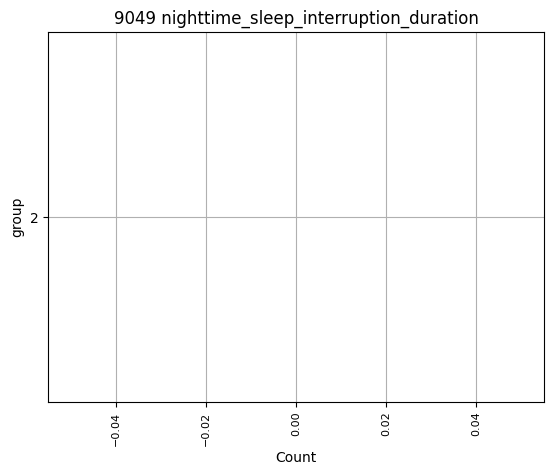

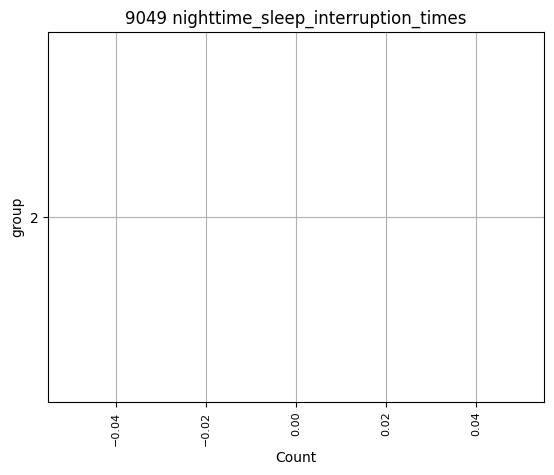

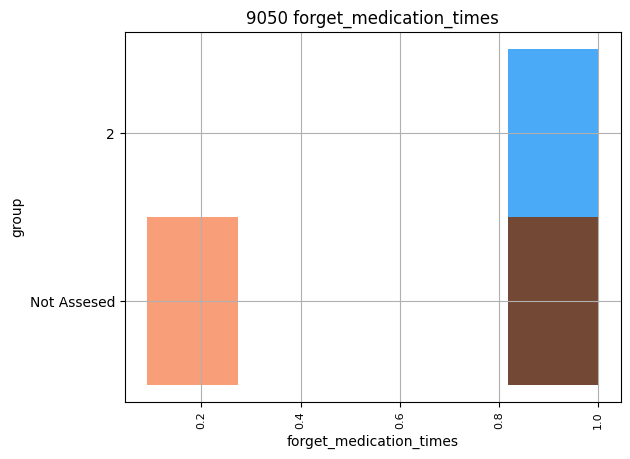

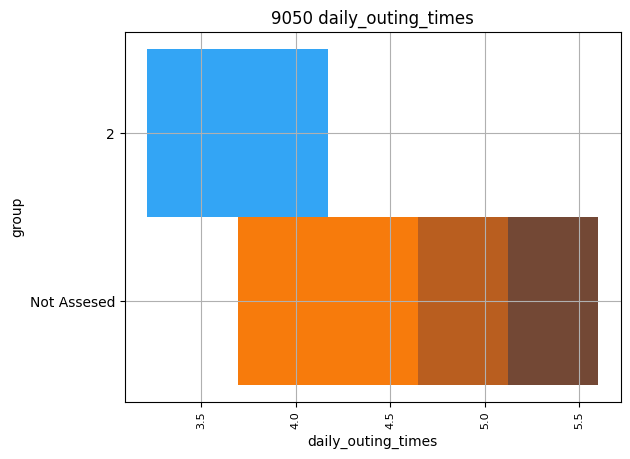

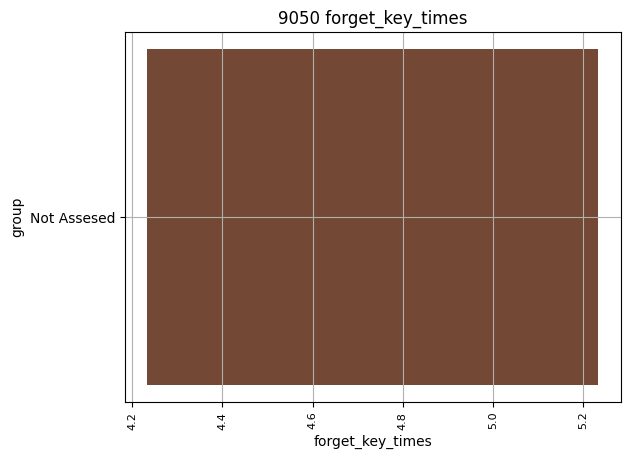

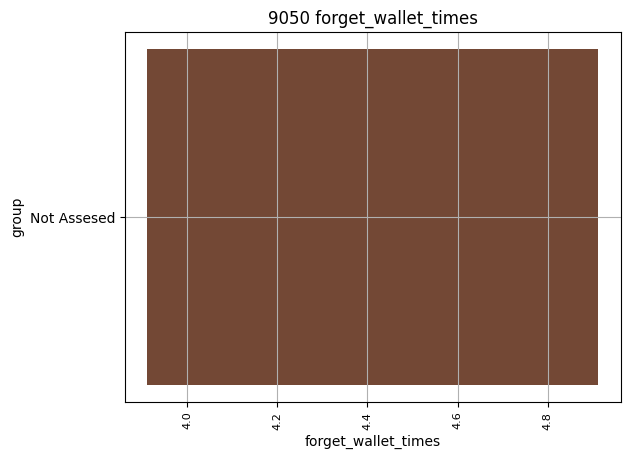

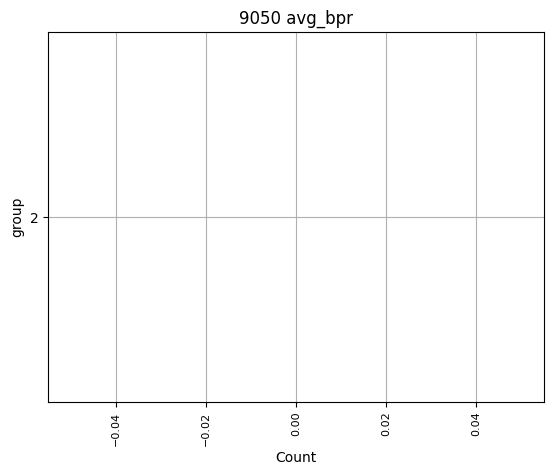

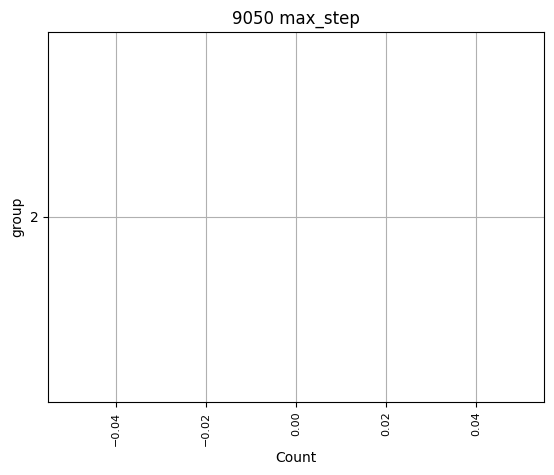

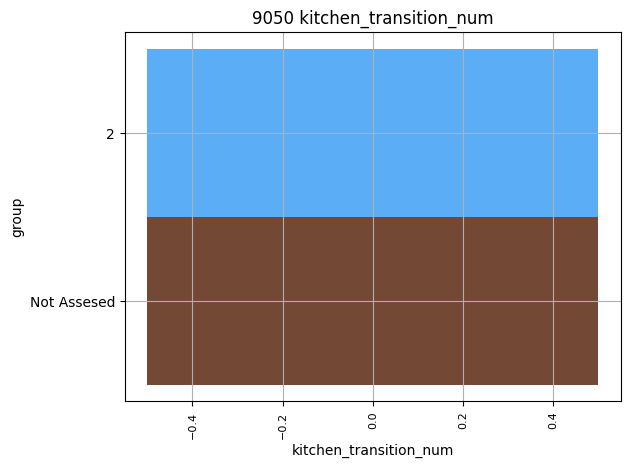

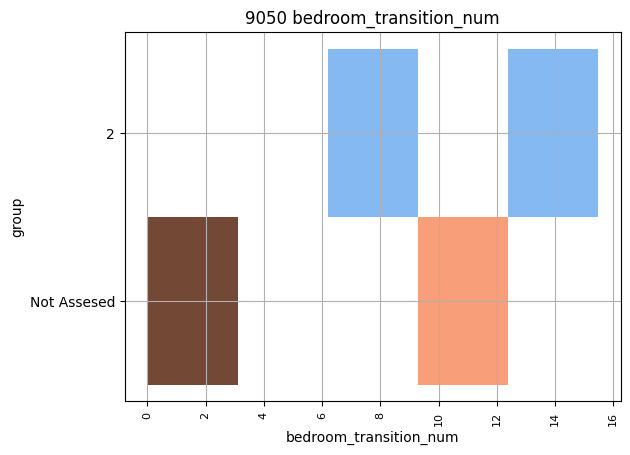

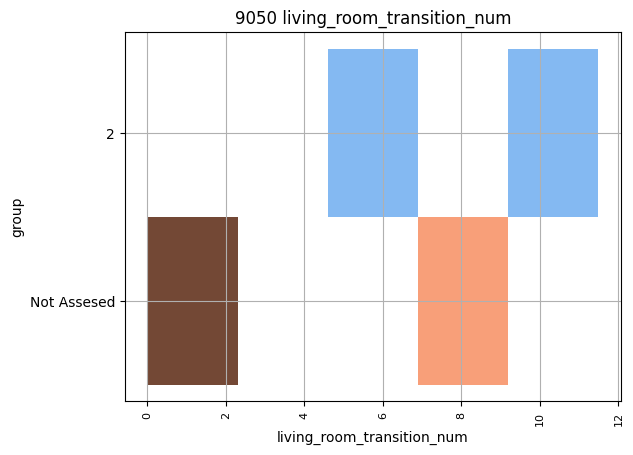

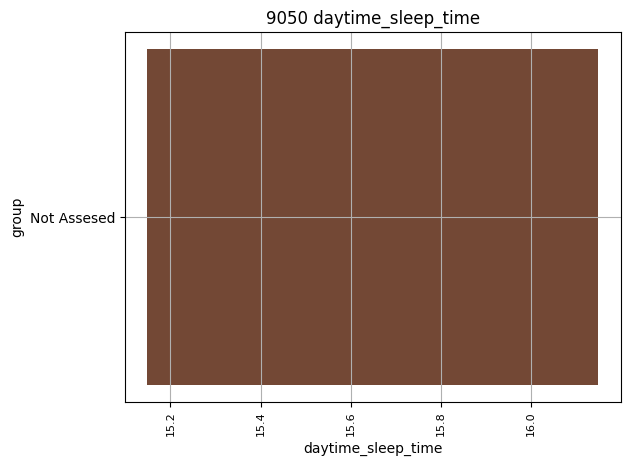

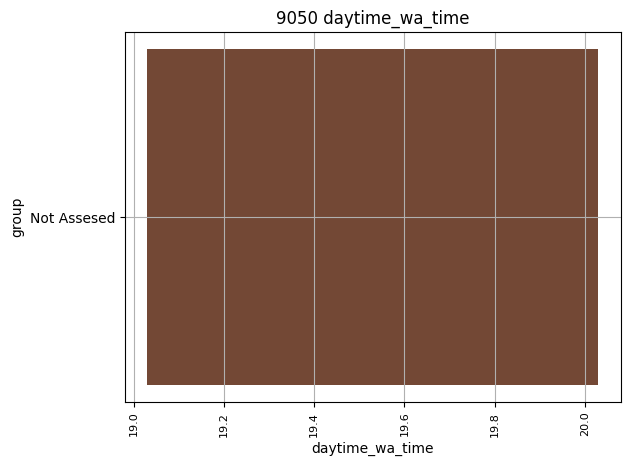

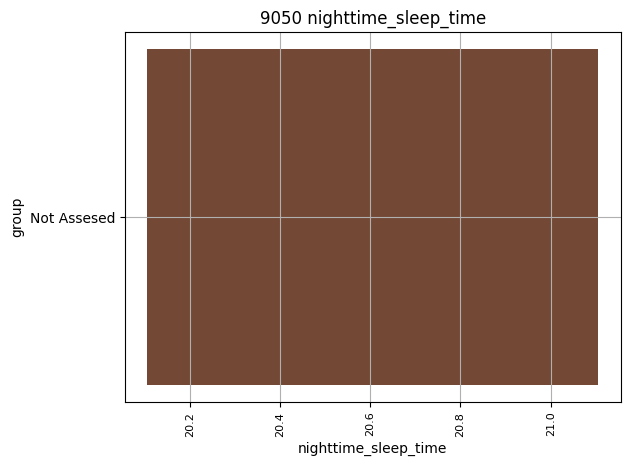

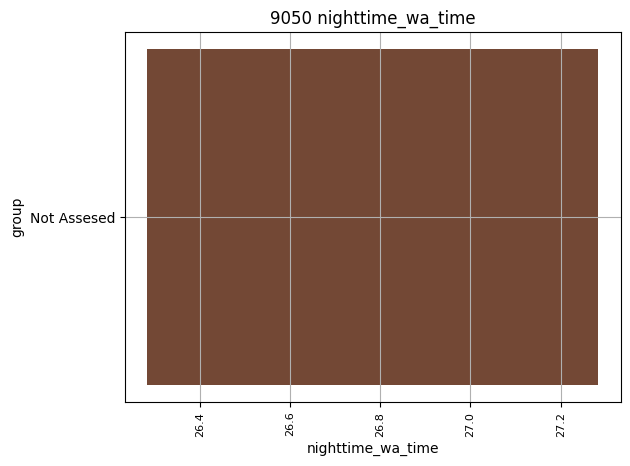

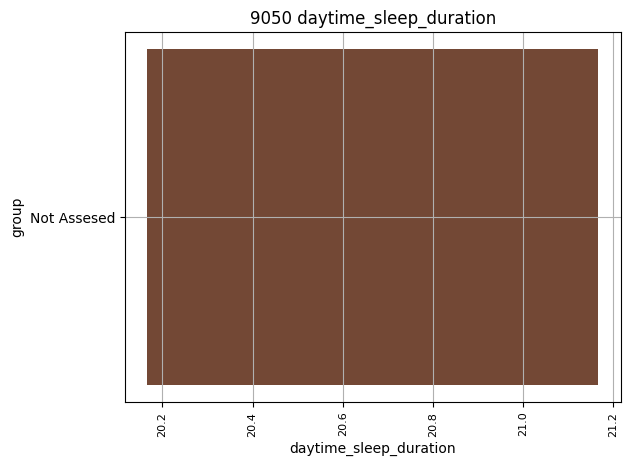

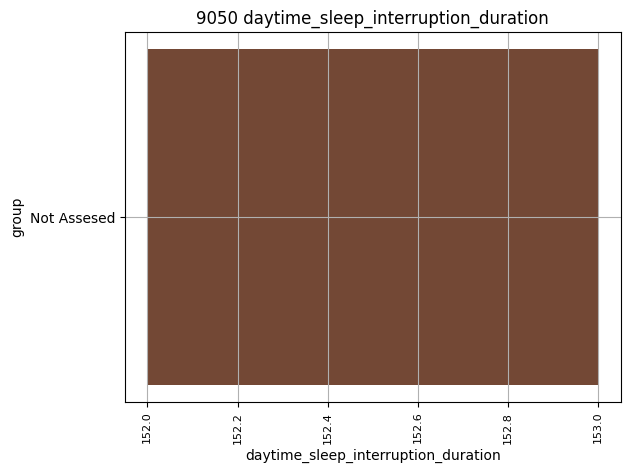

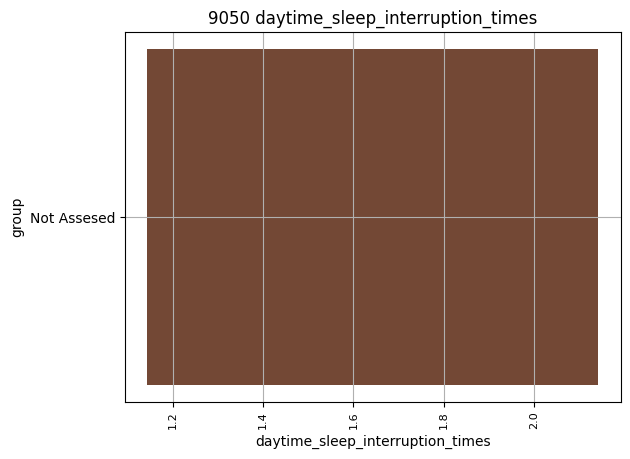

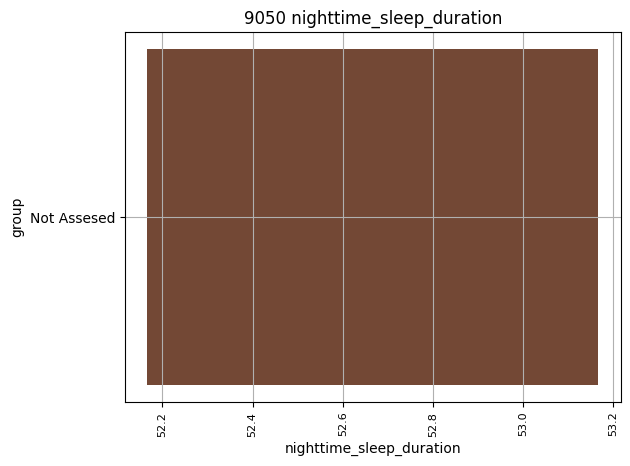

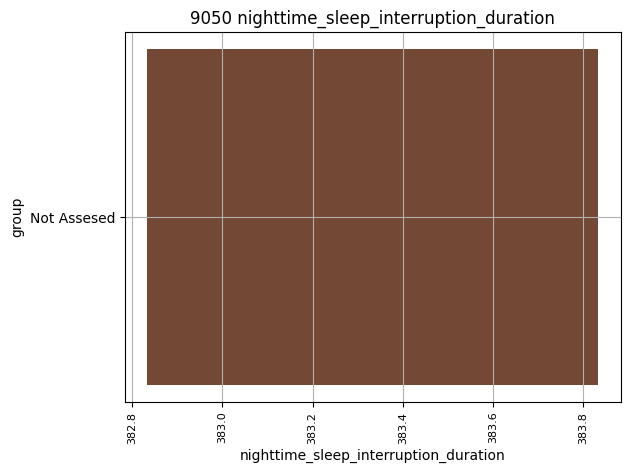

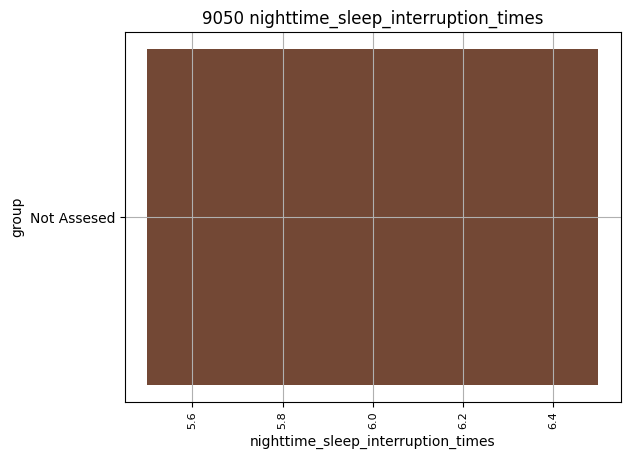

In [154]:
for each_par in participant_id_list:
    par_df = all_monthly_features_df.query("participant_id == @each_par").copy()
    group_numb = par_df.group.nunique()

    if group_numb>1:
        for each_feature in numeric_features:
            fig, ax = plt.subplots()
            g = sns.histplot(par_df,x=each_feature,y='group',hue='group',legend=False,ax=ax)
            g.tick_params(axis='x', rotation=90, labelsize=8)
            plt.title("{} {}".format(each_par,each_feature))
            plt.grid(True)
            plt.show()
    # print(unique_group_numb)

In [145]:
import pandas as pd
import researchpy as rp
import scipy.stats as stats
df = all_monthly_features_df.copy()
monthly_features =  ['forget_medication_times','daily_outing_times','forget_key_times',\
                        'forget_wallet_times','avg_bpr','max_step','kitchen_transition_num',\
                        'bedroom_transition_num','living_room_transition_num',\
                        'daytime_sleep_time','daytime_wa_time','nighttime_sleep_time','nighttime_wa_time',\
                        'daytime_sleep_duration','daytime_sleep_interruption_duration','daytime_sleep_interruption_times',\
                        'nighttime_sleep_duration','nighttime_sleep_interruption_duration','nighttime_sleep_interruption_times']
for each_feature in tqdm(monthly_features):
    print(each_feature)
    summary, results = rp.ttest(group1= df[each_feature][df['group'] == '1'], group1_name= "MCI",
                                group2= df[each_feature][df['group'] == '2'], group2_name= "Healthy",
                                equal_variances=False,
                                paired = False
                               )
    print(summary)
    print(results)

  0%|          | 0/19 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


forget_medication_times


  5%|▌         | 1/19 [00:00<00:03,  4.91it/s]/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
 11%|█         | 2/19 [00:00<00:03,  4.91it/s]

   Variable      N      Mean        SD        SE  95% Conf.  Interval
0       MCI  171.0  0.829770  0.317686  0.024294   0.781813  0.877727
1   Healthy  245.0  0.712663  0.378801  0.024201   0.664994  0.760332
2  combined  416.0  0.760801  0.359216  0.017612   0.726181  0.795421
            Satterthwaite t-test   results
0  Difference (MCI - Healthy) =     0.1171
1          Degrees of freedom =   400.2161
2                           t =     3.4151
3       Two side test p value =     0.0007
4      Difference < 0 p value =     0.9996
5      Difference > 0 p value =     0.0004
6                   Cohen's d =     0.3299
7                   Hedge's g =     0.3293
8              Glass's delta1 =     0.3686
9            Point-Biserial r =     0.1683
daily_outing_times
   Variable      N      Mean        SD        SE  95% Conf.  Interval
0       MCI  145.0  2.224269  1.039556  0.086330   2.053631  2.394908
1   Healthy  222.0  2.291790  1.458344  0.097878   2.098897  2.484683
2  combined  367.0

/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
 16%|█▌        | 3/19 [00:00<00:02,  5.80it/s]/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
 21%|██        | 4/19 [00:00<00:02,  6.05it/s]

   Variable      N      Mean        SD        SE  95% Conf.  Interval
0       MCI  111.0  0.530617  0.768258  0.072920   0.386107  0.675127
1   Healthy  117.0  0.673920  0.989019  0.091435   0.492822  0.855019
2  combined  228.0  0.604154  0.889390  0.058901   0.488091  0.720217
            Satterthwaite t-test   results
0  Difference (MCI - Healthy) =    -0.1433
1          Degrees of freedom =   217.6389
2                           t =    -1.2253
3       Two side test p value =     0.2218
4      Difference < 0 p value =     0.1109
5      Difference > 0 p value =     0.8891
6                   Cohen's d =    -0.1613
7                   Hedge's g =    -0.1608
8              Glass's delta1 =    -0.1865
9            Point-Biserial r =    -0.0828
forget_wallet_times
   Variable      N      Mean        SD        SE  95% Conf.  Interval
0       MCI  128.0  0.749444  0.765479  0.067659   0.615558  0.883330
1   Healthy  149.0  1.017599  0.958655  0.078536   0.862402  1.172796
2  combined  277.

/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
 26%|██▋       | 5/19 [00:00<00:02,  6.43it/s]/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


   Variable     N       Mean         SD        SE  95% Conf.   Interval
0       MCI  32.0  24.743418  26.426409  4.671573  15.215681  34.271154
1   Healthy  44.0  28.753671  25.445218  3.836011  21.017617  36.489724
2  combined  76.0  27.065143  25.765013  2.955450  21.177585  32.952701
            Satterthwaite t-test  results
0  Difference (MCI - Healthy) =   -4.0103
1          Degrees of freedom =   65.4473
2                           t =   -0.6634
3       Two side test p value =    0.5094
4      Difference < 0 p value =    0.2547
5      Difference > 0 p value =    0.7453
6                   Cohen's d =   -0.1551
7                   Hedge's g =   -0.1535
8              Glass's delta1 =   -0.1518
9            Point-Biserial r =   -0.0817
max_step
   Variable     N         Mean           SD          SE    95% Conf.  \
0       MCI  32.0  1120.464726   863.840765  152.706916   809.016918   
1   Healthy  44.0  3211.387673  2800.174260  422.142153  2360.056888   
2  combined  76.0  2330.9

 37%|███▋      | 7/19 [00:01<00:01,  7.93it/s]/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
 42%|████▏     | 8/19 [00:01<00:01,  8.20it/s]/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


bedroom_transition_num
   Variable      N       Mean         SD        SE  95% Conf.   Interval
0       MCI  215.0  14.295989  18.130418  1.236484  11.858741  16.733237
1   Healthy  282.0  18.923157  14.780504  0.880166  17.190601  20.655713
2  combined  497.0  16.921465  16.457698  0.738229  15.471024  18.371906
            Satterthwaite t-test   results
0  Difference (MCI - Healthy) =    -4.6272
1          Degrees of freedom =   406.3572
2                           t =    -3.0487
3       Two side test p value =     0.0024
4      Difference < 0 p value =     0.0012
5      Difference > 0 p value =     0.9988
6                   Cohen's d =    -0.2836
7                   Hedge's g =    -0.2832
8              Glass's delta1 =    -0.2552
9            Point-Biserial r =    -0.1495
living_room_transition_num
   Variable      N       Mean         SD        SE  95% Conf.   Interval
0       MCI  215.0  14.615051  13.147121  0.896626  12.847700  16.382401
1   Healthy  282.0  14.273673  13.52152

 47%|████▋     | 9/19 [00:01<00:01,  8.45it/s]/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


            Satterthwaite t-test   results
0  Difference (MCI - Healthy) =     0.3414
1          Degrees of freedom =   467.0245
2                           t =     0.2833
3       Two side test p value =     0.7771
4      Difference < 0 p value =     0.6115
5      Difference > 0 p value =     0.3885
6                   Cohen's d =     0.0256
7                   Hedge's g =     0.0255
8              Glass's delta1 =     0.0260
9            Point-Biserial r =     0.0131
daytime_sleep_time
   Variable     N       Mean        SD        SE  95% Conf.   Interval
0       MCI  47.0  13.386937  2.410569  0.351618  12.679167  14.094707
1   Healthy  51.0  10.806437  2.237454  0.313306  10.177143  11.435731
2  combined  98.0  12.044024  2.648637  0.267553  11.513005  12.575042
            Satterthwaite t-test  results
0  Difference (MCI - Healthy) =    2.5805
1          Degrees of freedom =   93.7005
2                           t =    5.4793
3       Two side test p value =    0.0000
4      Differe

 53%|█████▎    | 10/19 [00:01<00:01,  6.88it/s]


daytime_wa_time


/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
 58%|█████▊    | 11/19 [00:01<00:01,  5.30it/s]/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
 63%|██████▎   | 12/19 [00:01<00:01,  5.48it/s]

   Variable     N       Mean        SD        SE  95% Conf.   Interval
0       MCI  47.0  15.945326  2.323312  0.338890  15.263176  16.627476
1   Healthy  51.0  13.927210  3.290420  0.460751  13.001765  14.852656
2  combined  98.0  14.895082  3.027806  0.305855  14.288046  15.502119
            Satterthwaite t-test  results
0  Difference (MCI - Healthy) =    2.0181
1          Degrees of freedom =   90.0770
2                           t =    3.5284
3       Two side test p value =    0.0007
4      Difference < 0 p value =    0.9997
5      Difference > 0 p value =    0.0003
6                   Cohen's d =    0.7037
7                   Hedge's g =    0.6982
8              Glass's delta1 =    0.8686
9            Point-Biserial r =    0.3485
nighttime_sleep_time
   Variable     N       Mean        SD        SE  95% Conf.   Interval
0       MCI  46.0  22.619631  1.594879  0.235152  22.146010  23.093252
1   Healthy  48.0  22.948977  1.558757  0.224987  22.496361  23.401593
2  combined  94.0  2

/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
 68%|██████▊   | 13/19 [00:02<00:01,  5.35it/s]/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
 74%|███████▎  | 14/19 [00:02<00:00,  6.11it/s]

   Variable     N       Mean        SD        SE  95% Conf.   Interval
0       MCI  45.0  28.644336  2.185187  0.325748  27.987833  29.300839
1   Healthy  48.0  28.651286  1.852852  0.267436  28.113274  29.189298
2  combined  93.0  28.647923  2.009371  0.208362  28.234098  29.061748
            Satterthwaite t-test  results
0  Difference (MCI - Healthy) =   -0.0069
1          Degrees of freedom =   86.5101
2                           t =   -0.0165
3       Two side test p value =    0.9869
4      Difference < 0 p value =    0.4934
5      Difference > 0 p value =    0.5066
6                   Cohen's d =   -0.0034
7                   Hedge's g =   -0.0034
8              Glass's delta1 =   -0.0032
9            Point-Biserial r =   -0.0018
daytime_sleep_duration
   Variable      N       Mean         SD        SE  95% Conf.   Interval
0       MCI   51.0  17.813381  19.563570  2.739448  12.311038  23.315724
1   Healthy   53.0  27.262256  31.313087  4.301183  18.631300  35.893211
2  combined 

/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
 84%|████████▍ | 16/19 [00:02<00:00,  7.92it/s]/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)



daytime_sleep_interruption_times
   Variable     N      Mean        SD        SE  95% Conf.  Interval
0       MCI  47.0  1.796120  1.695231  0.247275   1.298382  2.293859
1   Healthy  51.0  2.241141  2.225054  0.311570   1.615334  2.866947
2  combined  98.0  2.027713  1.991172  0.201139   1.628508  2.426917
            Satterthwaite t-test  results
0  Difference (MCI - Healthy) =   -0.4450
1          Degrees of freedom =   92.8036
2                           t =   -1.1188
3       Two side test p value =    0.2661
4      Difference < 0 p value =    0.1331
5      Difference > 0 p value =    0.8669
6                   Cohen's d =   -0.2238
7                   Hedge's g =   -0.2220
8              Glass's delta1 =   -0.2625
9            Point-Biserial r =   -0.1154
nighttime_sleep_duration
   Variable      N       Mean         SD         SE  95% Conf.    Interval
0       MCI   51.0  88.520611  82.022767  11.485485  65.451336  111.589886
1   Healthy   53.0  89.040633  95.074047  13.059425  

/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
 95%|█████████▍| 18/19 [00:02<00:00,  9.17it/s]/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
100%|██████████| 19/19 [00:02<00:00,  7.19it/s]

   Variable     N        Mean          SD         SE   95% Conf.    Interval
0       MCI  46.0  230.031900  112.385056  16.570273  196.657658  263.406142
1   Healthy  48.0  251.841549  114.755269  16.563496  218.520092  285.163005
2  combined  94.0  241.168742  113.520084  11.708703  217.917579  264.419905
            Satterthwaite t-test  results
0  Difference (MCI - Healthy) =  -21.8096
1          Degrees of freedom =   91.9549
2                           t =   -0.9309
3       Two side test p value =    0.3544
4      Difference < 0 p value =    0.1772
5      Difference > 0 p value =    0.8228
6                   Cohen's d =   -0.1920
7                   Hedge's g =   -0.1904
8              Glass's delta1 =   -0.1941
9            Point-Biserial r =   -0.0966
nighttime_sleep_interruption_times
   Variable     N      Mean        SD        SE  95% Conf.  Interval
0       MCI  46.0  7.440544  4.805709  0.708563   6.013424  8.867664
1   Healthy  48.0  8.043191  5.737440  0.828128   6.37721

In [56]:
budhi_data = pd.DataFrame(all_monthly_features)
budhi_data

forget_medication_times  daily_outing_times  forget_key_times  \
0                   0.748787            2.625387          0.637815   
1                   0.748787            2.625387          0.637815   
2                   0.748787            2.625387          0.637815   
3                   0.748787            2.625387          0.637815   
4                   0.748787            2.625387          0.637815   
..                       ...                 ...               ...   
567                 0.748787            2.625387          0.637815   
568                 0.748787            2.625387          0.637815   
569                 0.748787            2.625387          0.637815   
570                 0.748787            2.625387          0.637815   
571                 0.748787            2.625387          0.637815   

     forget_wallet_times    avg_bpr     max_step  kitchen_transition_num  \
0               0.988248  24.099883  2336.412559               18.058009   
1               0.988248  24.099883  2336.412559               18.058009   
2               0.988248  24.099883  2336.412559               18.058009   
3               0.988248  24.099883  2336.412559               18.058009   
4               0.988248  24.099883  2336.412559               18.058009   
..                   ...        ...          ...                     ...   
567             0.988248  24.099883  2336.412559               18.058009   
568             0.988248  24.099883  2336.412559               18.058009   
569             0.988248  24.099883  2336.412559               18.058009   
570             0.988248  24.099883  2336.412559               18.058009   
571             0.988248  24.099883  2336.412559               18.058009   

     bedroom_transition_num  living_room_transition_num  daytime_sleep_time  \
0                 17.475898                   15.053743           11.915312   
1                 17.475898                   15.053743           11.915312   
2                 17.475898                   15.053743           11.915312   
3                 17.475898                   15.053743           11.915312   
4                 17.475898                   15.053743           11.915312   
..                      ...                         ...                 ...   
567               17.475898                   15.053743           11.915312   
568               17.475898                   15.053743           11.915312   
569               17.475898                   15.053743           11.915312   
570               17.475898                   15.053743           11.915312   
571               17.475898                   15.053743           11.915312   

     ...                                     participant_id  \
0    ...  0    9001
0    9003
0    9005
0    9006
0    9...   
1    ...  0    9001
0    9003
0    9005
0    9006
0    9...   
2    ...  0    9001
0    9003
0    9005
0    9006
0    9...   
3    ...  0    9001
0    9003
0    9005
0    9006
0    9...   
4    ...  0    9001
0    9003
0    9005
0    9006
0    9...   
..   ...                                                ...   
567  ...  0    9001
0    9003
0    9005
0    9006
0    9...   
568  ...  0    9001
0    9003
0    9005
0    9006
0    9...   
569  ...  0    9001
0    9003
0    9005
0    9006
0    9...   
570  ...  0    9001
0    9003
0    9005
0    9006
0    9...   
571  ...  0    9001
0    9003
0    9005
0    9006
0    9...   

                                                 group  \
0    0    2
0    2
0    1
0    2
0    1
    ..
0   ...   
1    0    2
0    2
0    1
0    2
0    1
    ..
0   ...   
2    0    2
0    2
0    1
0    2
0    1
    ..
0   ...   
3    0    2
0    2
0    1
0    2
0    1
    ..
0   ...   
4    0    2
0    2
0    1
0    2
0    1
    ..
0   ...   
..                                                 ...   
567  0    2
0    2
0    1
0    2
0    1
    ..
0   ...   
568  0    2
0    2
0    1
0    2
0    1
    ..
0   ...   
569  0    2
0    2
0   

In [59]:
budhi_data.query("group == '1'")

Empty DataFrame
Columns: [forget_medication_times, daily_outing_times, forget_key_times, forget_wallet_times, avg_bpr, max_step, kitchen_transition_num, bedroom_transition_num, living_room_transition_num, daytime_sleep_time, daytime_wa_time, nighttime_sleep_time, nighttime_wa_time, daytime_sleep_duration, daytime_sleep_interruption_duration, daytime_sleep_interruption_times, nighttime_sleep_duration, nighttime_sleep_interruption_duration, nighttime_sleep_interruption_times, participant_id, group, year, month, closest_assessment_date, closest_assessment_period, daytime_sleep_time_str, daytime_wa_time_str, nighttime_sleep_time_str, nighttime_wa_time_str]
Index: []

[0 rows x 29 columns]

In [ ]:
import yfinance as yf

from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import *

data = pd.read_csv()